In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth

import timeit
import ODE_utils as odeu
from scipy import optimize
import tables
#from mpmath import *
#!jt -t -cellw 100%

In [2]:
###Initial Values###

M0=1.0
Q=0.95
Lambda=0.1#0.1#0.14#0.1#0.1
scalarfield=False
A=.05#.115
vscalarfield=False


In [3]:
Tol=.5
N=100
Nul=N
Nup=10**(60)
scal=10
umax=100
vmax=200
rcosmtol=.0000000000000001

datatype=np.float64


#ru0=5.0
#dr0v=.4
ru0=2.0
#dr0v=0.045
dr0v=0.01#-1/(4*-.375)*(1-2*M0/ru0+Q**2/ru0**2-Lambda*ru0**2/3)
#dr0v=.075

bdytype="edd"
scaltostan=False
solveaffine=False

Elist=[1]
#Elist=[1,2,4,8,16]

#uloc=[1/8,1/4,3/8,1/2,5/8]
#uloc=[1/5,2/5,3/5,4/5,9/10]
uloc=[8.2/10]
print(dr0v)

0.01


In [4]:
###Defining Needed Constants###

scalf=float(scal)
u0=0.0
v0=0.0
rv0=ru0
phiu0=0.0
phiv0=0.0

if M0==0.0:
    dv0=1/N    
else:
    dv0=M0/N
    


def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

if Lambda>0 or Lambda<0:
    sol = optimize.root(fr,[0.687,1.3,500.0],args=(M0,Q,Lambda), method='hybr')
    rminus=sol.x[0]
    rplus=sol.x[1]
    rcosm=sol.x[2]
else:
    rplus=M0+(M0**2-Q**2)**(.5)
    rminus=M0-(M0**2-Q**2)**(.5)
    rcosm=0.0
    

wHD=True 

print("r+: "+str(rplus))
print("r-: "+str(rminus))
print("rc: "+str(rcosm))

print("Max r along u=0: "+str(ru0+vmax*dr0v))
###Predicting Run time###

###timer
start = timeit.default_timer()

Nu=Nul*umax#int(umax/du0)
Nv=int(vmax/dv0)
#print("Number of points for lowest iteration is "+str(Nu*Nv)+","+str(Nu)+"X"+str(Nv))
print("Number of points for highest iteration is "+str(Nu*Nv*max(Elist)**2)+","+str(Nu*max(Elist))+"X"+str(Nv*max(Elist)))

numpoints=Nu*Nv

print("Total number of points is "+str(int(numpoints)))

predtime=numpoints/(1700000)

print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")


r+: 1.528728775499171
r-: 0.6767481351754444
rc: 4.130469742830307
Max r along u=0: 4.0
Number of points for highest iteration is 200000000,10000X20000
Total number of points is 200000000
Runtime: about 1.96 minutes


In [5]:
print((rplus-rminus)/(2*rminus)*rcosm/rminus)

3.8418910111068874


In [6]:
##################################
###Applying Boundary Conditions###

Emax=max([Elist])


rnpf=np.zeros((2,Nv),dtype=datatype)
signpf=np.zeros((2,Nv),dtype=datatype)
phinpf=np.zeros((2,Nv),dtype=datatype)
drnpvf=np.zeros((2,Nv),dtype=datatype)
dsignpvf=np.zeros((2,Nv),dtype=datatype)
dphinpvf=np.zeros((2,Nv),dtype=datatype)
drnpuf=np.zeros((2,Nv),dtype=datatype)
dsignpuf=np.zeros((2,Nv),dtype=datatype)
dphinpuf=np.zeros((2,Nv),dtype=datatype)
massnpf=np.full((2,Nv),M0)#np.zeros((2,Nv))
#drunpv=np.full((1,Nv-1),-1/(4*dr0v)*(1-2*M0/ru0+Q**2/ru0**2))
 


rnpf[0], signpf[0], phinpf[0] , drnpvf[0], dsignpvf[0], dphinpvf[0], drnpuf[0], dsignpuf[0], dphinpuf[0] , massnpf[0]= odeu.boundaryv(scal,bdytype,Nv,ru0,dr0v,dv0,vmax,M0,Q,Lambda,scalarfield,A,rcosmtol,datatype)


mask=~np.isnan(rnpf[0])
#print(mask)
rnpf=rnpf[:,mask]
#print(rnpf)
Nv=int(len(rnpf[0]))
rnpf=rnpf.reshape(2,Nv)
signpf=signpf[:,mask]#.reshape(2,Nv)
phinpf=phinpf[:,mask]#.reshape(2,Nv)
dphinpuf=dphinpuf[:,mask]#.reshape(2,Nv)  
dphinpvf=dphinpvf[:,mask]#.reshape(2,Nv)
dsignpuf=dsignpuf[:,mask]#.reshape(2,Nv)
dsignpvf=dsignpvf[:,mask]#.reshape(2,Nv)
drnpuf=drnpuf[:,mask]#.reshape(2,Nv)
drnpvf=drnpvf[:,mask]#.reshape(2,Nv)
massnpf=massnpf[:,mask]#.reshape(2,Nv)

#print(massnpf)

[2.         2.00010001 2.00020003 ... 3.99925549 3.99928062 3.99930575] 20000


In [7]:
print(rnpf)
print(Nv)
print(signpf)

[[2.         2.00010001 2.00020003 ... 3.99925549 3.99928062 3.99930575]
 [0.         0.         0.         ... 0.         0.         0.        ]]
20000
[[-2.38280143 -2.38264862 -2.38249583 ... -3.76363071 -3.76381468
  -3.76399866]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


20000 20000 200.0
20000
[0.0000e+00 1.0000e-02 2.0000e-02 ... 1.9997e+02 1.9998e+02 1.9999e+02]


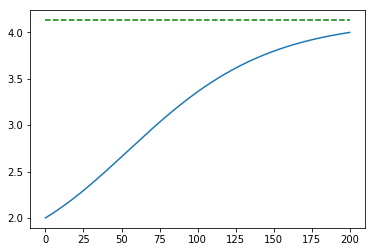

1.0000000000015796 4.130469742826144


In [8]:
vmax=(Nv)*dv0

print(Nv,len(rnpf[0]),vmax)

vrange=np.arange(0,vmax-.00000001*vmax,dv0)#*rnpf[0])/rnpf[0]
print(len(vrange))
print(vrange)
        
plt.plot(vrange,rnpf[0])
#plt.plot(dphinpvf[0])
#plt.plot(dphinpuf[0])
Mc=np.nanmax(massnpf[0])
rcosm=odeu.rc(Mc,Q,Lambda)
plt.plot([0,vmax],[rcosm,rcosm],linestyle='--',color='green')
plt.show()



#print(vrange)
print(Mc,rcosm)


In [9]:
drunptemp=np.empty((Nv))*np.nan
#dsigunp=np.empty((Nu))*np.nan


A=.115
u1=9.5
u2=10

###Applying Propagation Algorithm###

urange=np.array([0.0],dtype=datatype)

massnpf[0][0]=1.0

#drunp[0]=-mth.exp(signpf[0][0])/(4.0*dr0v)*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda*ru0**2/3)
#dsigunpvalue=100*np.exp(np.nanmax(signpf))
#drunptemp=drunp[0]
    

i=0
dv=dv0
if M0>0:
    du0=M0/Nul
elif M0==0:
    du0=1/Nul

du=du0

###fix this part (put in front of boundary conditions so it is an initial condition)
#if bdytype=="edd" or bdytype=="fulledd":
    #bdyvalue=1.0
    #dsignpuf[0]=2*(3*Q**2-3*M0*ru0+ru0**4*Lambda)/(ru0*(-3*Q**2+ru0*(6*M0-3*ru0+ru0**3*Lambda)))*drunp[0]
    #dsigunp[0]=2.0*(M0*rnpf[0]-Q**2.0)/(rnpf[0]*(Q**2.0+rnpf[0]*(-2*M0+rnpf[0])))*drunp[0]
#else:
    #bdyvalue=0.0
    #dsigunp[0]=0.0
######
    
atom = tables.Float64Atom()

rnpfile = tables.open_file('rnp.h5', mode='w',encoding="utf8") 
rnp = rnpfile.create_earray(rnpfile.root, 'data', atom, (0, Nv))

signpfile = tables.open_file('signp.h5', mode='w',encoding="utf8") 
signp = signpfile.create_earray(signpfile.root, 'data', atom, (0, Nv))
phinpfile = tables.open_file('phinp.h5', mode='w',encoding="utf8") 
phinp = phinpfile.create_earray(phinpfile.root, 'data', atom, (0, Nv))
massnpfile = tables.open_file('massnp.h5', mode='w',encoding="utf8") 
massnp = massnpfile.create_earray(massnpfile.root, 'data', atom, (0, Nv))
    
 
#rtemp=rnpf[0]   
#print(rtemp)
rnp.append(rnpf[0].reshape(1,Nv))
signp.append(signpf[0].reshape(1,Nv))
phinp.append(phinpf[0].reshape(1,Nv))
massnp.append(massnpf[0].reshape(1,Nv))

#drunp=np.append(drunp,np.nan)
#dsigunp=np.append(dsigunp,np.nan)
#dphinpuf=np.append(dphinpuf,np.nan)
drunptemp=np.nanmax(np.abs(drnpuf[0]))     
dsigunpvalue=np.nanmax(np.abs(dsignpuf[0]))
dphiutemp=np.nanmax(np.abs(dphinpuf[0]))

rnpf[1][0]=rnpf[0][0]

i=0
TempTol=1 
TempTolv=1
Eres=False
while max(urange)<umax and i<1000000 and du>0.0: #and rnpf[1][0]>0.0 :

    
    du=du0*Tol*TempTol/np.nanmax([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp)])
    #du=du0*Tol*TempTol/max([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp)])

    
    if du<1/Nup*1.1:
        du=1/Nup
     
    
    if du>=1/Nul:
        #print('r='+str(rnpf[i][0]))
        if rnpf[1][0]<rplus:
            du=1/(1*Nul)
            #print(rplus)
        else:
            du=1/Nul
    

    print("%.24f" % urange[i])
    print("%.24f" % du)
    
    ###fix this section (dphinpuf is in the wrong form)
    #if urange[i]>u1 and urange[i]<u2 and vscalarfield==True:
        #u=urange[i]+du
        #phinpf[1][0]=A*64*(u-u1)**3.0*(u2-u)**3.0/(u2-u1)**6.0
        #dphinpuf[i]=192*A*(u-u1)**2.0*(u-u2)**2.0*(-2*u+u1+u2)/(u1-u2)**6.0 
    #else:
        #continue
        #phinpf[1][0]=0.0
        #dphinpuf[i+1]=0.0
    

    ###Predictor###
    drnpvf[1]=drnpvf[0]+du*odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)
    dsignpvf[1]=dsignpvf[0]+du*odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)
    dphinpvf[1]=dphinpvf[0]+du*odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])
    drnpuf[1]=drnpuf[0]+du*odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])
    
    rnpf[1]=rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    signpf[1]=signpf[0]+du*dsignpuf[0]
    phinpf[1]=phinpf[0]+du*dphinpuf[0]
    
    #if np.any(phinpf[1]): 
        #dsignpuf[1][0]=0.0
        #dphinpuf[1][0]=0.0
        #for j in range(0,Nv-1):
            #dphinpuf[1][j+1]=dphinpuf[1][j]+dv*odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])         
            #dphinpuf[1][j+1]=dphinpuf[1][j]+1/2*dv*(odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])+odeu.Phifunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))
            #dsignpuf[1][j+1]=dsignpuf[1][j]+dv*odeu.Sigfunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j], rnpf[1][j],signpf[1][j],Q)                                                                             
            #Phifuncnp=odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1])
    #else:
        #dphinpuf[1]=0.0
    #dsignpuf[1][0]=0.0
    #dphinpuf[1][0]=0.0 
    #print(dsignpuf[1])
    #print(dphinpuf[1])
    
    dphinpuf[1]=1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-1/2*dv*(np.cumsum(drnpuf[1]*dphinpvf[1]+np.roll(drnpuf[1]*dphinpvf[1],1))-(drnpuf[1][0]*dphinpvf[1][0]+np.roll(drnpuf[1]*dphinpvf[1],1)[0])))
    Sigfuncnp=odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1]=dsignpuf[1][0]+1/2*dv*(np.cumsum(Sigfuncnp+np.roll(Sigfuncnp,1))-(Sigfuncnp[0]+np.roll(Sigfuncnp,1)[0]))
    
    #print(dsignpuf[1])
    #print(dphinpuf[1])
    
    ###Correction###
    drnpvf[1]=drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    dsignpvf[1]=dsignpvf[0]+1/2*du*(odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)+odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q))
    dphinpvf[1]=dphinpvf[0]+1/2*du*(odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])+odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1]))
    drnpuf[1]=drnpuf[0]+1/2*du*(odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])+odeu.Coneq(drnpuf[1],dsignpuf[1],dphinpuf[1],rnpf[1]))
    
    rnpf[1]=rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    signpf[1]=signpf[0]+1/2*du*(dsignpuf[0]+dsignpuf[1])
    phinpf[1]=phinpf[0]+1/2*du*(dphinpuf[0]+dphinpuf[1])
    
    #########
    #if np.any(phinpf[1]): 
        #dsignpuf[1][0]=0.0
        #dphinpuf[1][0]=0.0
        #for j in range(0,Nv-1):
            #dphinpuf[1][j+1]=dphinpuf[1][j]+1/2*dv*(odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])+odeu.Phifunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))         
            #dsignpuf[1][j+1]=dsignpuf[1][j]+1/2*dv*(odeu.Sigfunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j],signpf[1][j],Q)+odeu.Sigfunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1],signpf[1][j+1],Q))    
    #else:
        #dphinpuf[1]=0.0
    #dsignpuf[1][0]=0.0
    #dphinpuf[1][0]=0.0
    ########
    
    
    dphinpuf[1]=1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-1/2*dv*(np.cumsum(drnpuf[1]*dphinpvf[1]+np.roll(drnpuf[1]*dphinpvf[1],1))-(drnpuf[1][0]*dphinpvf[1][0]+np.roll(drnpuf[1]*dphinpvf[1],1)[0])))
    Sigfuncnp=odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1]=dsignpuf[1][0]+1/2*dv*(np.cumsum(Sigfuncnp+np.roll(Sigfuncnp,1))-(Sigfuncnp[0]+np.roll(Sigfuncnp,1)[0]))

    massnpf[1]=(1+4.0*np.exp(-signpf[1])*drnpuf[1]*drnpvf[1])*rnpf[1]/2.0+np.power(Q,2.0)/(2.0*rnpf[1])-Lambda*np.power(rnpf[1],3.0)/6.0
    
    #####
    
    drunptemp=np.nanmax(np.abs(drnpuf[1]))      
    dsigunpvalue=np.nanmax(np.abs(dsignpuf[1]))    
    dphiutemp=np.nanmax(np.abs(dphinpuf[1]))
    
    #if float(dsigunpvalue*du)>1000:#0.1:
        #TempTol=TempTol/2
        #Eres=True
    #else:
        
    if urange[i]+du<umax:
        urange=np.append(urange,urange[i]+du)
    else:
        break
        
    rnp.append(rnpf[1].reshape(1,Nv))
    signp.append(signpf[1].reshape(1,Nv))
    phinp.append(phinpf[1].reshape(1,Nv))
    massnp.append(massnpf[1].reshape(1,Nv))
    
    #drunp=np.append(drunp,np.nan)
    #dsigunp=np.append(dsigunp,np.nan)
    #dphinpuf=np.append(dphinpuf,np.nan)
    print(drnpuf[1][-1])
    print(dsignpuf[1][-1])
    print(dsignpvf[1][-1])
    #print('--')
    #print(drnpvf[1][-1])
    #print(dsignpvf[1][-1])
    #print(dphinpvf[1][-1])
    #print('--')
    print(massnpf[1][-2])
    #print(dphinpuf[1][-1])
    print('---')
    
    
    rnpf[0]=rnpf[1]
    phinpf[0]=phinpf[1]
    signpf[0]=signpf[1]
    drnpvf[0]=drnpvf[1]
    dsignpvf[0]=dsignpvf[1]
    dphinpvf[0]=dphinpvf[1]
    drnpuf[0]=drnpuf[1]
    dsignpuf[0]=dsignpuf[1]
    dphinpuf[0]=dphinpuf[1]
    #massnpf[0]=massnpf[1]
    
        
        
    #if Eres==True:
        #TempTol=2*TempTol
    #else:
        #TempTol=1
    #Eres=False
    i+=1
    
    
    

    #if rnpf[1][0]<0.0 or np.isnan(du):
        #break
   
    


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


0.000000000000000000000000
0.006971649548848050242933
-0.05377663543280289
0.7195134605958096
-0.018393252580861576
1.0000000015601227
---
0.006971649548848050242933
0.006949140320265357988194
-0.054046627949410835
0.7218434183432848
-0.018388866661016513
1.000000003127696
---
0.013920789869113409098489
0.006926709966374127933064
-0.0543179758767637
0.7241802735985237
-0.018384472556219666
1.0000000046987394
---
0.020847499835487538766277
0.006904358185779493548018
-0.05459068601891762
0.726524045896759
-0.018380070246488873
1.0000000062732577
---
0.027751858021267034049018
0.006882084671854775057009
-0.054864765214084885
0.728874754835418
-0.018375659711793457
1.0000000078512572
---
0.034633942693121810840751
0.006859889119261668340155
-0.0551402203348054
0.7312324200742534
-0.018371240932054136
1.000000009432743
---
0.041493831812383481782991
0.006837771223945831797209
-0.05541705828811902
0.733597061335607
-0.01836681388714292
1.000000011017722
---
0.048331603036329315314923
0.00681

-0.07262573527827194
0.8722194759225387
-0.018114902010585198
1.000000101955925
---
0.386764385309447289440499
0.005732502125925983613164
-0.07299035298245128
0.8750000923138943
-0.01810998791380022
1.0000001037421218
---
0.392496887435373253971704
0.005714285111419529356036
-0.07335680110925151
0.8777888956918617
-0.01810506434361383
1.000000105532149
---
0.398211172546792779858293
0.005696130384583032724155
-0.07372508884728425
0.8805859097066474
-0.018100131276939754
1.0000001073260125
---
0.403907302931375833399130
0.005678037707491444263663
-0.07409522543128806
0.8833911580840875
-0.018095188690636366
1.0000001091237183
---
0.409585340638867256846112
0.005660006843224554828886
-0.07446722014236001
0.8862046646258632
-0.01809023656150654
1.0000001109252736
---
0.415245347482091797797210
0.005642037555862892961311
-0.07484108230818841
0.8890264532097537
-0.018085274866297525
1.000000112730684
---
0.420887385037954697697415
0.005624129610483388080899
-0.07521682130328666
0.8918565477

-0.10626306996732529
1.1086435401463306
-0.017712734956719697
1.0000002490795998
---
0.774607285855745120173310
0.004510015905870020519464
-0.1067965499690259
1.1121194142989161
-0.01770703101741317
1.0000002511755897
---
0.779117301761615088651070
0.004495920074511078334822
-0.10733270807462458
1.1156055065451018
-0.017701315682561475
1.0000002532759178
---
0.783613221836126139230316
0.004481871029378842359592
-0.10787155772812658
1.119101847034317
-0.01769558892446285
1.0000002553805916
---
0.788095092865504942558630
0.004467868597706528208113
-0.10841311244102696
1.1226084660125184
-0.017689850715348725
1.000000257489618
---
0.792562961463211479440361
0.004453912607447096071167
-0.10895738579264935
1.126125393822427
-0.017684101027383527
1.000000259603004
---
0.797016874070658576378889
0.004440002887270318165935
-0.10950439143048651
1.1296526609039732
-0.017678339832664515
1.0000002617207564
---
0.801456876957928887605931
0.004426139266559057754147
-0.11005414307054252
1.13319029779

-0.15316018153423835
1.3912205572695717
-0.017264601487273365
1.000000413936469
---
1.069526759957356132346717
0.003593966444697358018218
-0.1539290874101093
1.3955279407795633
-0.017257988516459596
1.0000004163682399
---
1.073120726402053470849296
0.003582873444444919976831
-0.15470185322550878
1.3998480173596073
-0.01725136194063588
1.0000004188048868
---
1.076703599846498438097342
0.003571816324339979146357
-0.15547849835736627
1.4041808250862544
-0.01724472172671867
1.0000004212464173
---
1.080275416170838331808568
0.003560794956513429164457
-0.1562590422798857
1.4085264021580841
-0.017238067841542876
1.0000004236928386
---
1.083836211127351845107114
0.003549809213614464782627
-0.1570435045650339
1.4128847868961703
-0.017231400251861664
1.0000004261441586
---
1.087386020340966208408418
0.003538858968808076491813
-0.15783190488303125
1.4172560177443732
-0.01722471892434621
1.000000428600385
---
1.090924879309774331304084
0.003527944095772989237247
-0.15862426300284502
1.421640133269

-0.2185531785270723
1.7308872781962215
-0.016759298853095562
1.0000005991523468
---
1.299065186611333633237564
0.002888691865140149712260
-0.219650359764363
1.7361978689854685
-0.01675163281673427
1.000000601949687
---
1.301953878476473702718863
0.002879856086289119161681
-0.22075304889330907
1.7415241836014794
-0.016743950609655483
1.0000006047524626
---
1.304833734562762748154796
0.002871048273162637651246
-0.22186127356380364
1.74686626985366
-0.01673625219235534
1.0000006075606804
---
1.307704782835925394479659
0.002862268329457677996236
-0.22297506156454716
1.7522241757052255
-0.016728537525229504
1.0000006103743497
---
1.310567051165383078981108
0.002853516159248075615557
-0.22409444082374433
1.7575979492737623
-0.01672080656857284
1.0000006131934778
---
1.313420567324631083039321
0.002844791666982767353727
-0.2252194394098044
1.7629876388318388
-0.016713059282579112
1.0000006160180726
---
1.316265358991613787509323
0.002836094757483958311850
-0.22635008553204505
1.76839329280737

-0.30568032612091167
2.1238755893281174
-0.01620794841339463
1.0000007989793043
---
1.474340996265825598499077
0.002354186857800714006289
-0.30721488933036695
2.1303531623255707
-0.01619910653419167
1.000000802158755
---
1.476695183123626353705049
0.002347028693844272536490
-0.30875715612099913
2.1368500284112377
-0.01619024559961519
1.000000805344187
---
1.479042211817470642287731
0.002339892801797388566243
-0.31030716516551954
2.1433662469209556
-0.0161813655626854
1.000000808535608
---
1.481382104619268114120700
0.002332779107249043516054
-0.3118649553307857
2.1499018773827925
-0.0161724663762984
1.0000008117330275
---
1.483714883726517053119665
0.002325687536068765659536
-0.313430565678776
2.156456979517827
-0.016163547993225752
1.000000814936452
---
1.486040571262585707756898
0.002318618014405265329719
-0.31500403546756944
2.1630316132408
-0.016154610366114097
1.0000008181458915
---
1.488359189276990957040425
0.002311570468685227551509
-0.31658540415233005
2.169625838660642
-0.016

-0.4296863344480588
2.611437536210356
-0.01556083254766917
1.0000010292171897
---
1.619177780623670681592330
0.001914654258686906106168
-0.4318434150530905
2.6193723986497304
-0.01555058131396434
1.0000010328219635
---
1.621092434882357657954799
0.001908854198271871553325
-0.43401132435242046
2.627331061666885
-0.015540307525720628
1.0000010364332712
---
1.623001289080629572225689
0.001903071932178885183537
-0.43619011670768837
2.635313599280544
-0.015530011126501597
1.0000010400511203
---
1.624904361012808440278832
0.001897307402566825347556
-0.43837984675344616
2.643320085751573
-0.01551969205971475
1.0000010436755193
---
1.626801668415375212717322
0.001891560551804438109619
-0.44058056939852824
2.651350595584244
-0.015509350268610982
1.0000010473064753
---
1.628693228967179607025173
0.001885831322469148745025
-0.44279233982742866
2.6594052035267373
-0.015498985696284032
1.000001050943998
---
1.630579060289648829495945
0.001880119657346429216591
-0.4450152135016849
2.6674839845722067

-0.6070294318292928
3.2188766233130033
-0.014797486195237138
1.000001293684555
---
1.738566550703319890658349
0.001553336951092518106524
-0.6100767898757888
3.228640829872828
-0.014785537621495823
1.0000012977583608
---
1.740119887654412389466074
0.001548639276855376823577
-0.6131394459677586
3.2384345594548045
-0.014773562202153258
1.0000013018392266
---
1.741668526931267724222607
0.001543955855276494442199
-0.616217476904563
3.248257904933544
-0.014761559868585464
1.0000013059271597
---
1.743212482786544281765373
0.001539286641127190569459
-0.6193109598711258
3.258110959491676
-0.014749530551968273
1.0000013100221663
---
1.744751769427671517220801
0.001534631589336690402070
-0.6224199724398701
3.2679938166209213
-0.014737474183276571
1.0000013141242543
---
1.746286401017008271807640
0.001529990654991495455453
-0.6255445925726627
3.2779065701230268
-0.014725390693283548
1.0000013182334304
---
1.747816391671999758372635
0.001525363793334823248049
-0.6286848986227702
3.2878493141110017


-0.8970994526609187
4.076671111843316
-0.013779357070287672
1.0000016331574084
---
1.846642665832221252841805
0.001226490894856413797417
-0.9016029984695537
4.08904207812021
-0.013765092079066201
1.0000016378017689
---
1.847869156727077744051257
0.001222780275789817766574
-0.9061291527464821
4.101450824869865
-0.013750794225642921
1.0000016424536806
---
1.849091937002867558348385
0.001219080811522016893553
-0.9106780289926597
4.113897472567488
-0.01373646342321594
1.0000016471131485
---
1.850311017814389558111543
0.001215392467445109781279
-0.9152497412788735
4.126382142094005
-0.013722099584711921
1.0000016517801775
---
1.851526410281834733595474
0.001211715209067539900448
-0.9198444042486028
4.138904954737494
-0.013707702622784973
1.0000016564547733
---
1.852738125490902332259679
0.001208049002013654752916
-0.9244621331208948
4.151466032194777
-0.013693272449815533
1.0000016611369404
---
1.853946174492915988096797
0.001204393812023225136462
-0.9291030436932536
4.1640654965724435
-0.0

-1.2737192281441592
5.0408636155641675
-0.012696430815381205
1.0000019767482353
---
1.924116117657725499867638
0.000991893528831449319133
-1.280113471109647
5.056193763155638
-0.012679639892377938
1.000001981931594
---
1.925108011186557055438584
0.000988886153144462190859
-1.2865398144579008
5.071571188469082
-0.012662809308997713
1.000001987122769
---
1.926096897339701463636175
0.000985887768147313296382
-1.292998419344492
5.0869960441750015
-0.012645938956404998
1.0000019923217636
---
1.927082785107848694750032
0.000982898346407283128243
-1.299489447734088
5.1024684834647065
-0.012629028725398925
1.0000019975285783
---
1.928065683454255996309712
0.000979917860581251947555
-1.3060130624045156
5.117988660051549
-0.012612078506411679
1.0000020027432162
---
1.929045601314837155015880
0.000976946283415493135077
-1.3125694269508439
5.133556728173464
-0.012595088189506857
1.0000020079656784
---
1.930022547598252646849915
0.000973983587745219235761
-1.3191587057894865
5.14917284259421
-0.012

-1.9013201974922256
6.430086097552659
-0.011218268587675698
1.0000024161911591
---
1.994661642705714221790458
0.000777594564698447774688
-1.9108651458674983
6.449726748101967
-0.011197928099129995
1.0000024220012098
---
1.995439237270412613511894
0.000775226640643559964695
-1.9204580124659631
6.469428696959491
-0.01117753793988438
1.0000024278190338
---
1.996214463911056169465041
0.000772865771339269224706
-1.930099037858995
6.489192144805429
-0.011157097965904438
1.0000024336446263
---
1.996987329682395451158072
0.000770511935603953234883
-1.9397884638258043
6.5090172930084815
-0.011136608032626324
1.000002439477984
---
1.997757841617999297056940
0.000768165112323582308269
-1.949526533359499
6.5289043436279215
-0.011116067994954192
1.0000024453191032
---
1.998526006730322990279092
0.000765825280451520006009
-1.959313490673182
6.548853499416583
-0.011095477707257582
1.0000024511679793
---
1.999291832010774427885735
0.000763492419008217934433
-1.9691495812060738
6.568864963822233
-0.011

2.048710996211189350191262
0.000612562274862746476180
-2.8239916842385124
8.187515787823683
-0.009446086060132931
1.0000028986843925
---
2.049323558486052299087987
0.000610685845325135653362
-2.838168729748692
8.21267537467884
-0.009421331679705469
1.0000029050887411
---
2.049934244331377275472050
0.000608815005085419787799
-2.8524169489399887
8.23791442714702
-0.00939651438796637
1.0000029115002338
---
2.050543059336462636821352
0.000606949737608723305718
-2.8667366991428023
8.263233207867552
-0.009371633989661956
1.0000029179188576
---
2.051150009074071522974236
0.000605090026412351874446
-2.881128339481589
8.288631980365182
-0.009346690288746158
1.0000029243445998
---
2.051755099100483814567042
0.000603235855065640072005
-2.8955922308838677
8.31411100905269
-0.009321683088376274
1.000002930777447
---
2.052358334955549423739285
0.000601387207189779866325
-2.9101287360892734
8.339670559233468
-0.00929661219090868
1.0000029372173858
---
2.052959722162739364392792
0.00059954406645765267

-4.0499492189561375
10.21872964257824
-0.007490445003879539
1.0000033771250507
---
2.088827177048650174384647
0.000489297610846515487922
-4.070281039812338
10.250337401023348
-0.007460609879106822
1.000003384001181
---
2.089316474659496769561429
0.000487788821419753680642
-4.090714934808262
10.28204594304239
-0.007430695473692082
1.0000033908831019
---
2.089804263480916635131734
0.000486284541782599111660
-4.111251416415237
10.313855601048742
-0.007400701522545685
1.0000033977707887
---
2.090290548022699201879959
0.000484784758814306676426
-4.131890999677493
10.345766708498138
-0.007370627759393339
1.000003404664215
---
2.090775332781513728974687
0.000483289459435900430138
-4.152634202225079
10.377779599889953
-0.007340473916769181
1.000003411563355
---
2.091258622240949716086789
0.000481798630610060397029
-4.173481544286845
10.409894610768397
-0.007310239726008801
1.0000034184681819
---
2.091740420871559980042775
0.000480312259341012632273
-4.194433548703481
10.442112077724156
-0.0072

-5.721538769413327
12.654431380098249
-0.005230831768306395
1.000003863626303
---
2.119274491059214948762701
0.000395118504325966805359
-5.750262702418132
12.69382836524454
-0.005194835736130954
1.0000038708298529
---
2.119669609563541001762133
0.000393892201480359105317
-5.779130842651568
12.733351548019046
-0.00515873894398808
1.0000038780368685
---
2.120063501765021563016944
0.000392669595364926579586
-5.808143914108082
12.77300133331655
-0.005122541025921391
1.0000038852473072
---
2.120456171360386665725173
0.000391450675493019322523
-5.837302644416613
12.812778127030395
-0.0050862416141766445
1.0000038924611256
---
2.120847622035879620483456
0.000390235431412940968112
-5.8666077648588315
12.852682336048
-0.00504984033919043
1.0000038996782803
---
2.121237857467292542423820
0.000389023852707887161494
-5.896060010387467
12.892714368246878
-0.00501333682957879
1.0000039068987268
---
2.121626881320000546082838
0.000387815928995865002744
-5.925660119644726
12.932874632490359
-0.0049767

-8.413493720921036
16.08810130963748
-0.0021348665675089027
1.000004424852923
---
2.146367352638850256596470
0.000310788694313155519199
-8.455732477242647
16.138464185594266
-0.0020898926419943304
1.0000044321731592
---
2.146678141333163480908297
0.000309818824300714282076
-8.498183289945068
16.188986798902214
-0.0020447835662475763
1.0000044394925431
---
2.146987960157464403465610
0.000308851941267816309123
-8.540847223576456
16.23966960396625
-0.0019995387958813243
1.000004446811004
---
2.147296812098732132767509
0.000307888037252853935966
-8.583725348027135
16.290513055159092
-0.001954157783549098
1.0000044541284694
---
2.147604700135985034137320
0.000306927104325700446721
-8.626818738556358
16.34151760679213
-0.0019086399789255378
1.000004461444867
---
2.147911627240310927788869
0.000305969134587709152423
-8.670128475819206
16.39268371308629
-0.0018629848286865376
1.0000044687601248
---
2.148217596374898619160376
0.000305014120171701790061
-8.713655645893628
16.44401182814141
-0.00

-11.592241883991825
19.651991528502315
0.0010406504238893027
1.0000048883551214
---
2.164422202700300168487502
0.000254427140005033982761
-11.650439025870519
19.713468103120885
0.0010955083960358858
1.0000048954567677
---
2.164676629840305288610125
0.000253633707364177014409
-11.708928329954578
19.77513171559785
0.0011505432412916529
1.0000049025519862
---
2.164930263547669486712266
0.000252842816518698333163
-11.767711262631652
19.83698272391667
0.001205755739485818
1.00000490964067
---
2.165183106364187981540681
0.000252054461587633332666
-11.826789297641731
19.899021482208802
0.0012611466749795903
1.0000049167227139
---
2.165435160825775806614502
0.000251268636725196243403
-11.886163916113848
19.961248340644122
0.0013167168366960318
1.0000049237980109
---
2.165686429462501116915973
0.000250485336120950081388
-11.945836606602956
20.02366364532141
0.00137246701815008
1.0000049308664534
---
2.165936914798622048294874
0.000249704553999950250743
-12.005808865127005
20.08626773815548
0.00

-16.05210170118436
24.048919018115242
0.005011704765633658
1.0000053315096082
---
2.179416977354470486005766
0.000207909552867372886048
-16.13268702319435
24.123032899062633
0.005079900891993668
1.000005337942731
---
2.179624886907337799613060
0.000207270786427285800104
-16.213676846973875
24.197342334049726
0.005148335403849772
1.0000053443610193
---
2.179832157693764926875701
0.000206634263010122416456
-16.295073201548067
24.271847064165136
0.005217009443194458
1.000005350764316
---
2.180038791956774968383570
0.000205999979597019689274
-16.376878126088783
24.346546811846373
0.005285924158703389
1.0000053571524616
---
2.180244791936372106277986
0.000205367933228507574313
-16.459093669964634
24.42144128045118
0.005355080705767499
1.0000053635252966
---
2.180450159869600668116618
0.000204738121005265503874
-16.54172189279124
24.496530153820192
0.005424480246524803
1.000005369882659
---
2.180654897990605967095235
0.000204110540088889215894
-16.62476486448171
24.57181309582884
0.005494123

-22.45115563069851
29.414854978003437
0.010168003434227251
1.0000057212603455
---
2.192040412018473993782663
0.000169982140103666081680
-22.563855405934003
29.500151707925088
0.010255035500171308
1.0000057262917021
---
2.192210394158577546619426
0.000169490653794053948260
-22.677120636125917
29.585554223684635
0.010342398263142474
1.0000057312947481
---
2.192379884812371670932407
0.000169001397175019412193
-22.790954151813825
29.671059325352395
0.010430093343791276
1.0000057362692254
---
2.192548886209546576964158
0.000168514374400099606853
-22.90535879754178
29.75666372426172
0.010518122369015278
1.0000057412148722
---
2.192717400583946485426168
0.000168029589820021152576
-23.02033743192295
29.842364040784048
0.010606486971852914
1.0000057461314256
---
2.192885430173766359018828
0.000167547047987443405636
-23.135892927704447
29.928156802042313
0.010695188791371064
1.0000057510186193
---
2.193052977221753963021911
0.000167066753661849212937
-23.252028171832244
30.014038439558217
0.0107

-32.68205687568002
35.72478825028279
0.017726219895636754
1.0000059989183947
---
2.203585610994143628715847
0.000139958842162218302565
-32.84604518758521
35.79871232638664
0.01784264727430551
1.0000060008855918
---
2.203725569836305631099549
0.000139669828188612884200
-33.01085444536514
35.87196772777126
0.01795952088605587
1.0000060027942927
---
2.203865239664494435345432
0.000139384603541810000223
-33.176488701604114
35.94452911487442
0.01807684138711446
1.0000060046438293
---
2.204004624268036227618950
0.000139103227198236420199
-33.34295202683287
36.016370359736506
0.018194609362798982
1.0000060064335212
---
2.204143727495234461599694
0.000138825760343402361541
-33.51024850951691
36.08746451695085
0.018312825323630037
1.0000060081626745
---
2.204282553255577870032766
0.000138552266470575162916
-33.678382256039605
36.15778379329579
0.01843148970123956
1.0000060098305812
---
2.204421105522048396352375
0.000138282811484897387271
-33.8473573906796
36.22729951597832
0.018550602844063943

2.212488318856870250783686
0.000109846598339854677868
-45.70281106349576
36.83858883080779
0.026418470620986265
1.0000059691285323
---
2.212598165455210263985464
0.000109402460891375107282
-45.88713995390717
36.74506780943142
0.02652858651810629
1.000005966578124
---
2.212707567916101680793872
0.000108962990611801305925
-46.07098571245048
36.646698141745794
0.026637757265200082
1.0000059639931855
---
2.212816530906713374804440
0.000108528175003834843849
-46.254323777949665
36.543377120846
0.026745948768919444
1.0000059613750203
---
2.212925059081717105158305
0.000108098002340347636250
-46.43712906982485
36.43499986582218
0.02685312602251944
1.0000059587249435
---
2.213033157084057567232094
0.000107672461673541161446
-46.61937597711796
36.3214592721573
0.026959253080907526
1.0000059560442836
---
2.213140829545731325112001
0.000107251542844634688203
-46.801038347269014
36.20264596090345
0.02706429303495916
1.0000059533343832
---
2.213248081088575958119691
0.000106835236494101540154
-46.9

-55.64218536887937
5.6128540867091115
0.027998071337871765
1.0000057901582817
---
2.219900895974368904006724
0.000089859878199473030018
-55.66780871096056
4.634433291784535
0.027830943480566965
1.000005789824254
---
2.219990755852568220518606
0.000089818516585790081201
-55.68847749816775
3.6318736056952656
0.0276545411069204
1.0000057896080763
---
2.220080574369153847413827
0.000089785180429192184746
-55.704070093159594
2.604635918977509
0.02746859019829189
1.0000057895130166
---
2.220170359549582972391590
0.000089760047903824456282
-55.71446216381888
1.5521687372240376
0.02727280838687964
1.0000057895424201
---
2.220260119597486703213463
0.000089743305522690898154
-55.71952662267025
0.473907913767195
0.027066904677976067
1.0000057896997172
---
2.220349862903009174885938
0.000089735148574749055137
-55.71913356508423
-0.6307236204063827
0.026850579162096905
1.0000057899884294
---
2.220439598051584084714705
0.000089735781590351108850
-55.71315020626364
-1.7623161291908427
0.0266235227165

-42.81150522548093
-119.88762368609007
-0.013409446922279505
1.000006038328531
---
2.225620622412569193926402
0.000041705722794972069215
-42.59676109624184
-121.26125134260667
-0.014008745625267643
1.0000060403495685
---
2.225662328135364020909037
0.000041233287176570531394
-42.38311865027474
-122.62259027968082
-0.014605407089593295
1.000006042339238
---
2.225703561422540666114855
0.000040775520959032662252
-42.17057126019957
-123.97186407753813
-0.0151994633302198
1.0000060442988414
---
2.225744336943499490644172
0.000040331732020039267738
-41.95911239162459
-125.3092869464694
-0.015790944855023265
1.0000060462296019
---
2.225784668675519384350991
0.000039901272458249154875
-41.74873559849294
-126.63506431623755
-0.016379880768898476
1.0000060481326687
---
2.225824569947977504824621
0.000039483535046137171174
-41.539434518814936
-127.94939337843573
-0.01696629886918789
1.0000060500091223
---
2.225864053483023852209044
0.000039077950023659023548
-41.33120287074693
-129.2524635863025
-

-29.534530107316286
-197.03001763520814
-0.05183063911310109
1.0000061434561425
---
2.227957461869585209512934
0.000025376843894199239992
-29.386935324188546
-197.8100336987858
-0.052278202072015195
1.000006144529999
---
2.227982838713479463166323
0.000025276776443068222749
-29.24008133326805
-198.58446823173068
-0.052724057575905287
1.0000061455980547
---
2.228008115489922502661102
0.000025178202729155221991
-29.093964352954824
-199.35336089381832
-0.05316821190112862
1.0000061466603736
---
2.228033293692651461981313
0.000025081092074806566087
-28.948580622549947
-200.11675084976218
-0.05361067128002163
1.0000061477170183
---
2.228058374784726236583765
0.000024985414658035069827
-28.80392640209021
-200.87467678104113
-0.05405144190222594
1.00000614876805
---
2.228083360199384355126995
0.000024891141482458418386
-28.659997972185867
-201.6271768973137
-0.054490529915956765
1.0000061498135284
---
2.228108251340866985401590
0.000024798244348510817991
-28.516791633861367
-202.3742889474489

-19.985951409609317
-243.597661743737
-0.08204583207006497
1.000006213178191
---
2.229718910914113561005934
0.000020525648580567922122
-19.886182037645828
-244.03495734405138
-0.08237683883855058
1.000006213919646
---
2.229739436562693910559574
0.000020488867883590861492
-19.786911567275958
-244.46882304352366
-0.08270654890090826
1.0000062146578519
---
2.229759925430577549576583
0.000020452505713212486819
-19.688137491243612
-244.89927843885638
-0.08303496684153165
1.0000062153928262
---
2.229780377936290580720424
0.000020416556683519758897
-19.58985731510831
-245.32634299231418
-0.08336209723163827
1.0000062161245857
---
2.229800794492974080895920
0.000020381015503731064178
-19.492068557175234
-245.75003603323418
-0.08368794462932612
1.0000062168531478
---
2.229821175508477804072527
0.000020345876976082403396
-19.39476874842577
-246.17037675950607
-0.0840125135796285
1.0000062175785291
---
2.229841521385453884107619
0.000020311135993770300904
-19.29795543244853
-246.58738423902034
-0

-13.732855579999395
-268.0581160667827
-0.10356722495615811
1.000006260775
---
2.231179287848470416122382
0.000018652671567513083464
-13.664333964608172
-268.28492245522887
-0.10381285708157668
1.0000062613121576
---
2.231197940520037725775637
0.000018636902716120379823
-13.596154556087646
-268.5094718717445
-0.10405750213528467
1.0000062618470404
---
2.231216577422753921666754
0.000018621317025226905034
-13.528315641539818
-268.7317766962414
-0.1043011637993148
1.0000062623796584
---
2.231235198739779157506291
0.000018605912785861962883
-13.46081551669475
-268.95184923931726
-0.10454384574439705
1.0000062629100213
---
2.231253804652565175814516
0.000018590688311463987917
-13.39365248586623
-269.1697017427488
-0.10478555162997452
1.0000062634381393
---
2.231272395340876624203474
0.000018575641937511249238
-13.326824861907681
-269.385346379972
-0.10502628510421928
1.0000062639640221
---
2.231290970982814148015905
0.000018560772021160445262
-13.260330966168313
-269.5987952565627
-0.10526

-9.29693634048277
-279.82341204754573
-0.12002669902844167
1.0000062965333123
---
2.232598733101522014976581
0.000017868411951000129318
-9.250560939677207
-279.90668112551646
-0.12020556099087701
1.0000062969194892
---
2.232616601513472964768425
0.000017863096300148290736
-9.204416993661189
-279.9884817331892
-0.12038369045182185
1.0000062973040378
---
2.232634464609773328191977
0.000017857877470704937620
-9.158503345882485
-280.0688219995535
-0.12056109026526005
1.0000062976869646
---
2.232652322487243878867957
0.000017852754777566677905
-9.112818845585002
-280.1477100111027
-0.12073776327535167
1.0000062980682767
---
2.232670175242021493033917
0.000017847727542737518771
-9.067362347779497
-280.225153812068
-0.1209137123164551
1.000006298447981
---
2.232688022969564034525547
0.000017842795095236997459
-9.022132713214456
-280.30116140466754
-0.12108894021314924
1.0000062988260836
---
2.232705865764659236560874
0.000017837956771008728812
-8.977128808347114
-280.3757407493306
-0.12126344

2.233912225714557830968943
0.000017699075630656361158
-6.3895406196706315
-282.4946851202574
-0.13158982082104564
1.0000063214066734
---
2.233929924790188703553895
0.000017699448036948061612
-6.357673147207496
-282.4877733098072
-0.1317210292990636
1.0000063216878936
---
2.233947624238225682091752
0.000017699881100752808350
-6.3259646659087965
-282.479899200022
-0.13185169360954113
1.0000063219679254
---
2.233965324119326467666724
0.000017700374483847916243
-6.294414381973893
-282.4710683022699
-0.13198181593373054
1.0000063222467745
---
2.233983024493810365385116
0.000017700927850952659039
-6.263021505571822
-282.46128609964495
-0.13211139844481212
1.0000063225244455
---
2.234000725421661392999795
0.000017701540869696851221
-6.23178525082136
-282.4505580471198
-0.132240443307918
1.0000063228009435
---
2.234018426962530945445451
0.000017702213210589145252
-6.200704835771199
-282.4388895716911
-0.13236895268015583
1.0000063230762732
---
2.234036129175741347552275
0.000017702944546986175

-4.3696791365528025
-279.58056964801864
-0.14015420860668043
1.0000063397187489
---
2.235280175060459395552925
0.000017883932371605118429
-4.347887917705744
-279.51441814605175
-0.14024973959821158
1.0000063399225245
---
2.235298058992830849689426
0.000017888164886676444741
-4.326205394233685
-279.4476520340629
-0.14034487083699645
1.000006340125437
---
2.235315947157717531013077
0.000017892438757690946671
-4.304631023711857
-279.3802750429289
-0.1404396039570055
1.0000063403274904
---
2.235333839596475247191165
0.000017896753803509259643
-4.283164266425005
-279.31229088442336
-0.1405339405858727
1.000006340528688
---
2.235351736350278617493359
0.000017901109844353214581
-4.261804585353816
-279.2437032513063
-0.14062788234491716
1.0000063407290338
---
2.235369637460122849148547
0.000017905506701793857472
-4.240551446161428
-279.1745158174282
-0.14072143084916447
1.000006340928531
---
2.235387542966824625523259
0.000017909944198738581245
-4.21940431718
-279.1047322378184
-0.140814587707

-3.0034124050831856
-273.14394424686867
-0.14631271298745493
1.0000063528350018
---
2.236635808844855688448661
0.000018305366475490953576
-2.9884356952838536
-273.0408695629723
-0.14638239424630115
1.0000063529831795
---
2.236654114211331201289568
0.000018312276869037855429
-2.9735336792835505
-272.9374130358705
-0.14645178211119425
1.0000063531307284
---
2.236672426488200304817155
0.000018319218110794069381
-2.958705984446205
-272.8335772012218
-0.14652087779733872
1.0000063532776515
---
2.236690745706311211904449
0.000018326190094675816924
-2.9439522399959284
-272.72936458161234
-0.14658968251508225
1.000006353423951
---
2.236709071896405998103319
0.000018333192715314618545
-2.929272077007714
-272.6247776866168
-0.14665819746993367
1.0000063535696297
---
2.236727405089121489822901
0.000018340225868051943868
-2.9146651283981884
-272.51981901286683
-0.1467264238625807
1.0000063537146902
---
2.236745745314989708418807
0.000018347289448933356957
-2.900131028916403
-272.41449104411174
-0.

-2.116629040737493
-265.134131147815
-0.1505441310985099
1.0000063618246502
---
2.237935472437402317780197
0.000018858379260165673169
-2.106074816317544
-265.00979169152345
-0.150595959381383
1.000006361934657
---
2.237954330816662285030816
0.000018867227388413244715
-2.0955732245692333
-264.88521961951034
-0.15064756853547442
1.000006362044197
---
2.237973198044050704424990
0.000018876100399947423147
-2.0851240029637474
-264.76041669397574
-0.15069895947632292
1.0000063621532713
---
2.237992074144450782569038
0.000018884998227583496490
-2.074726890282306
-264.6353846679229
-0.15075013311573746
1.000006362261882
---
2.238010959142678224509382
0.000018893920804559974472
-2.0643816266096198
-264.5101252852051
-0.15080109036181158
1.0000063623700315
---
2.238029853063482566000175
0.000018902868064535545986
-2.05408795332738
-264.3846402805733
-0.15085183211893766
1.0000063624777213
---
2.238048755931547173503304
0.000018911839941586026383
-2.043845613107783
-264.2589313797206
-0.150902359

-1.4916964846073693
-255.9571620384714
-0.15368977922813207
1.0000063684974618
---
2.239278232485828912246006
0.000019534518824085411845
-1.4842586279112187
-255.82033140688404
-0.15372828794883767
1.0000063685791047
---
2.239297767004653216815768
0.000019544967253003299793
-1.4768578605782894
-255.68337162941967
-0.1537666333641285
1.0000063686604004
---
2.239317311971906310219538
0.000019555436742467791392
-1.4694939976320351
-255.54628392421233
-0.15380481616059746
1.0000063687413498
---
2.239336867408648679145244
0.000019565927248947420641
-1.4621668550187201
-255.4090695029325
-0.1538428370220026
1.0000063688219556
---
2.239356433335897733627462
0.000019576438729175951270
-1.4548762496028116
-255.2717295708135
-0.15388069662927817
1.0000063689022183
---
2.239376009774626918868989
0.000019586971140151177343
-1.447621999162397
-255.13426532668188
-0.15391839566054596
1.00000636898214
---
2.239395596745767047508480
0.000019597524439133425704
-1.4404039223846237
-254.99667796299815
-0

-1.0618474308562025
-246.41458640048015
-0.15596857600125674
1.0000063733273348
---
2.240631403904594698417441
0.000020291006604105225230
-1.0565529983259232
-246.27144941601244
-0.15599741068798498
1.0000063733884346
---
2.240651694911198976711830
0.000020302800068203531497
-1.0512849656662466
-246.12825288636208
-0.15602612283156705
1.0000063734492746
---
2.240671997711267238173605
0.000020314612164043234195
-1.0460432012238385
-245.98499765624913
-0.15605471294950518
1.0000063735098557
---
2.240692312323431245602023
0.000020326442862939277963
-1.0408275740020445
-245.8416845657994
-0.1560831815571447
1.0000063735701792
---
2.240712638766294340086915
0.000020338292136384026958
-1.0356379536576135
-245.69831445056764
-0.1561115291676829
1.0000063736302458
---
2.240732977058430552830259
0.000020350159956046245035
-1.0304742104974365
-245.5548881415625
-0.15613975629217763
1.000006373690057
---
2.240753327218386381503024
0.000020362046293769960715
-1.0253362154753034
-245.41140646527248

-0.7521005883373382
-236.43897580499936
-0.1576960269441304
1.0000063769875325
---
2.242060104100681350303148
0.000021147105645237183181
-0.7483506359435041
-236.29349003543498
-0.15771751440366233
1.0000063770330623
---
2.242081251206326619751508
0.000021160125906347194378
-0.7446193814991304
-236.14799334935455
-0.15773891039814403
1.0000063770783978
---
2.242102411332232758667260
0.000021173163189250814264
-0.7409067317653634
-236.00248632323937
-0.15776021531510964
1.000006377123541
---
2.242123584495422150553168
0.000021186217475487867775
-0.7372125939683634
-235.85696953032556
-0.15778142954046703
1.000006377168492
---
2.242144770712897638986760
0.000021199288746721219848
-0.7335368757969849
-235.7114435406304
-0.1578025534585045
1.0000063772132517
---
2.242165970001644303977173
0.000021212376984735291428
-0.7298794854004683
-235.56590892095986
-0.15782358745189734
1.0000063772578212
---
2.242187182378629017875937
0.000021225482171436211930
-0.7262403313861432
-235.42036623493
-0

-0.5489295171737005
-227.27312463366806
-0.15888557157427124
1.000006379508428
---
2.243418466104630137891718
0.000021999961535528184521
-0.5461926020402008
-227.1279575238235
-0.1589019928137521
1.0000063795432363
---
2.243440466066165761560569
0.000022014022643934307548
-0.5434693333665216
-226.9828100920214
-0.15891834407726746
1.000006379577897
---
2.243462480088809662959193
0.000022028099828233441290
-0.5407596431063194
-226.8376827395845
-0.1589346256619667
1.0000063796124103
---
2.243484508188637871484161
0.000022042193076624438122
-0.5380634635525942
-226.69257586547903
-0.1589508378637465
1.0000063796467769
---
2.243506550381714426123381
0.000022056302377396935413
-0.5353807273359961
-226.5474898663346
-0.15896698097725598
1.0000063796809973
---
2.243528606684091819545301
0.000022070427718930159510
-0.5327113674231415
-226.4024251364491
-0.15898305529590187
1.0000063797150722
---
2.243550677111810554009708
0.000022084569089693190016
-0.5300553171149374
-226.25738206780355
-0.1

2.244970283858060522419464
0.000023007347528444059955
-0.3868685160831948
-217.1788977953038
-0.15988124401066386
1.0000063816198317
---
2.244993291205588992198727
0.000023022494592051099047
-0.3849396418153382
-217.03595883103384
-0.15989342049959035
1.0000063816456675
---
2.245016313700181065371453
0.000023037657109587930486
-0.3830203848815395
-216.89306255878682
-0.15990554505413207
1.0000063816713933
---
2.245039351357290602351213
0.000023052835074634058085
-0.3811106973278237
-216.75020924106437
-0.15991761789523365
1.00000638169701
---
2.245062404192365246302643
0.000023068028480835836883
-0.37921053143934375
-216.60739913871825
-0.15992963924290465
1.0000063817225178
---
2.245085472220845979052228
0.000023083237321906689991
-0.3773198397391879
-216.46463251097012
-0.15994160931622353
1.000006381747917
---
2.245108555458168009266728
0.000023098461591625631361
-0.3754385749871933
-216.32190961541323
-0.1599535283333415
1.0000063817732088
---
2.245131653919759440185544
0.000023113

-0.2740199622167857
-207.42868621811115
-0.16061039365296031
1.0000063831679489
---
2.246618219178896591614603
0.000024104669856234362717
-0.2726537452821327
-207.2892294925156
-0.16061945922652882
1.0000063831872137
---
2.246642323848752731407785
0.000024120886609694935237
-0.27129434019205345
-207.14983012034259
-0.16062848610922156
1.0000063832063966
---
2.246666444735362588858152
0.000024137118515111871068
-0.2699417129821501
-207.01048826834275
-0.16063747446586127
1.0000063832254984
---
2.246690581853877599627367
0.000024153365570147437201
-0.26859582985738417
-206.8712041021125
-0.1606464244605712
1.0000063832445192
---
2.246714735219447867109466
0.000024169627772514820863
-0.2672566571912322
-206.73197778610466
-0.1606553362567781
1.0000063832634594
---
2.246738904847220386074014
0.000024185905119977387510
-0.2659241615248452
-206.59280948362957
-0.1606642100172152
1.000006383282319
---
2.246763090752340374933738
0.000024202197610349070466
-0.26459830956621255
-206.453699356864

-0.19024753805091651
-197.40827216398176
-0.1611800331569316
1.0000063843797402
---
2.248421418283332418042164
0.000025328219254391903283
-0.18929900140406644
-197.27337487960716
-0.16118666697830605
1.0000063843938718
---
2.248446746502586801597090
0.000025345538915484268718
-0.18835519403414655
-197.13854443474779
-0.16119327247331458
1.0000063844079434
---
2.248472092041502445880496
0.000025362873680215202387
-0.18741609236105605
-197.00378092603307
-0.16119984976275142
1.0000063844219553
---
2.248497454915182824919384
0.000025380223549502823629
-0.1864816729222694
-196.86908444930657
-0.16120639896689717
1.0000063844359082
---
2.248522835138732300919173
0.000025397588524304286450
-0.18555191237224988
-196.73445509962968
-0.1612129202055209
1.000006384449802
---
2.248548232727256568352914
0.000025414968605615701597
-0.18462678748186637
-196.59989297128408
-0.16121941359788228
1.000006384463637
---
2.248573647695862209872075
0.000025432363794472228035
-0.1837062751378127
-196.4653981

-0.13208595551947117
-187.74163734554907
-0.16159684537683996
1.00000638526899
---
2.250316835309760232775034
0.000026632344698247296450
-0.1314274036933942
-187.6118285785864
-0.16160169910559632
1.0000063852793653
---
2.250343467654458695648145
0.000026650771637810736944
-0.13077213529425513
-187.48209187429867
-0.16160653210175144
1.000006385289697
---
2.250370118426096688324378
0.000026669213843380603138
-0.13012013395116512
-187.35242728157792
-0.16161134445378242
1.000006385299985
---
2.250396787639940221481538
0.000026687671318425681299
-0.12947138337486178
-187.22283484879205
-0.16161613624978952
1.00000638531023
---
2.250423475311258858511110
0.000026706144066444573252
-0.1288258673573022
-187.09331462377327
-0.16162090757749778
1.0000063853204313
---
2.250450181455325271429047
0.000026724632090967661500
-0.12818356977125794
-186.9638666538295
-0.16162565852425861
1.0000063853305898
---
2.250476906087416129054191
0.000026743135395555784462
-0.12754447456991205
-186.83449098573

-0.09079321147740631
-178.20865400630186
-0.16190888475193513
1.000006385937469
---
2.252366431491305220902177
0.000028056998847110922138
-0.09034053766100922
-178.0843528649752
-0.16191240544630392
1.0000063859450325
---
2.252394488490152113513432
0.000028076582358647958601
-0.08989012078638879
-177.96012615073747
-0.16191591109837133
1.0000063859525643
---
2.252422565072510707295805
0.000028096181476994757785
-0.08944194960074024
-177.8359738795452
-0.16191940177236575
1.0000063859600645
---
2.252450661253987629351059
0.000028115796207727252880
-0.08899601290736506
-177.71189606700045
-0.1619228775322417
1.0000063859675332
---
2.252478777050195279940681
0.000028135426556446811779
-0.08855229956539123
-177.58789272834588
-0.16192633844168097
1.0000063859749706
---
2.252506912476751832485888
0.000028155072528781236580
-0.08811079848949488
-177.46396387848313
-0.16192978456409388
1.0000063859823765
---
2.252535067549280789478416
0.000028174734130382131006
-0.08767149864962327
-177.34010

-0.062409476610638344
-169.09328239573057
-0.16213521774486997
1.0000063864251765
---
2.254526111702538582193256
0.000029569477445582101154
-0.0620983181813233
-168.97458586757057
-0.16213777134216567
1.0000063864307003
---
2.254555681179984283346585
0.000029590248582817182114
-0.06178871111988182
-168.85596410148176
-0.16214031402730245
1.0000063864362014
---
2.254585271428567239127005
0.000029611035811533549766
-0.06148064769146233
-168.73741709168542
-0.16214284584689137
1.0000063864416793
---
2.254614882464378577964226
0.000029631839139052323326
-0.061174120199778526
-168.61894483217068
-0.16214536684734465
1.0000063864471342
---
2.254644514303517421893730
0.000029652658572716045167
-0.060869120986917095
-168.50054731669644
-0.16214787707487638
1.0000063864525668
---
2.254674166962089998378360
0.000029673494119888585950
-0.06056564243314639
-168.3822245387929
-0.1621503765755035
1.0000063864579762
---
2.254703840456210084397526
0.000029694345787955009103
-0.060263676956726034
-168.

-0.042472382089412467
-160.17169235261443
-0.16230307210840367
1.0000063867898383
---
2.256864925224458584551712
0.000031216502283016469665
-0.04226062550629598
-160.05872034039675
-0.16230490838244574
1.0000063867938496
---
2.256896141726741689126357
0.000031238535391052138425
-0.04204992469200024
-159.94582205706737
-0.16230673680877455
1.0000063867978441
---
2.256927380262132576405065
0.000031260585213760950477
-0.04184027438267383
-159.83299748247862
-0.1623085574209205
1.0000063868018225
---
2.256958640847346320157385
0.000031282651759991648955
-0.041631669340710165
-159.7202465963395
-0.16231037025227088
1.000006386805784
---
2.256989923499106431847849
0.000031304735038610886661
-0.04142410435461663
-159.6075693782097
-0.16231217533607037
1.0000063868097298
---
2.257021228234144860635979
0.000031326835058504574536
-0.04121757423888438
-159.4949658075088
-0.16231397270542172
1.0000063868136588
---
2.257052555069203325643912
0.000031348951828576187596
-0.041012073833858756
-159.382

-0.029049163892500455
-151.79435872060694
-0.16242244719444246
1.0000063870521347
---
2.259301360484686327367854
0.000032939300525673768103
-0.028904332266480117
-151.68692349300383
-0.1624237732768075
1.00000638705507
---
2.259334299785212163413917
0.000032962630428921659074
-0.028760222735521847
-151.5795601047157
-0.1624250936915192
1.0000063870579936
---
2.259367262415640897899038
0.000032985977769996496073
-0.02861683169941882
-151.4722685267686
-0.16242640846279777
1.000006387060905
---
2.259400248393411025915611
0.000033009342559073021821
-0.02847415557591421
-151.36504873010128
-0.16242771761475994
1.000006387063805
---
2.259433257735969924340225
0.000033032724806342120098
-0.028332190800611685
-151.2579006855614
-0.1624290211714194
1.0000063870666926
---
2.259466290460776072279714
0.000033056124522011723767
-0.028190933826886363
-151.15082436391017
-0.16243031915668732
1.0000063870695688
---
2.259499346585298162892741
0.000033079541716305947403
-0.028050381125796206
-151.04381

2.261285268279099369692631
0.000034345939132738030988
-0.02152246127949015
-145.4743688810556
-0.1624927610752846
1.000006387208753
---
2.261319614218232132429875
0.000034370315805172226226
-0.021415155927986707
-145.37118995931075
-0.16249378663326836
1.000006387211055
---
2.261353984534037131481909
0.000034394710543399247471
-0.02130838557402497
-145.26808100008853
-0.16249480780792314
1.0000063872133476
---
2.261388379244580359994643
0.000034419123358537052676
-0.02120214755023135
-145.1650419700435
-0.16249582461798245
1.0000063872156306
---
2.261422798367938913344233
0.000034443554261719625659
-0.021096439202531257
-145.06207283577726
-0.1624968370820998
1.0000063872179048
---
2.261457241922200545047872
0.000034468003264095295587
-0.020991257890082785
-144.95917356383026
-0.16249784521884902
1.0000063872201699
---
2.261491709925464554942209
0.000034492470376828803739
-0.020886600985210745
-144.85634412068737
-0.16249884904672454
1.0000063872224256
---
2.261526202395841345094141
0.

-0.014794146972824607
-137.92778144667395
-0.16255868750147295
1.0000063873582101
---
2.263966317742070355478745
0.000036250854958709785602
-0.01472038728691038
-137.829753799189
-0.16255943128211697
1.0000063873599179
---
2.264002568597029085850636
0.000036276637389084711856
-0.014646995347814457
-137.73179348103872
-0.1625601718837447
1.0000063873616187
---
2.264038845234418229068751
0.000036302438773429176197
-0.014573969322040596
-137.63390045565185
-0.16256090931994369
1.0000063873633127
---
2.264075147673191512609492
0.000036328259124001873121
-0.01450130738523397
-137.53607468642625
-0.1625616436042435
1.0000063873650005
---
2.264111475932315542536344
0.000036354098453076337137
-0.014429007722135586
-137.43831613673262
-0.16256237475011584
1.0000063873666816
---
2.264147830030768471232250
0.000036379956772940034754
-0.01435706852653694
-137.34062476990852
-0.16256310277097485
1.0000063873683558
---
2.264184209987541329667238
0.000036405834095896044992
-0.014285488001234881
-137.

-0.010271394516875977
-130.94640173760266
-0.16260541448008892
1.0000063874669047
---
2.266681578802864915900273
0.000038183561622558101240
-0.01022018410120413
-130.85319146383682
-0.16260595854411283
1.000006387468191
---
2.266719762364487689154657
0.000038210760808090974154
-0.010169229007257917
-130.76004578805922
-0.162606500282758
1.0000063874694727
---
2.266757973125295588801009
0.000038237979880369478663
-0.010118527962067303
-130.66696467221047
-0.16260703970596382
1.0000063874707494
---
2.266796211105175817834834
0.000038265218852698828632
-0.010068079699008992
-130.57394807822052
-0.16260757682362725
1.000006387472021
---
2.266834476324028457838722
0.000038292477738398034398
-0.010017882957774773
-130.48099596800645
-0.16260811164560296
1.0000063874732883
---
2.266872768801766913071560
0.000038319756550800587172
-0.009967936484340042
-130.38810830347228
-0.16260864418170348
1.0000063874745506
---
2.266911088558317910468531
0.000038347055303254587791
-0.009918239030932467
-13

-0.007648189474162865
-125.5562810702862
-0.16263384019623417
1.0000063875350589
---
2.268981599369308099767295
0.000039822778736182925304
-0.007610057668425453
-125.46681666169017
-0.16263426276714638
1.0000063875360894
---
2.269021422148044475619599
0.000039851174462185043280
-0.007572115977778951
-125.37741459149873
-0.16263468353198557
1.0000063875371157
---
2.269061273322506622207584
0.000039879590883979090690
-0.007534363454358175
-125.28807482126973
-0.16263510249847157
1.0000063875381384
---
2.269101152913390428977891
0.000039908028015697202394
-0.00749679915502377
-125.19879731256027
-0.1626355196742913
1.0000063875391572
---
2.269141060941405996231879
0.000039936485871485180978
-0.007459422141338646
-125.1095820269216
-0.16263593506709872
1.0000063875401723
---
2.269180997427277635125620
0.000039964964465504163710
-0.007422231479544532
-125.02042892590775
-0.16263634868451518
1.000006387541184
---
2.269220962391742979491482
0.000039993463811927932369
-0.0073852262405386514
-1

-0.0052310175946054934
-118.93194838905507
-0.16266131112870283
1.0000063876035659
---
2.272090531675411639866979
0.000042040848297917354543
-0.005204937164673103
-118.84711219618636
-0.1626616162903256
1.0000063876043483
---
2.272132572523709370670986
0.000042070858160577527063
-0.005178986764785052
-118.76233542471691
-0.16266192014772948
1.0000063876051284
---
2.272174643381870140501633
0.000042100889832782761705
-0.005153165746645457
-118.67761803644336
-0.16266222270648922
1.0000063876059055
---
2.272216744271702726365447
0.000042130943329723781227
-0.005127473465190674
-118.59295999317054
-0.16266252397215575
1.00000638760668
---
2.272258875215032336569720
0.000042161018666604976109
-0.005101909278573187
-118.50836125670659
-0.16266282395025622
1.0000063876074519
---
2.272301036233698834365669
0.000042191115858646146056
-0.005076472548145572
-118.4238217888729
-0.1626631226462942
1.0000063876082208
---
2.272343227349557626126852
0.000042221234921079030548
-0.005051162638444539
-1

2.275417102054148710266190
0.000044416552576511243678
-0.0035421944896317946
-112.49027375047683
-0.16268158932245289
1.0000063876571819
---
2.275461518606725075386521
0.000044448287245623363236
-0.003524534077848347
-112.40995838274804
-0.16268180781966446
1.0000063876577816
---
2.275505966893970555275928
0.000044480044934945617340
-0.003506961716110418
-112.32969948498307
-0.16268202538309232
1.0000063876583796
---
2.275550446938905402305409
0.000044511825660749956141
-0.0034894769654237813
-112.2494970197937
-0.16268224201672773
1.0000063876589758
---
2.275594958764566300146726
0.000044543629439322275339
-0.0034720793889829204
-112.16935094980518
-0.16268245772454498
1.0000063876595695
---
2.275639502394005475593985
0.000044575456286962531383
-0.0034547685521601214
-112.08926123765436
-0.16268267251050128
1.0000063876601617
---
2.275684077850292474920479
0.000044607306219985513960
-0.0034375440224946115
-112.00922784599413
-0.16268288637853692
1.000006387660752
---
2.275728685156512

-0.0024593034541529786
-106.7733446943814
-0.1626953163519095
1.0000063876962857
---
2.278791153499848842756137
0.000046828166845494627335
-0.002447042043811273
-106.69705425322803
-0.16269547618578548
1.0000063876967618
---
2.278837981666694378901639
0.000046861649883354010828
-0.002434841765529612
-106.62081759046686
-0.16269563533662035
1.0000063876972367
---
2.278884843316577590854877
0.000046895157184079389078
-0.0024227023145198864
-106.54463466979789
-0.1626957938073336
1.0000063876977097
---
2.278931738473761736685219
0.000046928688765004003861
-0.0024106233875135804
-106.46850545494016
-0.1626959516008322
1.0000063876981817
---
2.278978667162526949852008
0.000046962244643474513955
-0.002398604682754197
-106.39242990962919
-0.1626961087200107
1.0000063876986522
---
2.279025629407170239204561
0.000046995824836852126774
-0.0023866458999897175
-106.31640799761418
-0.16269626516775126
1.0000063876991212
---
2.279072625232007265339007
0.000047029429362513865533
-0.002374746740465101

2.282348468526173235204624
0.000049372586032508762599
-0.0016904818036117568
-101.19836618408343
-0.1627055912978687
1.0000063877283862
---
2.282397841112205671976199
0.000049407912286892286468
-0.0016820535285408766
-101.12600954532118
-0.1627057072235463
1.0000063877287695
---
2.282447249024492474944736
0.000049443264126418166036
-0.0016736672745463217
-101.05370401035714
-0.16270582265385175
1.0000063877291523
---
2.282496692288618955757329
0.000049478641569511820912
-0.001665322832122331
-100.98144954421043
-0.1627059375909023
1.0000063877295338
---
2.282546170930188633718672
0.000049514044634613436186
-0.0016570199928076842
-100.90924611191522
-0.1627060520368061
1.0000063877299141
---
2.282595684974823235791064
0.000049549473340179947870
-0.001648758549180493
-100.83709367852776
-0.16270616599366236
1.0000063877302934
---
2.282645234448163584772828
0.000049584927704681546346
-0.00164053829485302
-100.76499220912066
-0.16270627946356128
1.0000063877306717
---
2.2826948193758682670

-0.0011620074683512773
-95.9110918591015
-0.16271304366779887
1.0000063877545322
---
2.286203287444597886945985
0.000052131613800677676328
-0.001156214021571538
-95.84247219533181
-0.1627131277490729
1.0000063877548486
---
2.286255419058398352660788
0.000052168938107207284865
-0.0011504494593266462
-95.77390106395856
-0.16271321147107573
1.0000063877551642
---
2.286307587996505574778894
0.000052206289442683980633
-0.0011447136376061475
-95.70537843142438
-0.1627132948353428
1.000006387755479
---
2.286359794285948154879407
0.000052243667826700482737
-0.001139006413117585
-95.63690426419276
-0.162713377843403
1.0000063877557934
---
2.286412037953774678555874
0.000052281073278864390952
-0.0011333276432829197
-95.56847852874431
-0.16271346049677873
1.0000063877561067
---
2.286464319027053715416287
0.000052318505818800293151
-0.001127677186234969
-95.50010119158107
-0.16271354279698583
1.0000063877564194
---
2.286516637532872486815450
0.000052355965466147393603
-0.0011220549008138618
-95.43

-0.000794761255601352
-90.83198072478709
-0.16271850993725406
1.0000063877766272
---
2.290273589930855280272226
0.000055046691265596861911
-0.00079079879739235
-90.76695525942978
-0.16271857066246817
1.0000063877768945
---
2.290328636622120939136948
0.000055086126726505463443
-0.0007868560949072249
-90.70197583192967
-0.16271863112822824
1.0000063877771608
---
2.290383722748847272754347
0.000055125590750801017957
-0.0007829330496493268
-90.63704241022124
-0.16271869133564304
1.000006387777427
---
2.290438848339598099101977
0.000055165083359297090084
-0.0007790295636130833
-90.57215496226159
-0.16271875128581667
1.0000063877776924
---
2.290494013422957220171838
0.000055204604572821901513
-0.0007751455392815515
-90.50731345602428
-0.16271881097984844
1.0000063877779573
---
2.290549218027530198327213
0.000055244154412222186683
-0.0007712808796239818
-90.44251785950426
-0.162718870418833
1.0000063877782217
---
2.290604462181942579945826
0.000055283732898360136694
-0.0007674354880933937
-90

-0.0005354913144215037
-85.83430564238732
-0.1627225888466069
1.0000063877962118
---
2.294746069605456906259633
0.000058251767315874503398
-0.0005328215045007245
-85.77281993867913
-0.16272263214496238
1.000006387796442
---
2.294804321372772903941950
0.000058293524727001039059
-0.000530165005512894
-85.71137780056172
-0.16272267525833684
1.000006387796672
---
2.294862614897499764055055
0.000058335312397314325759
-0.0005275217510933496
-85.64997919753043
-0.1627227181875207
1.0000063877969014
---
2.294920950209897281268923
0.000058377130348960629440
-0.0005248916752083045
-85.5886240990995
-0.16272276093330112
1.0000063877971306
---
2.294979327340246122446388
0.000058418978604104071495
-0.0005222747121531988
-85.52731247479981
-0.16272280349646182
1.0000063877973593
---
2.295037746318850047089200
0.000058460857184928200869
-0.0005196707965510575
-85.46604429418612
-0.16272284587778318
1.000006387797588
---
2.295096207176035019159599
0.000058502766113631027051
-0.0005170798633508576
-85.

-0.0003680874048831799
-81.34173623809993
-0.162725372408918
1.000006387812507
---
2.299232899442541722123678
0.000061469059196919790199
-0.00036625222441818094
-81.28343461934746
-0.16272540381567865
1.0000063878127121
---
2.299294368501738627941222
0.000061513148692782687902
-0.0003644261936528981
-81.22517433238981
-0.16272543508827322
1.0000063878129173
---
2.299355881650431587814865
0.000061557270157882223983
-0.000362609266969447
-81.16695534817984
-0.16272546622727496
1.0000063878131218
---
2.299417438920589251694082
0.000061601423615702054866
-0.0003608013989773817
-81.10877763768926
-0.16272549723325475
1.000006387813326
---
2.299479040344205138524103
0.000061645609089744471702
-0.0003590025445125605
-81.05064117191002
-0.16272552810678095
1.0000063878135304
---
2.299540685953294971710648
0.000061689826603529275507
-0.00035721265863601805
-80.99254592185214
-0.16272555884841958
1.000006387813734
---
2.299602375779898455476769
0.000061734076180595511885
-0.00035543169663284225


-0.0002530168925311936
-77.08187239527136
-0.16272739151075757
1.0000063878271888
---
2.303967614818187126246585
0.000064866094253137628381
-0.00025175542160371374
-77.02659134474659
-0.16272741429249685
1.0000063878273757
---
2.304032480912440394860141
0.000064912647862367246591
-0.00025050024001838827
-76.97134950034535
-0.16272743697692374
1.0000063878275627
---
2.304097393560302631243530
0.000064959235253859835433
-0.00024925131641829486
-76.916146834443
-0.16272745956445403
1.0000063878277492
---
2.304162352795556589768466
0.000065005856452510221775
-0.0002480086196028483
-76.86098331943252
-0.16272748205550172
1.0000063878279357
---
2.304227358652009005623995
0.000065052511483233466409
-0.0002467721185270208
-76.80585892772537
-0.16272750445047907
1.0000063878281218
---
2.304292411163492371173334
0.000065099200370964159317
-0.0002455417823005668
-76.75077363175268
-0.16272752674979654
1.0000063878283076
---
2.304357510363863159597031
0.000065145923140655389682
-0.0002443175801872

-0.0001721895308285629
-72.93795289561429
-0.1627288891215245
1.0000063878410475
---
2.309101025185384070681494
0.000068551416669943951335
-0.00017133104254123498
-72.88561123739248
-0.16272890550649083
1.0000063878412209
---
2.309169576602053908231937
0.000068600645794335488579
-0.00017047683443614762
-72.83330671207956
-0.16272892182147536
1.0000063878413943
---
2.309238177247848078366133
0.000068649910675698316495
-0.00016962688517349907
-72.78103929345916
-0.1627289380667771
1.0000063878415675
---
2.309306827158523756082786
0.000068699211340464470896
-0.00016878117351988198
-72.72880895533649
-0.16272895424269376
1.0000063878417405
---
2.309375526369864317643987
0.000068748547815083172201
-0.00016793967834775298
-72.67661567153
-0.16272897034952177
1.0000063878419136
---
2.309444274917679340575205
0.000068797920126028604582
-0.00016710237863490473
-72.62445941587988
-0.1627289863875563
1.0000063878420862
---
2.309513072837805491843710
0.000068847328299791960633
-0.00016626925346394

-0.00011836011407384366
-69.11362385272372
-0.16272994252052306
1.0000063878536907
---
2.314381439228304859767604
0.000072344636574905252994
-0.00011777000416212333
-69.06399561736586
-0.16272995440652635
1.0000063878538543
---
2.314453783864879543585857
0.000072396622224138603395
-0.00011718283637260526
-69.01440259798707
-0.16272996624176841
1.0000063878540184
---
2.314526180487103790284209
0.000072448645670749228830
-0.00011659859603668688
-68.96484476969297
-0.16272997802646608
1.0000063878541823
---
2.314598629132774476602208
0.000072500706942753550405
-0.00011601726855889917
-68.91532210760622
-0.1627299897608353
1.000006387854346
---
2.314671129839717345078043
0.000072552806068189984977
-0.00011543883941654214
-68.86583458686631
-0.16273000144509106
1.0000063878545096
---
2.314743682645785671780914
0.000072604943075119148443
-0.00011486329415932196
-68.81638218263105
-0.16273001307944746
1.0000063878546732
---
2.314816287588860710400240
0.000072657117991622324304
-0.000114290618

0.000075423157105382969390
-8.81322772418137e-05
-66.2450109941289
-0.16273056358928095
1.0000063878631982
---
2.318739961848033548363901
0.000075477381993990986489
-8.769287481924148e-05
-66.19741846209729
-0.16273057282300418
1.0000063878633565
---
2.318815439230027752870456
0.000075531646341508830249
-8.7255663133321e-05
-66.14985970640402
-0.16273058201729643
1.0000063878635148
---
2.318890970876369195252664
0.000075585950177244992610
-8.682063126165062e-05
-66.10233470315217
-0.16273059117232613
1.0000063878636731
---
2.318966556826546288050395
0.000075640293530533484921
-8.63877683362847e-05
-66.05484342846425
-0.162730600288261
1.0000063878638312
---
2.319042197120076753691365
0.000075694676430727983246
-8.595706354346224e-05
-66.00738585847702
-0.16273060936526806
1.000006387863989
---
2.319117891796507624491142
0.000075749098907207723717
-8.552850612333663e-05
-65.95996196934509
-0.1627306184035136
1.0000063878641474
---
2.319193640895414798563934
0.000075803560989373396117
-8

-6.118924005026421e-05
-62.85805211393885
-0.16273114376336184
1.000006387874564
---
2.324394905720673421001266
0.000079544303901381066264
-6.0884168005539156e-05
-62.81286348045418
-0.16273115051967635
1.0000063878747172
---
2.324474450024574867512683
0.000079601529415322344087
-6.058061696374177e-05
-62.76770692201021
-0.16273115724714227
1.0000063878748704
---
2.324554051553989975076320
0.000079658796619933445646
-6.0278579341577296e-05
-62.72258241589902
-0.16273116394588283
1.0000063878750236
---
2.324633710350609838712899
0.000079716105546263224210
-5.997804759355917e-05
-62.67748993942834
-0.16273117061602074
1.0000063878751764
---
2.324713426456156195598624
0.000079773456225385076671
-5.9679014211820525e-05
-62.63242946992169
-0.16273117725767816
1.0000063878753294
---
2.324793199912381425065178
0.000079830848688396753815
-5.9381471725926644e-05
-62.58740098471906
-0.16273118387097676
1.0000063878754823
---
2.324873030761069880867353
0.000079888282966419520061
-5.90854127026883

2.330354655710994649098211
0.000083833287293747556918
-4.227119073709077e-05
-59.59927401671732
-0.16273157322716209
1.0000063878857506
---
2.330438488998288537601411
0.000083893639352008270941
-4.206043872597383e-05
-59.556398620337525
-0.16273157814981878
1.0000063878858998
---
2.330522382637640443903138
0.000083954035432434333231
-4.185073746454576e-05
-59.51355366087276
-0.1627315830514588
1.000006387886049
---
2.330606336673072931375827
0.000084014475567894958950
-4.16420817140638e-05
-59.470739116762935
-0.16273158793217185
1.0000063878861982
---
2.330690351148640981904236
0.000084074959791287633831
-4.143446626190412e-05
-59.42795496646399
-0.16273159279204732
1.0000063878863474
---
2.330774426108432439974649
0.000084135488135534333026
-4.122788592143157e-05
-59.38520118844729
-0.16273159763117423
1.0000063878864967
---
2.330858561596568012674879
0.000084196060633582442672
-4.102233553187013e-05
-59.342477761198744
-0.16273160244964116
1.0000063878866456
---
2.330942757657201713

-2.8911630133031425e-05
-56.42599273361702
-0.1627318932984727
1.0000063878969838
---
2.336989674172622599712668
0.000088611644346332267487
-2.8767485090807987e-05
-56.38537015106088
-0.16273189685469958
1.0000063878971301
---
2.337078285816968747923283
0.000088675484201036606797
-2.8624058714670647e-05
-56.34477640939288
-0.16273190039574542
1.0000063878972765
---
2.337166961301169632037045
0.000088739370685771010649
-2.8481347421552943e-05
-56.30421148817706
-0.16273190392167505
1.000006387897423
---
2.337255700671855507266628
0.000088803303835449607924
-2.8339347646252583e-05
-56.26367536699198
-0.16273190743255306
1.0000063878975691
---
2.337344503975690823693867
0.000088867283685013808738
-2.8198055841342377e-05
-56.223168025430695
-0.1627319109284437
1.0000063878977155
---
2.337433371259376002626595
0.000088931310269432263787
-2.8057468477081617e-05
-56.18268944309836
-0.16273191440941095
1.000006387897862
---
2.337522302569645216152594
0.000088995383623704645503
-2.7917582041327

-1.9873364775521984e-05
-53.45796989903755
-0.16273212194864728
1.000006387907885
---
2.343815894702532709459319
0.000093531423087018865890
-1.9774281942678857e-05
-53.419454633784675
-0.16273212452885624
1.0000063879080294
---
2.343909426125619699377012
0.000093598858960229692800
-1.9675693108473936e-05
-53.38096671603229
-0.16273212709805207
1.0000063879081738
---
2.344003024984580019207669
0.000093666344159674318160
-1.957759580996982e-05
-53.342506126397986
-0.16273212965628178
1.000006387908318
---
2.344096691328739545667759
0.000093733878722387488987
-1.947998759650864e-05
-53.30407284551181
-0.1627321322035922
1.0000063879084624
---
2.344190425207461903056583
0.000093801462685435285736
-1.93828660296508e-05
-53.26566685401975
-0.16273213474002995
1.0000063879086067
---
2.344284226670147130988653
0.000093869096085909037221
-1.9286228683114093e-05
-53.22728813258043
-0.16273213726564145
1.0000063879087508
---
2.344378095766233016661317
0.000093936778960931121099
-1.919007314271307

-1.3457309190176176e-05
-50.534448543383334
-0.16273229344076334
1.0000063879190824
---
2.351317661622981169955438
0.000098942407488775675436
-1.3390214969802273e-05
-50.49800920583806
-0.16273229528903724
1.0000063879192251
---
2.351416604030470036690303
0.000099013804279277436863
-1.3323455261915156e-05
-50.461595744366576
-0.16273229712942322
1.000006387919368
---
2.351515617834749161119134
0.000099085253374259159341
-1.3257028398730625e-05
-50.42520814062729
-0.16273229896195496
1.000006387919511
---
2.351614703088123370378071
0.000099156754813105665858
-1.319093272077958e-05
-50.38884637629023
-0.162732300786666
1.0000063879196535
---
2.351713859842936571453720
0.000099228308635235606505
-1.312516657686657e-05
-50.352510433039704
-0.16273230260358973
1.0000063879197962
---
2.351813088151571751183155
0.000099299914880096227209
-1.3059728324028542e-05
-50.3162002925711
-0.1627323044127594
1.000006387919939
---
2.351912388066451864432338
0.000099371573587169739414
-1.299461632749379e

-9.296678932550729e-06
-47.90665460430466
-0.16273241093484073
1.0000063879296097
---
2.358835678919701805966724
0.000104369633849380171733
-9.250328415581691e-06
-47.872081384503616
-0.16273241228171548
1.0000063879297514
---
2.358940048553550994370198
0.000104445009604669497420
-9.204208988899788e-06
-47.83753271791762
-0.16273241362284296
1.0000063879298933
---
2.359044493563155597826153
0.000104520440664935106373
-9.15831950035478e-06
-47.80300858713912
-0.1627324149582477
1.0000063879300352
---
2.359149014003820710172477
0.000104595927071945765316
-9.112658803540721e-06
-47.768508974775926
-0.16273241628795412
1.0000063879301766
---
2.359253609930892725543572
0.000104671468867496803923
-9.067225757767323e-06
-47.73403386344587
-0.16273241761198656
1.0000063879303185
---
2.359358281399760226548779
0.000104747066093421824207
-9.022019228031459e-06
-47.69958323578014
-0.16273241893036924
1.0000063879304601
---
2.359463028465853540183161
0.000104822718791585341495
-8.977038084988804e-

-6.422401967427418e-06
-45.41344029386059
-0.16273249655696423
1.0000063879400698
---
2.366766255425618137309129
0.000110099564526406216492
-6.390381763242245e-06
-45.38063778775731
-0.16273249753850386
1.0000063879402108
---
2.366876354990144371015504
0.000110179147842406248772
-6.358521202500962e-06
-45.34785857957494
-0.16273249851585575
1.0000063879403516
---
2.366986534137986986081614
0.000110258789645516862136
-6.326819489267093e-06
-45.31510265279641
-0.16273249948903779
1.0000063879404926
---
2.367096792927632531444715
0.000110338489980038652219
-6.295275831572478e-06
-45.282369990917154
-0.16273250045806775
1.0000063879406336
---
2.367207131417612409052253
0.000110418248890305702951
-6.263889441397484e-06
-45.249660577444104
-0.1627325014229634
1.0000063879407746
---
2.367317549666502873861873
0.000110498066420687876934
-6.232659534651321e-06
-45.216974395896685
-0.16273250238374234
1.0000063879409156
---
2.367428047732923701573782
0.000110577942615588538616
-6.201585331152456

-4.39264218923223e-06
-42.98570266419195
-0.16273256038337802
1.0000063879507615
---
2.375364803918854406106220
0.000116317744973495846910
-4.370741776776692e-06
-42.95462454067414
-0.16273256109262257
1.0000063879509018
---
2.375481121663828076862046
0.000116401902087758982824
-4.34895055338863e-06
-42.92356849262113
-0.16273256179884163
1.0000063879510424
---
2.375597523565915913934532
0.000116486121158811305122
-4.327267974682772e-06
-42.89253450438384
-0.1627325625020481
1.0000063879511827
---
2.375714009687074579346699
0.000116570402233726107418
-4.305693498988002e-06
-42.86152256032366
-0.16273256320225482
1.000006387951323
---
2.375830580089308252667024
0.000116654745359616175389
-4.284226587333818e-06
-42.830532644812784
-0.1627325638994746
1.0000063879514633
---
2.375947234834667742831016
0.000116739150583632797444
-4.262866703436872e-06
-42.79956474223532
-0.1627325645937202
1.0000063879516037
---
2.376063973985251376319638
0.000116823617952962905135
-4.2416133136875744e-06
-

-3.0043756305734264e-06
-40.68559428190726
-0.1627326065044353
1.0000063879614156
---
2.384449216975147223251952
0.000122893620905605959869
-2.9893967091963117e-06
-40.65615006275378
-0.16273260701695103
1.0000063879615557
---
2.384572110596052674225120
0.000122982623595258651512
-2.9744924683282014e-06
-40.62672676078962
-0.16273260752728083
1.0000063879616958
---
2.384695093219647787918802
0.000123071691929306183859
-2.959662535633669e-06
-40.597324361186445
-0.16273260803543402
1.0000063879618355
---
2.384818164911576943154614
0.000123160825957789230554
-2.944906540633646e-06
-40.567942849127675
-0.16273260854141988
1.0000063879619758
---
2.384941325737534700834885
0.000123250025730784975751
-2.9302241146961657e-06
-40.53858220980577
-0.1627326090452477
1.0000063879621157
---
2.385064575763265359853449
0.000123339291298415543782
-2.9156148910271567e-06
-40.50924242842546
-0.16273260954692664
1.0000063879622556
---
2.385187915054563845274060
0.000123428622710838078709
-2.901078504661

-2.04461722690334e-06
-38.47852254588102
-0.1627326402037607
1.0000063879721826
---
2.394177318063973824990853
0.000129942619133520517651
-2.034423378727926e-06
-38.45064632406272
-0.16273264057255707
1.0000063879723224
---
2.394307260683107507759360
0.000130036825853586783270
-2.0242803540730857e-06
-38.42278990795162
-0.16273264093978076
1.0000063879724619
---
2.394437297508960948988488
0.000130131102191651291207
-2.0141878995475127e-06
-38.394953283508464
-0.1627326413054385
1.0000063879726016
---
2.394567428611152681838803
0.000130225448200964929318
-2.004145763023236e-06
-38.367136436705266
-0.16273264166953694
1.0000063879727412
---
2.394697654059353641997632
0.000130319863934817264375
-1.994153693629322e-06
-38.3393393535221
-0.16273264203208276
1.000006387972881
---
2.394827973923288499946693
0.000130414349446547465396
-1.984211441745609e-06
-38.31156201995089
-0.16273264239308258
1.0000063879730208
---
2.394958388272735216872888
0.000130508904789531455853
-1.974318758996469e-0

-1.4054364721932509e-06
-36.44183077516044
-0.16273266391961197
1.0000063879826504
---
2.404189204576302252291953
0.000137204961815697544514
-1.3984293902556997e-06
-36.41540168847701
-0.16273266418728427
1.00000638798279
---
2.404326409538117825803738
0.000137304540610962394053
-1.3914572435502914e-06
-36.38899138178739
-0.16273266445381532
1.0000063879829295
---
2.404463714078728830969567
0.000137404193140194824272
-1.38451985790016e-06
-36.36259984178161
-0.16273266471921
1.000006387983069
---
2.404601118271869175657685
0.000137503919459984957300
-1.3776170599968353e-06
-36.33622705515828
-0.16273266498347316
1.0000063879832086
---
2.404738622191329167065987
0.000137603719626972138042
-1.3707486773959127e-06
-36.309873008626475
-0.16273266524660962
1.000006387983348
---
2.404876225910955955811232
0.000137703593697838157922
-1.3639145385127459e-06
-36.28353768890449
-0.1627326655086242
1.0000063879834873
---
2.405013929504653980018247
0.000137803541729311618790
-1.3571144726181607e-0

2.414471508115263453930766
0.000144671557249762770250
-9.709148971973917e-07
-34.53595106953881
-0.1627326809379273
1.0000063879929655
---
2.414616179672513407439283
0.000144776670256811584251
-9.660742105991085e-07
-34.51087635657364
-0.16273268113304717
1.000006387993105
---
2.414760956342770104043893
0.000144881861252636642530
-9.612576582199202e-07
-34.48581946374966
-0.1627326813273353
1.0000063879932442
---
2.414905838204022714421626
0.000144987130297304751218
-9.564651197336943e-07
-34.46078037843922
-0.1627326815207952
1.0000063879933834
---
2.415050825334319917203629
0.000145092477450925840584
-9.516964754142099e-07
-34.43575908802207
-0.16273268171343044
1.0000063879935226
---
2.415195917811770787153591
0.000145197902773665623102
-9.46951606132166e-07
-34.41075557988854
-0.16273268190524454
1.000006387993662
---
2.415341115714544351078530
0.000145303406325732176445
-9.422303933522062e-07
-34.385769841436414
-0.16273268209624098
1.0000063879938013
---
2.41548641912087003191800

-6.707353200153165e-07
-32.727746113855666
-0.16273269334378987
1.0000063880032706
---
2.425618903557434702378259
0.000152775567941820241509
-6.673912389734098e-07
-32.703956556569864
-0.16273269348603134
1.0000063880034098
---
2.425771679125376500962830
0.000152886700156637636615
-6.640638305156828e-07
-32.68018390875704
-0.16273269362766657
1.0000063880035488
---
2.425924565825533285590154
0.000152997915004394801968
-6.607530115175513e-07
-32.656428158434814
-0.16273269376869817
1.000006388003688
---
2.426077563740537623715454
0.000153109212548971086428
-6.574586992688661e-07
-32.632689293631394
-0.1627326939091287
1.0000063880038275
---
2.426230672953086475729378
0.000153220592854288637733
-6.541808114718467e-07
-32.60896730238245
-0.16273269404896074
1.0000063880039662
---
2.426383893545940750868795
0.000153332055984327147655
-6.509192662390253e-07
-32.58526217273196
-0.16273269418819683
1.0000063880041057
---
2.426537225601924863127579
0.000153443602003119894655
-6.476739820912013

-4.680180533007507e-07
-31.057412720148502
-0.1627327021791406
1.0000063880132901
---
2.436907793074218009365950
0.000160992161357866405726
-4.6568465952026006e-07
-31.034810522714697
-0.16273270228373002
1.000006388013429
---
2.437068785235575685277354
0.000161109409588321747086
-4.6336289933629693e-07
-31.01222439351974
-0.1627327023878738
1.0000063880135683
---
2.437229894645164041122598
0.000161226745187771533215
-4.610527147472013e-07
-30.989654321180414
-0.16273270249157382
1.0000063880137073
---
2.437391121390351855779954
0.000161344168223995448972
-4.587540480404925e-07
-30.967100294322254
-0.16273270259483197
1.0000063880138466
---
2.437552465558575853776802
0.000161461678764825735917
-4.5646684179142744e-07
-30.944562301578102
-0.1627327026976501
1.0000063880139856
---
2.437713927237340705289625
0.000161579276878154835936
-4.541910388615661e-07
-30.922040331588367
-0.16273270280003016
1.0000063880141248
---
2.437875506514219026144019
0.000161696962631934008882
-4.519265823973

-3.1850828897380466e-07
-29.363237347192122
-0.16273270905720433
1.0000063880240002
---
2.449653741706395937427487
0.000170280951683896269316
-3.169203055709639e-07
-29.341839681395218
-0.162732709132489
1.0000063880241392
---
2.449824022658079858416613
0.000170405129817758179333
-3.1534023937033433e-07
-29.320457230601548
-0.16273270920745295
1.000006388024278
---
2.449994427787897777193393
0.000170529400707351055369
-3.1376805089910965e-07
-29.299089984035273
-0.16273270928209754
1.0000063880244172
---
2.450164957188605274751581
0.000170653764424916968689
-3.122037008812834e-07
-29.27773793092781
-0.16273270935642417
1.0000063880245564
---
2.450335610953030318626134
0.000170778221042760413500
-3.1064715023666776e-07
-29.256401060517568
-0.16273270943043416
1.0000063880246957
---
2.450506389174073262893216
0.000170902770633249797725
-3.0909836007991726e-07
-29.235079362051636
-0.16273270950412885
1.0000063880248344
---
2.450677291944706404080989
0.000171027413268807847819
-3.075572917

-2.1784601870871854e-07
-27.77962965932522
-0.16273271395386232
1.0000063880345669
---
2.462955616254248081276046
0.000179988000607544896756
-2.1675990666514582e-07
-27.75935815296509
-0.16273271400828906
1.0000063880347059
---
2.463135604254855781647393
0.000180119438369144357426
-2.1567920964347439e-07
-27.739101064069402
-0.162732714062484
1.0000063880348449
---
2.463315723693225045565214
0.000180250974552182785613
-2.1460390064603218e-07
-27.7188583824287
-0.1627327141164481
1.0000063880349839
---
2.463495974667777144162528
0.000180382609233631244303
-2.1353395280974957e-07
-27.69863009784122
-0.16273271417018237
1.0000063880351229
---
2.463676357277010620094870
0.000180514342490522324957
-2.1246933940548823e-07
-27.67841620011276
-0.1627327142236878
1.000006388035262
---
2.463856871619501287540288
0.000180646174399951041974
-2.1141003383737344e-07
-27.65821667905573
-0.1627327142769653
1.000006388035401
---
2.464037517793901344020924
0.000180778105039081039753
-2.1035600964212963e

-1.4899736926459457e-07
-26.279376475925478
-0.16273271749400847
1.0000063880451313
---
2.477016320898559165186725
0.000190263266123551205841
-1.482545154219337e-07
-26.260172105091133
-0.16273271753335913
1.0000063880452703
---
2.477206584164682645621269
0.000190402407874190447322
-1.475153652192425e-07
-26.240981396176313
-0.16273271757254223
1.000006388045409
---
2.477396986572556691896807
0.000190541654083431938630
-1.4677990019129236e-07
-26.221804339509628
-0.1627327176115585
1.0000063880455483
---
2.477587528226639967954270
0.000190681004833304491679
-1.4604810196491686e-07
-26.202640925426113
-0.16273271765040861
1.0000063880456873
---
2.477778209231473294238413
0.000190820460205909153348
-1.4531995225855267e-07
-26.183491144268636
-0.1627327176890933
1.0000063880458263
---
2.477969029691679203608601
0.000190960020283409041093
-1.4459543288178296e-07
-26.164354986386012
-0.1627327177276133
1.0000063880459653
---
2.478159989711962829517233
0.000191099685148043166522
-1.438745257

-1.0190785551827898e-07
-24.858109604787852
-0.1627327200536395
1.000006388055693
---
2.491880333081831100372483
0.000201141602458658540035
-1.0139977540452787e-07
-24.83991645403911
-0.16273272008209247
1.0000063880558323
---
2.492081474684289865706432
0.000201288921774411697302
-1.0089422842017532e-07
-24.821736249462607
-0.1627327201104243
1.0000063880559713
---
2.492282763606064488470793
0.000201436351983969329010
-1.003912019358097e-07
-24.80356898189726
-0.16273272013863552
1.00000638805611
---
2.492484199958048485257223
0.000201583893174777409015
-9.989068338498586e-08
-24.785414642187465
-0.16273272016672666
1.000006388056249
---
2.492685783851223302320932
0.000201731545434364364748
-9.939266026391119e-08
-24.767273221184443
-0.1627327201946982
1.0000063880563879
---
2.492887515396657871491470
0.000201879308850329937039
-9.889712013113323e-08
-24.749144709745455
-0.16273272022255067
1.0000063880565269
---
2.493089394705508166083519
0.000202027183510351902168
-9.840405060722892e

-7.075364584696306e-08
-23.563469342110274
-0.16273272184223
1.000006388065837
---
2.506957818681393224125031
0.000212192862069954203338
-7.04008908967823e-08
-23.54619758535007
-0.16273272186306995
1.000006388065976
---
2.507170011543462972980478
0.000212348511129070417975
-7.004989467219543e-08
-23.528938122807123
-0.1627327218838212
1.0000063880661147
---
2.507382360054592140841123
0.000212504277664506618451
-6.970064840473606e-08
-23.511690945784153
-0.16273272190448415
1.0000063880662537
---
2.507594864332256534567023
0.000212660161769289627991
-6.935314336965474e-08
-23.49445604558935
-0.16273272192505917
1.0000063880663925
---
2.507807524494025663841512
0.000212816163536531759159
-6.900737088570096e-08
-23.477233413538126
-0.1627327219455466
1.0000063880665315
---
2.508020340657562297081995
0.000212972283059415092932
-6.866332231490635e-08
-23.460023040950936
-0.16273272196594687
1.0000063880666705
---
2.508233312940621573261524
0.000213128520431211319593
-6.832098906236883e-08


-4.839250156896028e-08
-22.285250779413065
-0.16273272319790863
1.0000063880763963
---
2.523536455432359382200502
0.000224363640754671672195
-4.815123224687432e-08
-22.2688890251878
-0.1627327232129798
1.000006388076535
---
2.523760819073114003430192
0.000224528488796393106870
-4.7911165817351974e-08
-22.252538921521523
-0.16273272322798685
1.000006388076674
---
2.523985347561910508318306
0.000224693461615036409315
-4.767229628314265e-08
-22.23620046017512
-0.16273272324293003
1.0000063880768129
---
2.524210041023525530334837
0.000224858559309849961394
-4.743461767689622e-08
-22.21987363291596
-0.16273272325780966
1.0000063880769519
---
2.524434899582835178932783
0.000225023781980160614107
-4.7198124061013964e-08
-22.203558431516477
-0.16273272327262597
1.000006388077091
---
2.524659923364815483637358
0.000225189129725388161680
-4.6962809527500214e-08
-22.187254847755426
-0.16273272328737926
1.0000063880772299
---
2.524885112494541061778364
0.000225354602645032737725
-4.672866819781478

-3.309843232916882e-08
-21.074389814743395
-0.16273272417835974
1.0000063880869547
---
2.541066809779266577606904
0.000237254793327494546739
-3.293341438170156e-08
-21.058890429697655
-0.16273272418926002
1.0000063880870937
---
2.541304064572594167970010
0.000237429413325067849554
-3.276921916109225e-08
-21.043402085503423
-0.16273272420011395
1.0000063880872327
---
2.541541493985919331066725
0.000237604165889338165597
-3.2605842565481006e-08
-21.027924774356602
-0.16273272421092172
1.0000063880873715
---
2.541779098151808469197022
0.000237779051126217789861
-3.2443280513458586e-08
-21.01245848845777
-0.16273272422168353
1.0000063880875105
---
2.542016877202934566071235
0.000237954069141719929455
-3.22815289439644e-08
-20.99700322001493
-0.16273272423239954
1.0000063880876495
---
2.542254831272076298631646
0.000238129220041927749637
-3.212058381618507e-08
-20.981558961239525
-0.16273272424306998
1.0000063880877885
---
2.542492960492118037052478
0.000238304503933039286880
-3.19604411094

-2.252507359364789e-08
-19.91267927525907
-0.1627327248953922
1.000006388097652
---
2.559856209378005065246953
0.000251096295525251374681
-2.241277102646402e-08
-19.898007602564846
-0.16273272490324314
1.000006388097791
---
2.560107305673530397882587
0.000251281439823929997682
-2.2301028363732774e-08
-19.88334638580115
-0.1627327249110607
1.0000063880979297
---
2.560358587113354289499512
0.000251466725116781066908
-2.218984281394639e-08
-19.86869561758113
-0.16273272491884502
1.0000063880980687
---
2.560610053838471067422233
0.000251652151516965798869
-2.2079211599514693e-08
-19.854055290522947
-0.16273272492659624
1.0000063880982075
---
2.560861705989987857634560
0.000251837719137746132454
-2.1969131956695734e-08
-19.839425397250366
-0.1627327249343145
1.0000063880983465
---
2.561113543709125472958021
0.000252023428092477518991
-2.185960113552672e-08
-19.824805930392014
-0.16273272494199995
1.0000063880984857
---
2.561365567137217968962659
0.000252209278494618300594
-2.175061639975533

-1.563895675479801e-08
-18.86867160080256
-0.162732725388997
1.000006388107793
---
2.578681692091445487591272
0.000264989507782165741468
-1.5560986140444844e-08
-18.854744122142503
-0.16273272539474942
1.0000063881079317
---
2.578946681599227463976831
0.000265185248211782158365
-1.5483404262249682e-08
-18.84082657379559
-0.1627327254004774
1.0000063881080707
---
2.579211866847439083016980
0.000265381138158458332755
-1.5406209182097124e-08
-18.82691894875006
-0.16273272540618103
1.0000063881082097
---
2.579477247985597632151666
0.000265577177742721171234
-1.5329398971534607e-08
-18.813021239999447
-0.1627327254118604
1.0000063881083487
---
2.579742825163340302907500
0.000265773367085198031733
-1.5252971711724237e-08
-18.799133440542178
-0.16273272541751563
1.0000063881084875
---
2.580008598530425523165377
0.000265969706306622036100
-1.5176925493394852e-08
-18.785255543381403
-0.16273272542314682
1.0000063881086263
---
2.580274568236732068982064
0.000266166195527834943246
-1.510125841679

-1.0696395745023215e-08
-17.837998057197193
-0.1627327257632723
1.0000063881183507
---
2.599389422536440896749355
0.000280300512645398716173
-1.0643067127279266e-08
-17.824805646740234
-0.16273272576743406
1.0000063881184897
---
2.599669723049086389465856
0.000280507967328911134858
-1.0590004388531922e-08
-17.811622647739934
-0.1627327257715781
1.0000063881186283
---
2.599950231016415092000216
0.000280715580993651692317
-1.0537206203193433e-08
-17.798449053555263
-0.16273272577570455
1.0000063881187673
---
2.600230946597408721032707
0.000280923353768357903990
-1.0484671252285018e-08
-17.785284857550156
-0.16273272577981346
1.0000063881189063
---
2.600511869951176890936040
0.000281131285781875759743
-1.043239822340391e-08
-17.77213005309283
-0.1627327257839049
1.000006388119045
---
2.600793001236958890132200
0.000281339377163170457474
-1.0380385810690575e-08
-17.75898463355703
-0.16273272578797898
1.000006388119184
---
2.601074340614121904735612
0.000281547628041306941676
-1.03286327147

-7.279417166032522e-09
-16.84924095094736
-0.1627327260370771
1.0000063881290462
---
2.621591380341010246723954
0.000296749272834089970405
-7.243124477443914e-09
-16.836754134167727
-0.16273272604007558
1.0000063881291854
---
2.621888129613844320431326
0.000296969354078363155427
-7.207012732174055e-09
-16.824276231145017
-0.1627327260430613
1.0000063881293242
---
2.622185098967922733947944
0.000297189604551548257165
-7.171081028097895e-09
-16.811807235594866
-0.16273272604603434
1.000006388129463
---
2.622482288572474118382161
0.000297410024391293902925
-7.135328467588095e-09
-16.79934714123639
-0.16273272604899475
1.0000063881296022
---
2.622779698596865216586593
0.000297630613735386684738
-7.099754157492605e-09
-16.786895941794
-0.16273272605194258
1.0000063881297407
---
2.623077329210600439068912
0.000297851372721719175399
-7.064357209112351e-09
-16.77445363099604
-0.1627327260548779
1.0000063881298797
---
2.623375180583322308081051
0.000298072301488314323013
-7.029136738179029e-09


-5.079362102583763e-09
-15.97260345626414
-0.1627327262234178
1.0000063881390477
---
2.643530091776428392336129
0.000313036006540254926195
-5.054038156152868e-09
-15.960742630744493
-0.16273272622562487
1.0000063881391865
---
2.643843127782968593919577
0.000313268631396180466560
-5.028840466443435e-09
-15.948890277776911
-0.16273272622782256
1.0000063881393255
---
2.644156396414364618152604
0.000313501435705966957808
-5.0037684039805266e-09
-15.93704639139272
-0.16273272623001092
1.0000063881394645
---
2.644469897850070694289570
0.000313734419616196907356
-4.9788213424275656e-09
-15.925210965627258
-0.16273272623218998
1.0000063881396035
---
2.644783632269686712845669
0.000313967583273585962647
-4.9539986585706926e-09
-15.913383994519862
-0.1627327262343598
1.0000063881397423
---
2.645097599852960446042971
0.000314200926824983615884
-4.929299732303193e-09
-15.90156547211436
-0.1627327262365204
1.000006388139881
---
2.645411800779785327364380
0.000314434450417363391996
-4.90472394661000

2.667334879669188030248961
0.000330744602639889654239
-3.4914826615320645e-09
-15.106154963237199
-0.16273272636543737
1.0000063881494656
---
2.667665624271827962132875
0.000330990911464112004103
-3.474075347946518e-09
-15.094913300266738
-0.1627327263670415
1.0000063881496046
---
2.667996615183291897466233
0.000331237410943701607226
-3.456754821338113e-09
-15.083679673839622
-0.1627327263686388
1.0000063881497436
---
2.668327852594235771732656
0.000331484101235042104457
-3.439520649015492e-09
-15.072454078299456
-0.16273272637022934
1.0000063881498824
---
2.668659336695470951639209
0.000331730982494665076026
-3.4223724004445583e-09
-15.061236507993232
-0.16273272637181313
1.0000063881500212
---
2.668991067677965567384035
0.000331978054879253944680
-3.4053096472377197e-09
-15.05002695727327
-0.1627327263733902
1.0000063881501602
---
2.669323045732844956745566
0.000332225318545601420745
-3.388331963143188e-09
-15.038825420494971
-0.16273272637496056
1.000006388150299
---
2.6696552710513

2.691440874553319151374353
0.000348715381287063809403
-2.448461933951887e-09
-14.327648314242108
-0.16273272646395068
1.0000063881593282
---
2.691789589934606041765619
0.000348975623238173104489
-2.436254767190133e-09
-14.316963418776782
-0.16273272646513673
1.000006388159467
---
2.692138565557844032127832
0.000349236067296398273400
-2.4241084611892847e-09
-14.306286168171027
-0.16273272646631773
1.000006388159606
---
2.692487801625140342309805
0.000349496713628175679524
-2.412022712517774e-09
-14.295616557049975
-0.16273272646749373
1.0000063881597447
---
2.692837298338768725614045
0.000349757562400078349935
-2.3999972192568436e-09
-14.284954580041923
-0.16273272646866474
1.0000063881598837
---
2.693187055901169024707542
0.000350018613778842429922
-2.3880316809930056e-09
-14.274300231779444
-0.16273272646983078
1.0000063881600227
---
2.693537074514948059800190
0.000350279867931340023728
-2.3761257988105375e-09
-14.26365350689875
-0.16273272647099188
1.0000063881601615
---
2.6938873543

-1.7781627864164739e-09
-13.659005520779461
-0.16273272653054768
1.000006388168218
---
2.714657619534589727550156
0.000366058860756260373570
-1.7692975010597934e-09
-13.648799219049707
-0.16273272653145118
1.000006388168357
---
2.715023678395346085068240
0.000366332592322222115599
-1.7604764149562586e-09
-13.638600225839003
-0.16273272653235085
1.000006388168496
---
2.715390010987668301112308
0.000366606537123014475030
-1.751699307743183e-09
-13.628408536013488
-0.16273272653324672
1.0000063881686345
---
2.715756617524791138862383
0.000366880695334847518364
-1.7429659601565363e-09
-13.618224144444108
-0.16273272653413878
1.0000063881687735
---
2.716123498220126109004013
0.000367155067134056103777
-1.7342761540254678e-09
-13.608047046004256
-0.16273272653502707
1.0000063881689125
---
2.716490653287260137460635
0.000367429652697163144307
-1.7256296722668555e-09
-13.597877235571941
-0.1627327265359116
1.0000063881690513
---
2.716858082939957341750414
0.000367704452200821386206
-1.71702629

2.738646226816773499024293
0.000384015002760819271557
-1.2849289974199061e-09
-13.01057588009907
-0.16273272658197102
1.0000063881772465
---
2.739030241819534250424795
0.000384302743097481329035
-1.2785228047126327e-09
-13.000834114228601
-0.16273272658265645
1.0000063881773857
---
2.739414544562631892432591
0.000384590708262926960891
-1.2721485510489347e-09
-12.991099330778136
-0.16273272658333895
1.0000063881775245
---
2.739799135270895025229265
0.000384878898443501626589
-1.2658060771915275e-09
-12.981371524848681
-0.16273272658401858
1.0000063881776635
---
2.740184014169338322375324
0.000385167313825746429872
-1.2594952246970314e-09
-12.971650691545138
-0.16273272658469531
1.000006388177802
---
2.740569181483163863077834
0.000385455954596355021731
-1.2532158359120133e-09
-12.961936825976307
-0.1627327265853692
1.000006388177941
---
2.740954637437760244011997
0.000385744820942173871452
-1.2469677539690483e-09
-12.952229923254135
-0.1627327265860402
1.00000638817808
---
2.74134038225

-9.146920508223812e-10
-12.363799107325626
-0.16273272662253757
1.0000063881866919
---
2.765830243480809969014445
0.000404406441466480129441
-9.101317298177866e-10
-12.354521162078699
-0.16273272662305102
1.0000063881868309
---
2.766234649922276300770818
0.000404710140879205836073
-9.055941449667385e-10
-12.345249874072831
-0.1627327266235623
1.0000063881869696
---
2.766639360063155361757481
0.000405014078370407747034
-9.010791829145309e-10
-12.335985238643737
-0.16273272662407143
1.0000063881871086
---
2.767044374141525597821101
0.000405318254138063347423
-8.965867308716067e-10
-12.32672725113119
-0.16273272662457838
1.0000063881872476
---
2.767449692395663518595939
0.000405622668380300501183
-8.921166766107405e-10
-12.317475906877924
-0.1627327266250832
1.0000063881873864
---
2.767855315064043697503848
0.000405927321295433826080
-8.876689084642343e-10
-12.308231201230276
-0.16273272662558586
1.0000063881875254
---
2.768261242385339215843487
0.000406232213081943280709
-8.8324331532112

-6.256127970591298e-10
-11.677324812527168
-0.16273272665595975
1.0000063881972483
---
2.797447670489516813319142
0.000428180262198077604512
-6.224937227669805e-10
-11.668539759361495
-0.16273272665633157
1.0000063881973875
---
2.797875850751714743580578
0.000428502632130003653730
-6.193901990664982e-10
-11.659761018420987
-0.16273272665670183
1.0000063881975263
---
2.798304353383844755853715
0.000428825255689256037896
-6.163021484277986e-10
-11.65098858529167
-0.1627327266570705
1.0000063881976653
---
2.798733178639534191489702
0.000429148133087354740397
-6.132294937075354e-10
-11.642222455561638
-0.16273272665743763
1.000006388197804
---
2.799162326772621334214364
0.000429471264536045367090
-6.101721581469734e-10
-11.633462624823654
-0.1627327266578032
1.0000063881979429
---
2.799591798037157186485047
0.000429794650247203844935
-6.071300653700707e-10
-11.624709088672706
-0.1627327266581672
1.0000063881980819
---
2.800021592687404581312194
0.000430118290432925868671
-6.041031393815707

-4.4758168919120834e-10
-11.102473541498538
-0.1627327266776888
1.0000063882065549
---
2.826860821922482003287769
0.000450350093725612526593
-4.453502141605058e-10
-11.094101798844061
-0.16273272667796856
1.0000063882066939
---
2.827311172016207407864385
0.000450689933323035658592
-4.431298644593013e-10
-11.085736079620267
-0.16273272667824717
1.0000063882068326
---
2.827761861949530608484338
0.000451030041134739979186
-4.409205846205809e-10
-11.077376379622777
-0.1627327266785246
1.0000063882069716
---
2.828212891990665500685509
0.000451370417384903152656
-4.387223194538706e-10
-11.069022694649716
-0.16273272667880084
1.0000063882071104
---
2.828664262408050245056756
0.000451711062297919250033
-4.3653501404385743e-10
-11.060675020502334
-0.16273272667907593
1.0000063882072492
---
2.829115973470348155416332
0.000452051976098373704035
-4.343586137490175e-10
-11.05233335298477
-0.16273272667934985
1.0000063882073884
---
2.829568025446446366544251
0.000452393159011052687409
-4.32193064200

2.854492632319058920131738
0.000471222976265833889617
-3.2996128605580357e-10
-10.602670367456634
-0.16273272669275785
1.0000063882150276
---
2.854963855295324925975819
0.000471579312259558507559
-3.2831622371910503e-10
-10.594658468072796
-0.16273272669297384
1.0000063882151664
---
2.855435434607584532784585
0.000471935930267841587029
-3.266793630636001e-10
-10.586652341139402
-0.16273272669318892
1.0000063882153054
---
2.855907370537852152381220
0.000472292830526809242347
-3.250506631985938e-10
-10.578651982634776
-0.16273272669340308
1.0000063882154442
---
2.856379663368378896137756
0.000472650013272737695626
-3.234300834372585e-10
-10.570657388539528
-0.16273272669361633
1.0000063882155832
---
2.856852313381651686796658
0.000473007478742134700352
-3.218175832956169e-10
-10.562668554837119
-0.16273272669382868
1.0000063882157222
---
2.857325320860393702560032
0.000473365227171714713153
-3.202131224915313e-10
-10.554685477513928
-0.16273272669404013
1.000006388215861
---
2.8577986860

-2.2681135178831807e-10
-10.017528389090755
-0.16273272670666244
1.0000063882254449
---
2.891341268411225851053814
0.000499125114079544641640
-2.256805572013273e-10
-10.009938457226513
-0.16273272670681957
1.0000063882255839
---
2.891840393525305419331062
0.000499503570512996645202
-2.2455540033861252e-10
-10.002354004143225
-0.16273272670697606
1.0000063882257226
---
2.892339897095818290750913
0.000499882327492995716736
-2.2343585309248981e-10
-9.994775026033116
-0.16273272670713188
1.0000063882258616
---
2.892839779423311163952803
0.000500261385271468048824
-2.2232188749541054e-10
-9.987201519091018
-0.16273272670728703
1.0000063882260006
---
2.893340040808582536158156
0.000500640744100562962854
-2.2121347571926255e-10
-9.979633479514634
-0.16273272670744152
1.0000063882261394
---
2.893840681552683147259586
0.000501020404232639031232
-2.201105900746751e-10
-9.97207090350435
-0.16273272670759537
1.0000063882262782
---
2.894341701956915979820906
0.000501400365920274160465
-2.1901320301

-1.6065364704205492e-10
-9.506479188607566
-0.16273272671608294
1.0000063882350292
---
2.926684727126159568655339
0.000525957076305592885999
-1.5985269020543732e-10
-9.499258503733147
-0.16273272671620023
1.0000063882351677
---
2.927210684202464996417348
0.000526356872805917668477
-1.5905572664025914e-10
-9.4920430413359
-0.16273272671631703
1.0000063882353067
---
2.927737041075270774115324
0.000526756987745001319622
-1.5826273643750876e-10
-9.484832797796123
-0.16273272671643332
1.0000063882354457
---
2.928263798063015954653565
0.000527157421389841526413
-1.5747369978743393e-10
-9.477627769496205
-0.16273272671654912
1.0000063882355845
---
2.928790955484405600373066
0.000527558174007690654922
-1.5668859697904696e-10
-9.470427952821675
-0.16273272671666444
1.0000063882357235
---
2.929318513658413447586781
0.000527959245865998179174
-1.5590740839963224e-10
-9.463233344160667
-0.16273272671677927
1.0000063882358623
---
2.929846472904279242044367
0.000528360637232439520929
-1.551301145342

-1.1493645787715165e-10
-9.034068808350009
-0.16273272672293856
1.0000063882443353
---
2.962823262937305912601005
0.000553460473466684237803
-1.1436342976464617e-10
-9.027190151880236
-0.16273272672302685
1.0000063882444743
---
2.963376723410772406452907
0.000553882206520106470243
-1.1379325855357852e-10
-9.020316481150788
-0.16273272672311478
1.0000063882446133
---
2.963930605617292712850031
0.000554304276401853374644
-1.1322593000048005e-10
-9.013447792716367
-0.16273272672320233
1.000006388244752
---
2.964484909893694730698144
0.000554726683394164243705
-1.1266142993289502e-10
-9.006584083133715
-0.1627327267232895
1.000006388244891
---
2.965039636577088799640478
0.000555149427779540530214
-1.120997442490266e-10
-8.999725348962647
-0.16273272672337633
1.0000063882450299
---
2.965594786004868144146940
0.000555572509840683613838
-1.115408589173845e-10
-8.992871586765144
-0.16273272672346278
1.0000063882451686
---
2.966150358514708873514110
0.000555995929860549336493
-1.109847599764345

-8.305512493694506e-11
-8.597177687421794
-0.16273272672796615
1.0000063882533639
---
2.999690304143777908052471
0.000581586211404623012675
-8.26410450265336e-11
-8.590616047471544
-0.1627327267280332
1.0000063882535026
---
3.000271890355182602405648
0.000582030435578789273957
-8.222902956009902e-11
-8.5840591745257
-0.16273272672809996
1.0000063882536414
---
3.000853920790761186765394
0.000582475015414402443395
-8.181906824508514e-11
-8.577507065300855
-0.16273272672816644
1.0000063882537804
---
3.001436395806175383427217
0.000582919951208996870579
-8.14111508402508e-11
-8.570959716515738
-0.16273272672823264
1.0000063882539192
---
3.002019315757384454457224
0.000583365243260365920995
-8.100526715541403e-11
-8.564417124892126
-0.16273272672829855
1.000006388254058
---
3.002602681000644757602913
0.000583810891866500284927
-8.060140705119748e-11
-8.557879287153433
-0.1627327267283642
1.0000063882541972
---
3.003186491892511078560801
0.000584256897325683820926
-8.019956043877512e-11
-8.5

-6.18442025009441e-11
-8.218091634885704
-0.16273272673147407
1.0000063882615586
---
3.034775656992949155466022
0.000608413756154173052809
-6.153587209232091e-11
-8.211805708768019
-0.1627327267315263
1.0000063882616976
---
3.035384070749103546660308
0.000608879481240201980881
-6.122907889985612e-11
-8.20552436005329
-0.16273272673157832
1.0000063882618366
---
3.035992950230343545570122
0.000609345579953592055185
-6.092381525956296e-11
-8.199247585599382
-0.1627327267316301
1.0000063882619754
---
3.036602295810296947564666
0.000609812052606103767276
-6.062007354566452e-11
-8.192975382266358
-0.16273272673168168
1.0000063882621142
---
3.037212107862902854549247
0.000610278899509751745697
-6.031784617040328e-11
-8.186707746916712
-0.16273272673173303
1.000006388262253
---
3.037822386762412563143698
0.000610746120976787842428
-6.001712558385155e-11
-8.18044467641543
-0.16273272673178416
1.000006388262392
---
3.038433132883389564682375
0.000611213717319696904495
-5.971790427372286e-11
-8.1

-4.5820626787261195e-11
-7.848931682562745
-0.16273272673424735
1.0000063882698926
---
3.072117754652702092954542
0.000637029369373674552932
-4.559218369764867e-11
-7.842914918599882
-0.16273272673428787
1.0000063882700316
---
3.072754784022075913441086
0.000637518072284864296094
-4.5364879535949245e-11
-7.836902547615306
-0.16273272673432823
1.0000063882701704
---
3.073392302094360761799408
0.000638007167962226597914
-4.513870862389747e-11
-7.830894566605223
-0.1627327267343684
1.0000063882703092
---
3.074030309262322901986408
0.000638496656732227417692
-4.4913665311537666e-11
-7.8248909725681015
-0.1627327267344084
1.0000063882704482
---
3.074668805919055003528229
0.000638986538921579045464
-4.468974397708279e-11
-7.818891762504592
-0.16273272673444822
1.0000063882705872
---
3.075307792457976585609458
0.000639476814857246715629
-4.4466939026773975e-11
-7.812896933417529
-0.16273272673448788
1.000006388270726
---
3.075947269272834017073137
0.000639967484866447956435
-4.424524489474081

-3.311082617838552e-11
-7.466849730598558
-0.16273272673655467
1.0000063882789207
---
3.114558544815722473941833
0.000669626439582732832859
-3.294574915690666e-11
-7.4611123600171645
-0.16273272673658545
1.0000063882790595
---
3.115228171255305156250870
0.000670141362137119411292
-3.278149514413235e-11
-7.455379191805357
-0.1627327267366161
1.0000063882791987
---
3.115898312617442211802654
0.000670656699191879142156
-3.261806003685498e-11
-7.449650223103536
-0.1627327267366466
1.0000063882793375
---
3.116568969316634074573358
0.000671172451089521357979
-3.245543975232403e-11
-7.443925451054039
-0.162732726736677
1.0000063882794763
---
3.117240141767723571319948
0.000671688618172823622907
-3.229363022814408e-11
-7.438204872801434
-0.16273272673670724
1.000006388279615
---
3.117911830385896365669396
0.000672205200784804627646
-3.213262742217331e-11
-7.432488485492338
-0.1627327267367374
1.0000063882797543
---
3.118584035586680958118677
0.000672722199268741103025
-3.197242731242253e-11
-7

-2.404638321777916e-11
-7.10801221115267
-0.16273272673828382
1.0000063882878105
---
3.158470210073970108055619
0.000703431543372260944559
-2.392649790229634e-11
-7.102538116590511
-0.1627327267383073
1.0000063882879493
---
3.159173641617342376264332
0.000703973694744519174274
-2.3807210286997385e-11
-7.097068045696747
-0.16273272673833067
1.000006388288088
---
3.159877615312086884813425
0.000704516283034895191874
-2.3688517391979778e-11
-7.091601995747968
-0.16273272673835396
1.000006388288227
---
3.160582131595121690992301
0.000705059308601629778149
-2.3570416252197682e-11
-7.086139964023024
-0.16273272673837713
1.0000063882883659
---
3.161287190903723232082712
0.000705602771803189553201
-2.3452903917387882e-11
-7.080681947802463
-0.16273272673840022
1.0000063882885049
---
3.161992793675526325358760
0.000706146672998323788641
-2.3335977451996074e-11
-7.075227944369318
-0.1627327267384232
1.0000063882886439
---
3.162698940348524612176107
0.000706691012545984827142
-2.321963393510354e-

-1.7550934980582326e-11
-6.770895565396334
-0.16273272673958505
1.0000063882965609
---
3.203862784485933090650178
0.000738454751178447069138
-1.746343335545118e-11
-6.76566972539693
-0.16273272673960304
1.0000063882966996
---
3.204601239237111709456940
0.000739025137634346878344
-1.7376367977986025e-11
-6.760447741524058
-0.16273272673962094
1.0000063882968389
---
3.205340264374746173103858
0.000739595984048360167995
-1.7289736673226286e-11
-6.755229611183668
-0.1627327267396388
1.0000063882969779
---
3.206079860358794331176568
0.000740167290793819162599
-1.7203537277054927e-11
-6.750015331783591
-0.16273272673965655
1.0000063882971164
---
3.206820027649587956375399
0.000740739058244305453166
-1.711776763614439e-11
-6.7448049007337
-0.16273272673967423
1.0000063882972554
---
3.207560766707832300426162
0.000741311286773632216289
-1.7032425607902796e-11
-6.739598315445972
-0.16273272673969186
1.0000063882973944
---
3.208302077994606094080154
0.000741883976755837275252
-1.6947509060420423

-1.2746185638345713e-11
-6.4441089449688445
-0.16273272674059602
1.0000063883054504
---
3.252293190340993955800286
0.000775902462652138468456
-1.2682638537085072e-11
-6.439124750448382
-0.16273272674060976
1.0000063883055892
---
3.253069092803646089606673
0.000776503048749262116297
-1.2619408255637591e-11
-6.43414425004129
-0.16273272674062342
1.0000063883057282
---
3.253845595852395522484812
0.000777104119163619000595
-1.2556493214464849e-11
-6.4291674412800415
-0.16273272674063702
1.000006388305867
---
3.254622699971559285359035
0.000777705674283154873259
-1.24938918419034e-11
-6.424194321698961
-0.16273272674065056
1.000006388306006
---
3.255400405645842543123081
0.000778307714496046854948
-1.2431602574125516e-11
-6.419224888834458
-0.16273272674066405
1.000006388306145
---
3.256178713360338594640098
0.000778910240190673944759
-1.2369623855100119e-11
-6.414259140224568
-0.16273272674067749
1.0000063883062837
---
3.256957623600529316831853
0.000779513251755672965070
-1.23079541365539

-8.849622175919823e-12
-6.089819500176049
-0.16273272674146005
1.0000063883155899
---
3.310542958479963271400948
0.000821042397045668821340
-8.805501734140444e-12
-6.085098610809065
-0.16273272674147013
1.0000063883157286
---
3.311364000877008884060615
0.000821679371163914129203
-8.761601258573894e-12
-6.080381240461455
-0.16273272674148018
1.0000063883158676
---
3.312185680248172836570575
0.000822316858477205900151
-8.71791965255674e-12
-6.0756673868043825
-0.16273272674149017
1.0000063883160066
---
3.313007997106649948904078
0.000822954859388681726935
-8.674455824893089e-12
-6.070957047511568
-0.16273272674150013
1.0000063883161454
---
3.313830951966038718126129
0.000823593374301578406808
-8.63120868982733e-12
-6.0662502202579685
-0.16273272674151004
1.0000063883162844
---
3.314654545340340430215065
0.000824232403619409859097
-8.58817716701701e-12
-6.061546902720688
-0.16273272674151992
1.0000063883164232
---
3.315478777743960048240979
0.000824871947745843634575
-8.54536018150585e-12

-6.022639534414785e-12
-5.73643984381191
-0.16273272674212444
1.000006388326285
---
3.375665098730204150001555
0.000871620750175506166582
-5.9926132476554395e-12
-5.731983240880608
-0.16273272674213174
1.0000063883264239
---
3.376536719480379478142140
0.000872298433174038172558
-5.962736659335089e-12
-5.727529983063812
-0.16273272674213898
1.0000063883265626
---
3.377409017913553412881811
0.000872976660931482962603
-5.933009023118151e-12
-5.723080068174029
-0.1627327267421462
1.0000063883267016
---
3.378281994574484858873120
0.000873655433864176230938
-5.903429596389979e-12
-5.718633494025348
-0.1627327267421534
1.0000063883268404
---
3.379155650008348832358251
0.000874334752388633757759
-5.873997640238314e-12
-5.7141902584339945
-0.16273272674216055
1.0000063883269792
---
3.380029984760737349347437
0.000875014616921466949900
-5.844712419434823e-12
-5.709750359217751
-0.16273272674216768
1.0000063883271182
---
3.380904999377658981529748
0.000875695027879469576997
-5.815573202416735e-12

-4.202446944632167e-12
-5.423985916115441
-0.16273272674257772
1.0000063883362853
---
3.440186870190877321817879
0.000921831302169181837809
-4.181495368428608e-12
-5.41976467630823
-0.1627327267425831
1.0000063883364243
---
3.441108701493046595487613
0.000922549280018895596217
-4.160648247868092e-12
-5.415546628652743
-0.16273272674258846
1.0000063883365633
---
3.442031250773065487180702
0.000923267832935985451569
-4.139905062177805e-12
-5.411331771088534
-0.1627327267425938
1.000006388336702
---
3.442954518606001546032758
0.000923986961345415504232
-4.119265293181303e-12
-5.407120101557192
-0.1627327267425991
1.000006388336841
---
3.443878505567346870464007
0.000924706665672185524826
-4.098728425285562e-12
-5.402911618001501
-0.16273272674260436
1.0000063883369799
---
3.444803212233018996357714
0.000925426946341473743649
-4.0782939454681e-12
-5.3987063183666955
-0.16273272674260963
1.0000063883371189
---
3.445728639179360452970968
0.000926147803778420986021
-4.057961343264163e-12
-5.3

-2.932362821376173e-12
-5.128094686954194
-0.16273272674291236
1.000006388346286
---
3.508428610584103601865991
0.000975020998095049804683
-2.9177433412725676e-12
-5.124098118649672
-0.16273272674291633
1.0000063883464247
---
3.509403631582198812566276
0.000975781471045996480138
-2.9031967476051358e-12
-5.120104598548015
-0.16273272674292028
1.000006388346564
---
3.510379413053244856968149
0.000976542549817815247991
-2.88872267699253e-12
-5.11611412471221
-0.16273272674292422
1.0000063883467027
---
3.511355955603062461989339
0.000977304234838830693244
-2.8743207678650755e-12
-5.112126695206788
-0.16273272674292813
1.0000063883468417
---
3.512333259837901344724287
0.000978066526537396023835
-2.859990660455739e-12
-5.108142308097975
-0.16273272674293204
1.0000063883469807
---
3.513311326364438880176522
0.000978829425341863363502
-2.84573199679114e-12
-5.104160961453748
-0.16273272674293593
1.0000063883471195
---
3.514290155789780545347867
0.000979592931680571283454
-2.8315444206826108e-1

-2.005629803318355e-12
-4.832908847626061
-0.1627327267431709
1.0000063883568422
---
3.584740692826023700234828
0.001034573619665103954429
-1.9956306131522473e-12
-4.829138539756017
-0.1627327267431738
1.0000063883569812
---
3.585775266445689002381414
0.001035381354011147368027
-1.9856812745975835e-12
-4.825371137632533
-0.16273272674317665
1.0000063883571202
---
3.586810647799699935944773
0.001036189726631710607621
-1.9757815391153258e-12
-4.821606639445008
-0.1627327267431795
1.000006388357259
---
3.587846837526331711387684
0.001036998737950868077276
-1.9659311594055506e-12
-4.81784504338429
-0.16273272674318234
1.0000063883573977
---
3.588883836264282756189914
0.001037808388392615251139
-1.9561298894012706e-12
-4.814086347643224
-0.16273272674318517
1.0000063883575365
---
3.589921644652675158937427
0.001038618678380746375434
-1.9463774842622885e-12
-4.810330550415966
-0.162732726743188
1.0000063883576757
---
3.590960263331056001590014
0.001039429608339001269435
-1.9366737003690794e-

-1.3925017222824879e-12
-4.565201841413377
-0.1627327267433523
1.0000063883669816
---
3.662427450459054156794991
0.001095241825814214156609
-1.385559320755381e-12
-4.561638996333902
-0.1627327267433544
1.0000063883671206
---
3.663522692284868487178073
0.001096097258905932804104
-1.3786515309929347e-12
-4.558078929111903
-0.1627327267433565
1.0000063883672594
---
3.664618789543774290962119
0.001096953360782236671853
-1.371778180435727e-12
-4.55452163805531
-0.16273272674335862
1.0000063883673984
---
3.665715742904556595505028
0.001097810131852815186335
-1.3649390973846457e-12
-4.550967121473844
-0.1627327267433607
1.0000063883675374
---
3.666813553036409434326970
0.001098667572527031429178
-1.3581341109965994e-12
-4.547415377678695
-0.16273272674336278
1.0000063883676762
---
3.667912220608936291199598
0.001099525683213996296583
-1.3513630512802496e-12
-4.543866404982859
-0.16273272674336486
1.0000063883678152
---
3.669011746292150100146046
0.001100384464322485232601
-1.3446257490917642e

-9.476724221449285e-13
-4.298869187022384
-0.16273272674349176
1.0000063883776766
---
3.749313538029669601314708
0.001163096568533469399656
-9.42947743328288e-13
-4.295515403635606
-0.1627327267434933
1.0000063883778156
---
3.750476634598203240500425
0.001164004672353901453929
-9.382466196672876e-13
-4.2921642725129745
-0.16273272674349482
1.0000063883779544
---
3.751640639270557020523711
0.001164913475474367620180
-9.335689337261502e-13
-4.288815792085447
-0.16273272674349634
1.0000063883780934
---
3.752805552746031558797313
0.001165822978274555065531
-9.289145686545846e-13
-4.2854699607855755
-0.16273272674349784
1.0000063883782326
---
3.753971375724306280829978
0.001166733181133637695798
-9.242834081848652e-13
-4.282126777047785
-0.16273272674349934
1.0000063883783712
---
3.755138108905439864315667
0.001167644084430198960292
-9.19675336628929e-13
-4.278786239307906
-0.16273272674350084
1.0000063883785102
---
3.756305752989870239133552
0.001168555688542354149828
-9.15090238875485e-13

3.835419693473482105616768
0.001230289522141797325591
-6.579655614658346e-13
-4.060917294613213
-0.16273272674358813
1.0000063883878163
---
3.836649982995623986425926
0.001231248911824054086822
-6.546852323269203e-13
-4.0577531019361555
-0.16273272674358927
1.000006388387955
---
3.837881231907448231766011
0.001232209026619744771797
-6.514212574467875e-13
-4.054591451153732
-0.16273272674359038
1.000006388388094
---
3.839113440934068144372304
0.001233169866862234009819
-6.481735552902865e-13
-4.051432340812496
-0.1627327267435915
1.000006388388233
---
3.840346610800930537976683
0.001234131432884122501342
-6.449420447287674e-13
-4.048275769460642
-0.1627327267435926
1.000006388388372
---
3.841580742233814849129203
0.001235093725017196060467
-6.41726645038053e-13
-4.045121735647778
-0.1627327267435937
1.0000063883885109
---
3.842815835958832249019679
0.001236056743592491534434
-6.385272758964225e-13
-4.041970237925254
-0.16273272674359482
1.0000063883886496
---
3.844051892702424755299262


3.931707345338617098917666
0.001305292048409789846045
-4.500244536713994e-13
-3.8275828988968437
-0.1627327267436615
1.0000063883983725
---
3.933012637387026888546870
0.001306307435285349689488
-4.4778082599582873e-13
-3.824607858866703
-0.1627327267436623
1.0000063883985115
---
3.934318944822312147380217
0.001307323570025185899279
-4.4554838404337184e-13
-3.821635254768782
-0.1627327267436631
1.0000063883986505
---
3.935626268392337312462814
0.001308340452888801831721
-4.4332707204698225e-13
-3.8186650852697945
-0.1627327267436639
1.0000063883987893
---
3.936934608845226168938325
0.001309358084134456829545
-4.411168345176439e-13
-3.8156973490378387
-0.1627327267436647
1.000006388398928
---
3.938243966929360517781333
0.001310376464019294808286
-4.3891761624298505e-13
-3.812732044742744
-0.1627327267436655
1.000006388399067
---
3.939554343393379731708137
0.001311395592799221741440
-4.3672936228589894e-13
-3.809769171055764
-0.16273272674366632
1.000006388399206
---
3.9408657389861789788

-3.1245014528018177e-13
-3.6167254009999255
-0.16273272674371286
1.0000063884085122
---
4.031090274924447491855517
0.001382466028141820634650
-3.108924014579265e-13
-3.6139247785625916
-0.16273272674371347
1.000006388408651
---
4.032472740952589340679424
0.001383537374562817615781
-3.0934242384796016e-13
-3.6111264988946323
-0.16273272674371408
1.00000638840879
---
4.033856278327152544704859
0.001384609484472643830058
-3.078001737314312e-13
-3.608330560778828
-0.16273272674371467
1.000006388408929
---
4.035240887811625043468666
0.001385682358026752401814
-3.062656125825234e-13
-3.60553696299964
-0.16273272674371525
1.000006388409068
---
4.036626570169651984087977
0.001386755995378905099991
-3.0473870206749334e-13
-3.602745704343216
-0.16273272674371583
1.0000063884092067
---
4.038013326165031280368112
0.001387830396681162580322
-3.0321940404371297e-13
-3.599956783597092
-0.16273272674371642
1.0000063884093457
---
4.039401156561712724624158
0.001388905562083992371869
-3.017076805587166e

-2.1585118696060326e-13
-3.4157301131608024
-0.16273272674375103
1.0000063884187906
---
4.136336110735883586642103
0.001463815885433983332575
-2.1477504225925788e-13
-3.4130996726589853
-0.16273272674375147
1.0000063884189294
---
4.137799926621317680996981
0.001464944033147656419699
-2.137042627338227e-13
-3.4104714892217745
-0.16273272674375192
1.0000063884190684
---
4.139264870654465688915025
0.001466072950852005327138
-2.126388216359566e-13
-3.40784556175199
-0.16273272674375236
1.0000063884192074
---
4.140730943605317904143703
0.001467202638557797700347
-2.1157869235067392e-13
-3.405221889154276
-0.1627327267437528
1.0000063884193462
---
4.142198146243875278571522
0.001468333096273442828217
-2.1052384839567944e-13
-3.402600470334872
-0.16273272674375325
1.0000063884194854
---
4.143666479340148534049604
0.001469464324005080113969
-2.0947426342070695e-13
-3.399981304201676
-0.16273272674375366
1.0000063884196242
---
4.145135943664153721499588
0.001470596321756543296486
-2.08429911206

-1.4689798679431667e-13
-3.2197123561700507
-0.16273272674377998
1.0000063884294859
---
4.252407186062396426962096
0.001552933755221431446833
-1.4616561197155752e-13
-3.2172526209954
-0.16273272674378028
1.0000063884296249
---
4.253960119817618235060763
0.001554121043330762043377
-1.4543688844404217e-13
-3.214795063281749
-0.1627327267437806
1.000006388429764
---
4.255514240860948760314386
0.001555309094849693582474
-1.447117980080745e-13
-3.212339682061087
-0.1627327267437809
1.0000063884299029
---
4.257069549955798670737295
0.001556497909583435482889
-1.4399032255071388e-13
-3.2098864763671533
-0.1627327267437812
1.0000063884300416
---
4.258626047865382346913066
0.001557687487334081600024
-1.4327244404932268e-13
-3.207435445235251
-0.1627327267437815
1.0000063884301806
---
4.260183735352716105637683
0.001558877827900686553753
-1.4255814457111604e-13
-3.2049865877024413
-0.1627327267437818
1.0000063884303196
---
4.261742613180616423562697
0.001560068931079162512371
-1.4184740627271388

-1.0097594704415197e-13
-3.0412114055651136
-0.16273272674380035
1.0000063884399049
---
4.372223198753980355490967
0.001644081694173084610619
-1.004725191952241e-13
-3.0389124106183267
-0.16273272674380057
1.0000063884400436
---
4.373867280448153316285698
0.001645325473195409287860
-9.997160121636008e-14
-3.036615525356901
-0.1627327267438008
1.0000063884401824
---
4.375512605921349162940714
0.001646569991573871693386
-9.947318059449492e-14
-3.034320748944468
-0.16273272674380101
1.0000063884403212
---
4.377159175912923139151189
0.001647815248845832135013
-9.897724487894807e-14
-3.0320280805464903
-0.16273272674380124
1.0000063884404602
---
4.378806991161768635834051
0.001649061244544543962734
-9.848378168111242e-14
-3.0297375193301126
-0.16273272674380146
1.0000063884405992
---
4.380456052406312750235884
0.001650307978199220572402
-9.799277867414487e-14
-3.0274490644643515
-0.16273272674380168
1.000006388440738
---
4.382106360384511845040834
0.001651555449334918311902
-9.7504223592658

-6.8719179843735e-14
-2.870303023998291
-0.16273272674381545
1.0000063884505992
---
4.502510160020927187929374
0.001741976355177674278679
-6.837657018035334e-14
-2.868164161630588
-0.16273272674381561
1.0000063884507382
---
4.504252136376105219994770
0.001743275390888865839650
-6.803566862112569e-14
-2.8660273499412217
-0.16273272674381578
1.000006388450877
---
4.505995411766994251934193
0.001744575117227176262041
-6.769646665022639e-14
-2.8638925882374116
-0.16273272674381595
1.000006388451016
---
4.507739986884221394802807
0.001745875533368819627900
-6.735895579428574e-14
-2.861759875828422
-0.16273272674381611
1.000006388451155
---
4.509485862417590418260716
0.001747176638484597031506
-6.702312762217842e-14
-2.8596292120253204
-0.16273272674381628
1.0000063884512937
---
4.511233039056074645145600
0.001748478431740026466795
-6.668897374481281e-14
-2.857500596141346
-0.16273272674381645
1.0000063884514327
---
4.512981517487814286937464
0.001749780912295101267112
-6.635648581492146e-14

-4.7950188652181607e-14
-2.7215071739056187
-0.16273272674382588
1.000006388460601
---
4.631293056645592542963641
0.001837217277228238992981
-4.771112433311775e-14
-2.7195143073701984
-0.162732726743826
1.00000638846074
---
4.633130273922820840937220
0.001838563594407068143774
-4.7473251888468043e-14
-2.717523446710184
-0.1627327267438261
1.000006388460879
---
4.634968837517227768785233
0.001839910528114473966740
-4.7236565376090815e-14
-2.7155345913777036
-0.16273272674382622
1.0000063884610177
---
4.636808748045342376542521
0.001841258077093134090663
-4.700105888346917e-14
-2.7135477408269755
-0.16273272674382633
1.0000063884611567
---
4.638650006122435165423212
0.001842606240078978720523
-4.676672652756329e-14
-2.711562894514371
-0.16273272674382644
1.0000063884612957
---
4.640492612362514535107039
0.001843955015801128404299
-4.653356245466348e-14
-2.7095800518982567
-0.16273272674382655
1.0000063884614345
---
4.642336567378315237419883
0.001845304402981981853338
-4.6301560840243934

-3.3291307535845054e-14
-2.5812676038478997
-0.16273272674383346
1.000006388470743
---
4.768984911452267105858027
0.001937032794486899436176
-3.312532635057005e-14
-2.579419859721395
-0.16273272674383354
1.0000063884708819
---
4.770921944246754087259887
0.001938420370439441868526
-3.296017268048358e-14
-2.577574087153812
-0.16273272674383363
1.0000063884710209
---
4.772860364617193873471024
0.001939808452032142950527
-3.279584239997028e-14
-2.5757302857575866
-0.1627327267438337
1.0000063884711599
---
4.774800173069226438826718
0.001941197037456651036669
-3.2632331403983185e-14
-2.5738884551475114
-0.1627327267438338
1.0000063884712989
---
4.776741370106683426399741
0.001942586124896172449644
-3.246963560794118e-14
-2.572048594940506
-0.16273272674383388
1.0000063884714376
---
4.778683956231579266216158
0.001943975712525624136018
-3.230775094762698e-14
-2.5702107047560476
-0.16273272674383396
1.0000063884715766
---
4.780627931944104958006392
0.001945365798511284553124
-3.21466733790855

0.002043791278454490031868
-2.2656200932533388e-14
-2.444734925103995
-0.1627327267438394
1.0000063884814394
---
4.922230852393002287215040
0.002045211506841506602511
-2.254324219964842e-14
-2.4430380303225254
-0.16273272674383946
1.0000063884815784
---
4.924276063899843514093391
0.002046632077741298693513
-2.2430846635929154e-14
-2.441343084258221
-0.1627327267438395
1.0000063884817172
---
4.926322695977584764648327
0.002048052988635639792142
-2.2319011433666382e-14
-2.439650086711443
-0.16273272674383957
1.0000063884818562
---
4.928370748966220737941057
0.002049474236995934509770
-2.220773379914883e-14
-2.437959037485046
-0.16273272674383962
1.000006388481995
---
4.930420223203216600893484
0.002050895820283309221171
-2.2097010952593363e-14
-2.4362699363845817
-0.16273272674383968
1.000006388482134
---
4.932471119023499994682425
0.002052317735948417775499
-2.1986840128075548e-14
-2.4345827832181777
-0.16273272674383973
1.0000063884822727
---
4.934523436759448600241740
0.00205373998143

-1.557337589070653e-14
-2.32286524436494
-0.16273272674384356
1.0000063884918573
---
5.079583500299781562148382
0.002152514017818961053474
-1.5495729511667984e-14
-2.321314129344803
-0.16273272674384362
1.000006388491996
---
5.081736014317600691470034
0.002153952339665146046427
-1.5418470250085072e-14
-2.319764955545715
-0.16273272674384368
1.000006388492135
---
5.083889966657265446769998
0.002155390781314639805921
-1.5341596175960215e-14
-2.3182177229746426
-0.16273272674384373
1.0000063884922739
---
5.086045357438580438724784
0.002156829339387589510729
-1.5265105368917904e-14
-2.3166724316413734
-0.1627327267438438
1.0000063884924129
---
5.088202186777968094588687
0.002158268010491874375201
-1.518899591815672e-14
-2.3151290815586187
-0.16273272674384384
1.0000063884925519
---
5.090360454788459776409582
0.002159706791222993325918
-1.5113265922401612e-14
-2.313587672742117
-0.1627327267438439
1.0000063884926906
---
5.092520161579682458352636
0.002161145678163942270011
-1.50379134898564

-1.0651365401380342e-14
-2.21051733314187
-0.1627327267438464
1.0000063885024149
---
5.247277634506288812588082
0.002261913953370074236576
-1.0598258511673589e-14
-2.209113983914348
-0.16273272674384642
1.0000063885025536
---
5.249539548459658533374750
0.002263350844006906809058
-1.054541639617444e-14
-2.2077125851852473
-0.16273272674384645
1.0000063885026926
---
5.251802899303665839170208
0.002264787560460662999007
-1.049283773483167e-14
-2.20631313720063
-0.16273272674384648
1.0000063885028316
---
5.254067686864126507373385
0.002266224098336286005284
-1.0440521214175218e-14
-2.2049156402098
-0.1627327267438465
1.0000063885029704
---
5.256333910962462496740955
0.002267660453224525519272
-1.0388465527283369e-14
-2.203520094465534
-0.16273272674384653
1.0000063885031094
---
5.258601571415686848354198
0.002269096620701684455246
-1.033666937375011e-14
-2.2021265002240002
-0.16273272674384656
1.0000063885032484
---
5.260870668036388586585872
0.002270532596329684002501
-1.0285131459652652e

5.416157665330882053922323
0.002366059919237771189127
-7.358112508697043e-15
-2.111957727609818
-0.16273272674384845
1.0000063885126955
---
5.418523725250119937868476
0.002367471628164966989533
-7.321424807456108e-15
-2.1106996064348094
-0.16273272674384848
1.0000063885128345
---
5.420891196878284468141374
0.002368882803008391657595
-7.284920021233633e-15
-2.1094434635279438
-0.1627327267438485
1.0000063885129735
---
5.423260079681292644693258
0.002370293438269133971114
-7.248597238090298e-15
-2.1081892994039104
-0.16273272674384853
1.0000063885131125
---
5.425630373119561866701588
0.002371703528432550067001
-7.212455550633291e-15
-2.1069371145813696
-0.16273272674384856
1.0000063885132513
---
5.428002076647994833535904
0.002373113067968076091152
-7.176494055993641e-15
-2.1056869095828428
-0.1627327267438486
1.0000063885133903
---
5.430375189715962669367855
0.002374522051329344858595
-7.140711855803664e-15
-2.104438684934837
-0.16273272674384862
1.000006388513529
---
5.4327497117672916

-5.1598455410780475e-15
-2.027580446530417
-0.16273272674385042
1.0000063885225605
---
5.590084573763354214293031
0.002465993400437437206574
-5.134117863024706e-15
-2.0264642930523227
-0.16273272674385045
1.0000063885226993
---
5.592550567163791619407220
0.002467351641547479209476
-5.108518457702145e-15
-2.0253501645843928
-0.16273272674385048
1.0000063885228383
---
5.595017918805338830168239
0.002468708911392620240777
-5.083046685592349e-15
-2.024238061940132
-0.1627327267438505
1.0000063885229773
---
5.597486627716731888426693
0.002470065203303087493503
-5.0577019103656455e-15
-2.0231279859376508
-0.16273272674385053
1.0000063885231163
---
5.599956692920034839744403
0.002471420510592497749719
-5.032483498864813e-15
-2.0220199373995356
-0.16273272674385056
1.000006388523255
---
5.602428113430627298896525
0.002472774826558022612938
-5.007390821089262e-15
-2.0209139171530173
-0.1627327267438506
1.000006388523394
---
5.604900888257184909946318
0.002474128144480196387495
-4.98242325017929

-3.672957776819907e-15
-1.9563395520267304
-0.16273272674385192
1.0000063885320094
---
5.760811918359902250585947
0.002555793545563241064844
-3.654643449065973e-15
-1.9553631879515556
-0.16273272674385192
1.0000063885321484
---
5.763367711905465817778804
0.002557069720248755957670
-3.6364204338704095e-15
-1.9543889150465008
-0.16273272674385192
1.0000063885322874
---
5.765924781625714423682894
0.002558344432628464459184
-3.618288275981851e-15
-1.953416734457005
-0.16273272674385192
1.0000063885324262
---
5.768483126058343124498151
0.002559617674919663268124
-3.600246522418611e-15
-1.9524466473336792
-0.16273272674385192
1.0000063885325652
---
5.771042743733262980754262
0.002560889439323811057891
-3.582294722457366e-15
-1.9514786548324328
-0.16273272674385192
1.0000063885327042
---
5.773603633172586846455943
0.002562159718026397938612
-3.564432427621896e-15
-1.9505127581144808
-0.16273272674385192
1.0000063885328432
---
5.776165792890613381871390
0.002563428503196971477984
-3.5466591916

-2.6941201376555776e-15
-1.8998057099759618
-0.16273272674385192
1.0000063885406254
---
5.921624616835629240085836
0.002631848074645098695817
-2.6806861835514684e-15
-1.8989613698556556
-0.16273272674385192
1.0000063885407644
---
5.924256464910274466717510
0.002633018280082265096670
-2.66731921016291e-15
-1.8981192023160995
-0.16273272674385192
1.0000063885409034
---
5.926889483190357132968984
0.002634186511520963339811
-2.6540188835462697e-15
-1.89727920885172
-0.16273272674385192
1.0000063885410424
---
5.929523669701878496596237
0.002635352760243508431215
-2.6407848714228114e-15
-1.8964413909630764
-0.16273272674385192
1.0000063885411814
---
5.932159022462122344165891
0.002636517017518180596575
-2.627616843170395e-15
-1.895605750156586
-0.16273272674385192
1.0000063885413204
---
5.934795539479640780200498
0.002637679274599677176766
-2.6145144698152164e-15
-1.8947722879448807
-0.16273272674385192
1.0000063885414594
---
5.937433218754240016323820
0.002638839522728681115382
-2.601477424

-1.870391020213768e-15
-1.8439781520690546
-0.16273272674385192
1.0000063885507713
---
6.116692362937359739305521
0.002711528872719939226021
-1.861064158021106e-15
-1.8432967285159791
-0.16273272674385192
1.0000063885509103
---
6.119403891810079265667355
0.002712531261326250366095
-1.851783799864235e-15
-1.8426176033871315
-0.16273272674385192
1.0000063885510493
---
6.122116423071405577616133
0.002713531006546835051829
-1.8425497138873645e-15
-1.8419407786556496
-0.16273272674385192
1.0000063885511883
---
6.124829954077952720581379
0.002714528098807431327061
-1.833361669390639e-15
-1.8412662563017634
-0.16273272674385192
1.0000063885513273
---
6.127544482176760176628250
0.002715522528524823460405
-1.8242194368243734e-15
-1.8405940383129167
-0.16273272674385192
1.0000063885514663
---
6.130260004705284870851756
0.002716514286106775592083
-1.8151227877833207e-15
-1.8399241266836706
-0.16273272674385192
1.0000063885516053
---
6.132976518991391401414148
0.002717503361952286738273
-1.8060714

-1.318119850473865e-15
-1.801943946159519
-0.16273272674385192
1.0000063885605015
---
6.308766578320003759472456
0.002774781097190339579361
-1.3115466606563555e-15
-1.801428583110969
-0.16273272674385192
1.0000063885606407
---
6.311541359417193852721084
0.002775574922523585136985
-1.3050062457863888e-15
-1.8009156747546242
-0.16273272674385192
1.0000063885607797
---
6.314316934339717413138260
0.002776365417931771044369
-1.2984984424556703e-15
-1.8004052236044294
-0.16273272674385192
1.0000063885609187
---
6.317093299757648772185803
0.002777152573457851696820
-1.2920230880705934e-15
-1.7998972321827063
-0.16273272674385192
1.0000063885610577
---
6.319870452331106669419114
0.002777936379143480880721
-1.2855800208481762e-15
-1.7993917030202573
-0.16273272674385192
1.0000063885611967
---
6.322648388710249811595077
0.002778716825029013941933
-1.2791690798120214e-15
-1.7988886386562033
-0.16273272674385192
1.0000063885613357
---
6.325427105535278649028896
0.002779493901153922818387
-1.272790

-9.196616128631392e-16
-1.7712708347031003
-0.16273272674385192
1.0000063885705115
---
6.510370997787846114590593
0.002822832004027265445645
-9.150752252801816e-16
-1.7709391557388643
-0.16273272674385192
1.0000063885706505
---
6.513193829791873668000335
0.002823360691866299513469
-9.105117068458724e-16
-1.7706101351070729
-0.16273272674385192
1.0000063885707895
---
6.516017190483739618400705
0.002823885338088635149623
-9.059709435382899e-16
-1.770283775978064
-0.16273272674385192
1.0000063885709285
---
6.518841075821828034975169
0.002824405933019157044495
-9.01452821903982e-16
-1.7699600815319452
-0.16273272674385192
1.0000063885710675
---
6.521665481754847171202982
0.002824922466992800008934
-8.969572290551318e-16
-1.7696390549588672
-0.16273272674385192
1.0000063885712065
---
6.524490404221840123000220
0.002825434930354324761237
-8.924840526667377e-16
-1.7693206994588775
-0.16273272674385192
1.0000063885713455
---
6.527315839152194598682399
0.002825943313458765052126
-8.880331809738

-6.38442199193569e-16
-1.754252702926107
-0.16273272674385192
1.0000063885806618
---
6.717565400838717337705930
0.002850216500541775596633
-6.352580824143109e-16
-1.7541240569661647
-0.16273272674385192
1.000006388580801
---
6.720415617339258851359318
0.002850425532985233385841
-6.320898432276278e-16
-1.7539983283573732
-0.16273272674385192
1.00000638858094
---
6.723266042872244163675077
0.002850629854751640917393
-6.289374024688981e-16
-1.753875521059533
-0.16273272674385192
1.000006388581079
---
6.726116672726996092990248
0.002850829457371896469287
-6.2580068136818705e-16
-1.7537556390441555
-0.16273272674385192
1.000006388581218
---
6.728967502184367788231611
0.002851024332400798905890
-6.22679601548279e-16
-1.7536386862946878
-0.16273272674385192
1.000006388581357
---
6.731818526516768486089859
0.002851214471416937089321
-6.195740850227192e-16
-1.7535246668063764
-0.16273272674385192
1.0000063885814963
---
6.734669740988185715480085
0.002851399866023155652700
-6.164840541938657e-16

-4.521594403335601e-16
-1.7524382333600872
-0.16273272674385192
1.000006388590258
---
6.914466888340711214766543
0.002853167606605516888607
-4.499042399918193e-16
-1.752520817806815
-0.16273272674385192
1.0000063885903971
---
6.917320055947317136713082
0.002853033156123777145524
-4.476602856806969e-16
-1.7526066220621954
-0.16273272674385192
1.0000063885905361
---
6.920173089103441199654299
0.002852893477098001739217
-4.454275213269707e-16
-1.7526956509708405
-0.16273272674385192
1.0000063885906754
---
6.923025982580539583466361
0.002852748563180627569547
-4.4320589113698173e-16
-1.752787909391336
-0.16273272674385192
1.0000063885908144
---
6.925878731143719768681422
0.002852598408061973560279
-4.409953395952404e-16
-1.7528834021962838
-0.16273272674385192
1.0000063885909534
---
6.928731329551781392694920
0.002852443005470429743947
-4.387958114630399e-16
-1.752982134272246
-0.16273272674385192
1.0000063885910926
---
6.931583772557251776902376
0.002852282349172805507587
-4.3660725177707

-3.0920782342115036e-16
-1.7682502450024036
-0.16273272674385192
1.0000063886008297
---
7.130549475863734443237263
0.002827654068835264503101
-3.076654989995911e-16
-1.7685923692366956
-0.16273272674385192
1.000006388600969
---
7.133377129932569893355776
0.002827107075079117112781
-3.061308661272768e-16
-1.7689381238040378
-0.16273272674385192
1.000006388601108
---
7.136204237007649275881249
0.002826554492051807938174
-3.0460388645258145e-16
-1.769287514715735
-0.16273272674385192
1.0000063886012471
---
7.139030791499701322777582
0.002825996316830016105714
-3.030845218150901e-16
-1.769640548000131
-0.16273272674385192
1.0000063886013861
---
7.141856787816531770829442
0.002825432546542005346479
-3.0157273424464565e-16
-1.7699972297024442
-0.16273272674385192
1.0000063886015254
---
7.144682220363073987812186
0.002824863178368112320848
-3.000684859604001e-16
-1.7703575658849287
-0.16273272674385192
1.0000063886016644
---
7.147507083541442263197041
0.002824288209540713225076
-2.98571739369

7.332406848163079970959188
0.002773865257326952205724
-2.1464078734715374e-16
-1.8031588195069415
-0.16273272674385192
1.0000063886109862
---
7.335180713420406561908749
0.002772911595977556667436
-2.1357008045318358e-16
-1.8037828589361846
-0.16273272674385192
1.0000063886111255
---
7.337953625016384151535931
0.002771952275313695722436
-2.1250471348750741e-16
-1.8044110149379422
-0.16273272674385192
1.0000063886112647
---
7.340725577291697945270244
0.002770987296468017599405
-2.1144465982313272e-16
-1.8050432948866282
-0.16273272674385192
1.0000063886114037
---
7.343496564588165576026313
0.002770016660633085707477
-2.10389892965824e-16
-1.8056797061773653
-0.16273272674385192
1.000006388611543
---
7.346266581248798388514842
0.002769040369061371263670
-2.0934038655344094e-16
-1.8063202562258993
-0.16273272674385192
1.0000063886116821
---
7.349035621617860059018312
0.002768058423065537353852
-2.0829611435527982e-16
-1.8069649524689118
-0.16273272674385192
1.0000063886118211
---
7.3518036

-1.4824823002092248e-16
-1.8609594618322627
-0.16273272674385192
1.0000063886212844
---
7.537420606845902426584871
0.002686786092093108781892
-1.475086528408477e-16
-1.8619094610879712
-0.16273272674385192
1.0000063886214237
---
7.540107392937995811621477
0.002685415217278258777356
-1.467727644096124e-16
-1.8628641827814585
-0.16273272674385192
1.0000063886215629
---
7.542792808155273753811798
0.002684038936501778171290
-1.4604054633275866e-16
-1.8638236360037965
-0.16273272674385192
1.000006388621702
---
7.545476847091775240983225
0.002682657255447432921580
-1.4531198030754167e-16
-1.864787829872244
-0.16273272674385192
1.000006388621841
---
7.548159504347222714670806
0.002681270179858771460224
-1.445870481224724e-16
-1.8657567735302485
-0.16273272674385192
1.0000063886219803
---
7.550840774527081578071375
0.002679877715539183673926
-1.438657316568627e-16
-1.866730476147809
-0.16273272674385192
1.0000063886221195
---
7.553520652242620592176081
0.002678479868351437732932
-1.43148012880

-1.029023917064115e-16
-1.9433154495572067
-0.16273272674385192
1.0000063886314456
---
7.729624171712465852124296
0.002572922476965473249921
-1.0238899145933789e-16
-1.9446358209199182
-0.16273272674385192
1.0000063886315849
---
7.732197094189431574307036
0.002571175510710652784008
-1.0187815206859953e-16
-1.9459616539052624
-0.16273272674385192
1.000006388631724
---
7.734768269700142084843719
0.002569423703681789419861
-1.0136986076337419e-16
-1.9472929598149191
-0.16273272674385192
1.0000063886318633
---
7.737337693403824268045810
0.002567667065604358790643
-1.0086410483651549e-16
-1.9486297499861038
-0.16273272674385192
1.0000063886320025
---
7.739905360469428785563650
0.002565905606252627795677
-1.0036087164423554e-16
-1.9499720357914962
-0.16273272674385192
1.0000063886321418
---
7.742471266075681590734803
0.002564139335449748275525
-9.986014860578894e-17
-1.9513198286396307
-0.16273272674385192
1.000006388632281
---
7.745035405411131002040293
0.002562368263067242666470
-9.9361923

-7.071361903933749e-17
-2.058308898423404
-0.16273272674385192
1.0000063886418877
---
7.917431267549109641379346
0.002429178634863714270065
-7.036078364173639e-17
-2.0600728912762296
-0.16273272674385192
1.000006388642027
---
7.919860446183973223810426
0.002427098585284749414359
-7.000970834773743e-17
-2.0618433059297834
-0.16273272674385192
1.0000063886421662
---
7.922287544769258005317170
0.002425014541900535804814
-6.966038437917198e-17
-2.0636201569733874
-0.16273272674385192
1.0000063886423054
---
7.924712559311158699415500
0.002422926517316665358942
-6.931280300164133e-17
-2.0654034590515864
-0.16273272674385192
1.0000063886424446
---
7.927135485828475047753727
0.002420834524164083845221
-6.896695552429851e-17
-2.06719322686455
-0.16273272674385192
1.0000063886425838
---
7.929556320352639353643553
0.002418738575098678452585
-6.862283329963113e-17
-2.068989475168464
-0.16273272674385192
1.000006388642723
---
7.931975058927737798342150
0.002416638682800879671386
-6.82804277232453e-

-4.85921483914573e-17
-2.2094891483784425
-0.16273272674385192
1.000006388652332
---
8.093593517479193977237628
0.002262966533992498158884
-4.8349669408108397e-17
-2.2117795761962604
-0.16273272674385192
1.0000063886524713
---
8.095856484013186360471082
0.002260623099069764344038
-4.8108400125665745e-17
-2.214077707607924
-0.16273272674385192
1.0000063886526105
---
8.098117107112255297352021
0.002258276655249814943854
-4.7868334510446973e-17
-2.2163835628911692
-0.16273272674385192
1.0000063886527497
---
8.100375383767504544607618
0.002255927215719707307207
-4.76294665588563e-17
-2.2186971624290672
-0.16273272674385192
1.0000063886528892
---
8.102631310983223755783911
0.002253574793653188683418
-4.739179029723453e-17
-2.2210185267109637
-0.16273272674385192
1.0000063886530284
---
8.104884885776877823104769
0.002251219402210184478835
-4.715529978170978e-17
-2.223347676333677
-0.16273272674385192
1.0000063886531676
---
8.107136105179087337546662
0.002248861054536036713225
-4.691998909804

---
8.256625462791285841035460
0.002079721736861995986384
-3.322321001799312e-17
-2.4071009629917786
-0.16273272674385192
1.0000063886629178
---
8.258705184528148279810011
0.002077187486886929515539
-3.305740797957547e-17
-2.4100437527489236
-0.16273272674385192
1.0000063886630572
---
8.260782372015034624723739
0.002074651132078802594910
-3.289243317786143e-17
-2.412996185997503
-0.16273272674385192
1.0000063886631965
---
8.262857023147113011418696
0.002072112682570636382762
-3.272828148633966e-17
-2.415958295443583
-0.16273272674385192
1.000006388663336
---
8.264929135829683914948873
0.002069572148422360331060
-3.256494879907622e-17
-2.4189301140421864
-0.16273272674385192
1.0000063886634751
---
8.266998707978105542792946
0.002067029539619348946222
-3.2402431030611995e-17
-2.4219116750000382
-0.16273272674385192
1.0000063886636144
---
8.269065737517724556937537
0.002064484866071724430275
-3.224072411586057e-17
-2.424903011778887
-0.16273272674385192
1.0000063886637538
---
8.2711302223

8.394078443182323212568008
0.001900376329927905370148
-2.3524056991912965e-17
-2.6347463773889683
-0.16273272674385192
1.0000063886725308
---
8.395978819512251334344910
0.001897715864763801704718
-2.3406648378775657e-17
-2.6384475681022757
-0.16273272674385192
1.0000063886726702
---
8.397876535377015727590333
0.001895053765876533909129
-2.328982558687374e-17
-2.642161449527943
-0.16273272674385192
1.0000063886728094
---
8.399771589142892125323669
0.001892390035776699399109
-2.3173585693561736e-17
-2.6458880816459436
-0.16273272674385192
1.0000063886729489
---
8.401663979178668029135224
0.001889724676823677359735
-2.3057925790768713e-17
-2.6496275250364794
-0.16273272674385192
1.000006388673088
---
8.403553703855491718854864
0.001887057691224415089531
-2.2942842984925623e-17
-2.6533798408879115
-0.16273272674385192
1.0000063886732276
---
8.405440761546715933150153
0.001884389081032148641898
-2.2828334396892986e-17
-2.6571450910045242
-0.16273272674385192
1.0000063886733668
---
8.4073251

-1.707788457953858e-17
-2.900154698539483
-0.16273272674385192
1.000006388681449
---
8.511998132747164547140528
0.001724045962968113023320
-1.6992640165575688e-17
-2.904819780226422
-0.16273272674385192
1.0000063886815884
---
8.513722178710132482137851
0.001721277180097646221368
-1.6907821095202664e-17
-2.9095029942829336
-0.16273272674385192
1.0000063886817276
---
8.515443455890229884630571
0.001718506566181514936056
-1.6823425246059547e-17
-2.91420445937903
-0.16273272674385192
1.000006388681867
---
8.517161962456411217203822
0.001715734111897357925050
-1.6739450506370964e-17
-2.918924295511362
-0.16273272674385192
1.0000063886820063
---
8.518877696568308621749566
0.001712959807723981242242
-1.6655894774893384e-17
-2.923662624018364
-0.16273272674385192
1.0000063886821458
---
8.520590656376032967500578
0.001710183643941741828479
-1.6572755960862618e-17
-2.928419567595733
-0.16273272674385192
1.0000063886822852
---
8.522300840019974899064437
0.001707405610632857159703
-1.6490031983941

-1.2091264906735221e-17
-3.272133356336999
-0.16273272674385192
1.0000063886910662
---
8.624355613206132531445292
0.001528055080737072144240
-1.2030901920223144e-17
-3.278411885279944
-0.16273272674385192
1.0000063886912056
---
8.625883668286869365715575
0.001525128682716768912728
-1.1970840115927416e-17
-3.284720734069423
-0.16273272674385192
1.000006388691345
---
8.627408796969586290970256
0.001522199421137859299061
-1.1911077990820307e-17
-3.291060153421183
-0.16273272674385192
1.0000063886914845
---
8.628930996390725027822555
0.001519267277689320900028
-1.185161404937419e-17
-3.2974303965906313
-0.16273272674385192
1.000006388691624
---
8.630450263668414834228315
0.001516332234084375374036
-1.1792446803524237e-17
-3.3038317193892746
-0.16273272674385192
1.0000063886917634
---
8.631966595902499150838594
0.001513394272067909154464
-1.1733574772631302e-17
-3.3102643802005414
-0.16273272674385192
1.0000063886919028
---
8.633479990174567575422770
0.001510453373424237421413
-1.1674996483

8.716121416339088767699650
0.001334313271430371183532
-8.733262083348453e-18
-3.7560842012800904
-0.16273272674385192
1.0000063887001291
---
8.717455729610518844197031
0.001331173565889704401774
-8.689653459969219e-18
-3.764974406030059
-0.16273272674385192
1.0000063887002686
---
8.718786903176408031868050
0.001328030276113404501911
-8.646262411859399e-18
-3.7739169929404786
-0.16273272674385192
1.000006388700408
---
8.720114933452521199797047
0.001324883406114401229389
-8.603087853463722e-18
-3.7829123951907024
-0.16273272674385192
1.0000063887005475
---
8.721439816858636007168570
0.001321732960656611275893
-8.560128704652392e-18
-3.7919610486310353
-0.16273272674385192
1.000006388700687
---
8.722761549819292525853598
0.001318578945267670499142
-8.517383890694133e-18
-3.8010633917601484
-0.16273272674385192
1.0000063887008266
---
8.724080128764560626564162
0.001315421366252106328762
-8.474852342229357e-18
-3.8102198657035173
-0.16273272674385192
1.000006388700966
---
8.725395550130812

-6.370785697460736e-18
-4.437041507406601
-0.16273272674385192
1.0000063887089168
---
8.795047635940679953137078
0.001126876994874551410342
-6.338964501287719e-18
-4.450163837196238
-0.16273272674385192
1.0000063887090562
---
8.796174512935554190562470
0.001123554139334829180333
-6.307302089709464e-18
-4.463369593184285
-0.16273272674385192
1.000006388709196
---
8.797298067074889260652526
0.001120229883636606740480
-6.2757976711704526e-18
-4.476659294623064
-0.16273272674385192
1.0000063887093353
---
8.798418296958525175455179
0.001116904296470701447863
-6.244450458073951e-18
-4.490033460159878
-0.16273272674385192
1.000006388709475
---
8.799535201254995442354812
0.001113577447554692451473
-6.213259666762124e-18
-4.503492607759431
-0.16273272674385192
1.0000063887096144
---
8.800648778702550245611747
0.001110249407623118203525
-6.1822245174962436e-18
-4.517037254626337
-0.16273272674385192
1.000006388709754
---
8.801759028110172522474386
0.001106920248417037977787
-6.151344234436983e-1

-4.55477019408582e-18
-5.524348923375272
-0.16273272674385192
1.0000063887182662
---
8.863195639647537760197338
0.000905084032408491590514
-4.532012714576624e-18
-5.544120320993616
-0.16273272674385192
1.0000063887184056
---
8.864100723679946725042100
0.000901856328959307527136
-4.509368854538375e-18
-5.564004924040371
-0.16273272674385192
1.000006388718545
---
8.865002580008905397335184
0.000898633280929807005261
-4.4868380479385e-18
-5.584003047354482
-0.16273272674385192
1.0000063887186847
---
8.865901213289834714714743
0.000895414984124845068046
-4.464419731563255e-18
-5.604115000699945
-0.16273272674385192
1.0000063887188244
---
8.866796628273959868238308
0.000892201533939883102524
-4.442113345003456e-18
-5.624341088730326
-0.16273272674385192
1.0000063887189639
---
8.867688829807899963952877
0.000888993025337432378995
-4.4199183306402674e-18
-5.644681610956755
-0.16273272674385192
1.0000063887191035
---
8.868577822833238144539791
0.000885789552823426033085
-4.3978341336310746e-18

-3.239874073661305e-18
-7.138127408044217
-0.16273272674385192
1.000006388727757
---
8.917693441216860250619902
0.000700463821136803645173
-3.223683678434129e-18
-7.166046263862327
-0.16273272674385192
1.0000063887278967
---
8.918393905037996560736246
0.000697734819996141068105
-3.2075741755817504e-18
-7.194087580214961
-0.16273272674385192
1.0000063887280362
---
8.919091639857992248607843
0.000695015169644431639491
-3.191545161704383e-18
-7.2222513165160676
-0.16273272674385192
1.0000063887281758
---
8.919786655027635902115435
0.000692304903398452214057
-3.1755962354041036e-18
-7.25053742770668
-0.16273272674385192
1.0000063887283155
---
8.920478959931035234376395
0.000689604053472417269192
-3.1597269972749163e-18
-7.2789458642968246
-0.16273272674385192
1.000006388728455
---
8.921168563984506860720103
0.000686912650982192765116
-3.143937049892868e-18
-7.307476572406966
-0.16273272674385192
1.0000063887285944
---
8.921855476635489168302229
0.000684230725949913002985
-3.128225997806216

---
8.956876779194827165042625
0.000547511962918339448354
-2.3511604636417074e-18
-9.167624513740149
-0.16273272674385192
1.0000063887366901
---
8.957424291157744633551374
0.000545397555550639762112
-2.3394113943918725e-18
-9.203141457400864
-0.16273272674385192
1.0000063887368298
---
8.957969688713294686976951
0.000543292746628290133468
-2.3277210525860755e-18
-9.238771149892868
-0.16273272674385192
1.0000063887369692
---
8.958512981459923807392443
0.000541197516301502950208
-2.3160891448974502e-18
-9.274513356938584
-0.16273272674385192
1.000006388737109
---
8.959054178976225912833797
0.000539111844208982338156
-2.3045153794580097e-18
-9.310367842694875
-0.16273272674385192
1.0000063887372483
---
8.959593290820434319243759
0.000537035709488440163306
-2.2929994658514716e-18
-9.3463343697932
-0.16273272674385192
1.000006388737388
---
8.960130326529922584199994
0.000534969090787047415504
-2.28154111510612e-18
-9.382412699378431
-0.16273272674385192
1.0000063887375277
---
8.9606652956207

-1.7495418487425656e-18
-11.447891212912396
-0.16273272674385192
1.0000063887449249
---
8.986301479206899145424359
0.000436761662651053198490
-1.7408001455901877e-18
-11.489624825595705
-0.16273272674385192
1.0000063887450645
---
8.986738240869550864431403
0.000435175219025549372357
-1.7321021415930056e-18
-11.531455807646816
-0.16273272674385192
1.000006388745204
---
8.987173416088577226901180
0.000433596597290375647404
-1.7234476182835563e-18
-11.573383888144326
-0.16273272674385192
1.0000063887453436
---
8.987607012685867147183671
0.000432025762588066964721
-1.7148363582843988e-18
-11.61540879629953
-0.16273272674385192
1.000006388745483
---
8.988039038448455642082990
0.000430462680021465461232
-1.7062681453027252e-18
-11.657530261470638
-0.16273272674385192
1.0000063887456228
---
8.988469501128477645579551
0.000428907314658708233371
-1.6977427641249967e-18
-11.699748013182989
-0.16273272674385192
1.0000063887457622
---
8.988898408443136034406962
0.000427359631537886370655
-1.689260

9.014124084907473744010531
0.000340465696659023790791
-1.213760791196966e-18
-14.7338411205839
-0.16273272674385192
1.0000063887551125
---
9.014464550604133208366875
0.000339354819906043006072
-1.2076972934198733e-18
-14.781993895697875
-0.16273272674385192
1.000006388755252
---
9.014803905424038532601116
0.000338249361708584626862
-1.2016641026033017e-18
-14.830225408642383
-0.16273272674385192
1.0000063887553916
---
9.015142154785747763412473
0.000337149292220887428304
-1.1956610671803032e-18
-14.878535428118303
-0.16273272674385192
1.000006388755531
---
9.015479304077969047170882
0.000336054581726553231423
-1.1896880363418663e-18
-14.926923723601972
-0.16273272674385192
1.0000063887556705
---
9.015815358659695633036790
0.000334965200639041299317
-1.183744860033138e-18
-14.97539006534554
-0.16273272674385192
1.0000063887558102
---
9.016150323860335547010436
0.000333881119502220521326
-1.1778313889496663e-18
-15.023934224380413
-0.16273272674385192
1.0000063887559496
---
9.01648420497

-8.591532924597596e-19
-18.229665740411125
-0.16273272674385192
1.0000063887647397
---
9.035544767877226490782050
0.000274278205162923466569
-8.548620430570249e-19
-18.28275023532575
-0.16273272674385192
1.0000063887648794
---
9.035819046082389505158972
0.000273481830449067212212
-8.505922377994977e-19
-18.335899363248824
-0.16273272674385192
1.0000063887650188
---
9.036092527912838789916350
0.000272689105723477394523
-8.463437694565139e-19
-18.389112947051593
-0.16273272674385192
1.0000063887651582
---
9.036365217018563100737083
0.000271900010315705425046
-8.421165313339585e-19
-18.44239081035283
-0.16273272674385192
1.000006388765298
---
9.036637117028877952407129
0.000271114523676246877131
-8.379104172715822e-19
-18.49573277751514
-0.16273272674385192
1.0000063887654373
---
9.036908231552553516507942
0.000270332625376075441626
-8.337253216403313e-19
-18.54913867364393
-0.16273272674385192
1.0000063887655768
---
9.037178564177930084611035
0.000269554295106132972386
-8.295611393396903

-6.394058907238399e-19
-21.46680851503722
-0.16273272674385192
1.0000063887729704
---
9.050474417069393595625115
0.000232917715574607454929
-6.362126595178576e-19
-21.523426544470194
-0.16273272674385192
1.0000063887731099
---
9.050707334784968693952578
0.000232305018425823183413
-6.330353824050153e-19
-21.580099959723725
-0.16273272674385192
1.0000063887732493
---
9.050939639803393887973471
0.000231694941605081023654
-6.298739796252072e-19
-21.636828623722245
-0.16273272674385192
1.0000063887733888
---
9.051171334744999796839693
0.000231087470671098550116
-6.267283718174015e-19
-21.693612399993953
-0.16273272674385192
1.0000063887735282
---
9.051402422215671705885143
0.000230482591271954039263
-6.235984800176415e-19
-21.750451152666976
-0.16273272674385192
1.0000063887736677
---
9.051632904806943713538203
0.000229880289144573208247
-6.204842256570584e-19
-21.807344746467944
-0.16273272674385192
1.000006388773807
---
9.051862785096087549163713
0.000229280550114191775894
-6.173855305598

9.065037532814535836678260
0.000196567159621504955122
-4.52645979919106e-19
-25.496699124864644
-0.16273272674385192
1.0000063887825938
---
9.065234099974157189194557
0.000196103816243568113403
-4.503857522938213e-19
-25.556846644761862
-0.16273272674385192
1.0000063887827333
---
9.065430203790400653929282
0.000195642289892004384889
-4.481368149645582e-19
-25.617041377347537
-0.16273272674385192
1.0000063887828727
---
9.065625846080292760120756
0.000195182571099774475158
-4.458991115031296e-19
-25.677283221407706
-0.16273272674385192
1.0000063887830122
---
9.065821028651392055053293
0.000194724650458012309715
-4.436725857635967e-19
-25.737572076168835
-0.16273272674385192
1.0000063887831518
---
9.066015753301849500189746
0.000194268518615617401084
-4.414571818808563e-19
-25.7979078412916
-0.16273272674385192
1.0000063887832913
---
9.066210021820465314590365
0.000193814166278906657281
-4.392528442692342e-19
-25.858290416873416
-0.16273272674385192
1.0000063887834307
---
9.06640383598674

-3.252978968915039e-19
-29.563372852196377
-0.16273272674385192
1.0000063887917974
---
9.077263394243589189613886
0.000169128198768041818284
-3.236737476984766e-19
-29.626437908705995
-0.16273272674385192
1.0000063887919368
---
9.077432522442357765157794
0.000168768179806412212335
-3.2205771009767035e-19
-29.689544346729882
-0.16273272674385192
1.0000063887920763
---
9.077601290622164142973816
0.000168409455585017038288
-3.204497435579484e-19
-29.752692089799545
-0.16273272674385192
1.0000063887922157
---
9.077769700077748638022967
0.000168052019794007385413
-3.1884980775083754e-19
-29.81588106176053
-0.16273272674385192
1.0000063887923551
---
9.077937752097541945772718
0.000167695866160822630673
-3.172578625495139e-19
-29.879111186774807
-0.16273272674385192
1.0000063887924946
---
9.078105447963702445690615
0.000167340988449921393953
-3.156738680277935e-19
-29.942382389314552
-0.16273272674385192
1.000006388792634
---
9.078272788952151728381068
0.000166987380462562502118
-3.1409778445

9.086515153172788572533136
0.000150207358959607826816
-2.4212178176395897e-19
-33.35266505752253
-0.16273272674385192
1.0000063888000232
---
9.086665360531748447669997
0.000149913057663506700057
-2.40913018798273e-19
-33.418050360342285
-0.16273272674385192
1.0000063888001627
---
9.086815273589412100818663
0.000149619739813833572224
-2.3971029206006124e-19
-33.48347302485131
-0.16273272674385192
1.0000063888003021
---
9.086964893329225745333133
0.000149327400902798197637
-2.3851357139399585e-19
-33.54893299072946
-0.16273272674385192
1.0000063888004413
---
9.087114220730128977265849
0.000149036036448063630025
-2.3732282679548803e-19
-33.61443019789237
-0.16273272674385192
1.0000063888005808
---
9.087263256766577868006607
0.000148745641992572018341
-2.3613802840993387e-19
-33.67996458648944
-0.16273272674385192
1.0000063888007202
---
9.087412002408569833278307
0.000148456213104384524308
-2.3495914653196406e-19
-33.74553609690009
-0.16273272674385192
1.0000063888008597
---
9.087560458621

-1.6634977566506672e-19
-38.35643455492173
-0.16273272674385192
1.0000063888104782
---
9.097155943156998603171814
0.000130356224660053103678
-1.6551937227092018e-19
-38.42446912015538
-0.16273272674385192
1.0000063888106177
---
9.097286299381659446794401
0.000130125415249452938042
-1.646931151120174e-19
-38.49253710225253
-0.16273272674385192
1.0000063888107569
---
9.097416424796909595329453
0.000129895308971655378243
-1.6387098347921147e-19
-38.56063845562861
-0.16273272674385192
1.0000063888108963
---
9.097546320105880823803091
0.000129665902854628705245
-1.6305295676684257e-19
-38.62877313486132
-0.16273272674385192
1.0000063888110358
---
9.097675986008734838605960
0.000129437193942037167757
-1.6223901447222056e-19
-38.69694109469023
-0.16273272674385192
1.0000063888111752
---
9.097805423202677488347945
0.000129209179293142401154
-1.6142913619511e-19
-38.76514229001479
-0.16273272674385192
1.0000063888113144
---
9.097934632381971198356041
0.000128981855982711324498
-1.60623301637217

-1.1602302692035943e-19
-43.337774653734506
-0.16273272674385192
1.0000063888205133
---
9.105990725104629035513426
0.000115372790595493577973
-1.1544389373851825e-19
-43.40810764398199
-0.16273272674385192
1.0000063888206527
---
9.106106097895224849025908
0.000115185855163469431971
-1.1486765187432536e-19
-43.47847114098782
-0.16273272674385192
1.000006388820792
---
9.106221283750388195699088
0.000114999443834776969792
-1.1429428688891867e-19
-43.548865109078285
-0.16273272674385192
1.0000063888209314
---
9.106336283194222502856974
0.000114813554554781950914
-1.137237844155715e-19
-43.619289512693214
-0.16273272674385192
1.0000063888210708
---
9.106451096748777729317226
0.000114628185279015153597
-1.1315613015933186e-19
-43.68974431638682
-0.16273272674385192
1.00000638882121
---
9.106565724934057470818516
0.000114443333973109057479
-1.1259130989666379e-19
-43.76022948482828
-0.16273272674385192
1.0000063888213495
---
9.106680168268031394518403
0.000114258998612735922077
-1.12029309475

9.112388686964012052271755
0.000105337533772792741487
-8.636292437748132e-20
-47.5385083398942
-0.16273272674385192
1.0000063888287356
---
9.112494024497785005678452
0.000105177889980279684569
-8.593186361187213e-20
-47.6105837105252
-0.16273272674385192
1.0000063888288748
---
9.112599202387764663058078
0.000105018666236067552107
-8.550295474961057e-20
-47.68268766440899
-0.16273272674385192
1.0000063888290143
---
9.112704221054000797153094
0.000104859860987493547051
-8.507618704558359e-20
-47.75482017185016
-0.16273272674385192
1.0000063888291535
---
9.112809080914988868471482
0.000104701472689186877345
-8.465154980835064e-20
-47.826981203247726
-0.16273272674385192
1.000006388829293
---
9.112913782387678907070949
0.000104543499803003907093
-8.422903239987544e-20
-47.899170729084084
-0.16273272674385192
1.0000063888294322
---
9.113018325887482617986279
0.000104385940798011161686
-8.380862423525907e-20
-47.97138871993089
-0.16273272674385192
1.0000063888295716
---
9.1131227118282804866

-5.99369950277123e-20
-52.873371089556386
-0.16273272674385192
1.0000063888389075
---
9.119778019449766404136426
0.000094565561018060498863
-5.963785036541796e-20
-52.947460106476974
-0.16273272674385192
1.000006388839047
---
9.119872585010783794245981
0.000094433236078652973175
-5.934019894598201e-20
-53.0215757491393
-0.16273272674385192
1.0000063888391861
---
9.119967018246862622277149
0.000094301233589444286498
-5.904403331406235e-20
-53.09571799338706
-0.16273272674385192
1.0000063888393256
---
9.120061319480452510788382
0.000094169552441549753369
-5.874934605155017e-20
-53.16988681513681
-0.16273272674385192
1.0000063888394648
---
9.120155489032894635670345
0.000094038191530935544369
-5.845612977738399e-20
-53.244082190364544
-0.16273272674385192
1.0000063888396042
---
9.120249527224425278859599
0.000093907149758416504168
-5.816437714736445e-20
-53.3183040951114
-0.16273272674385192
1.0000063888397435
---
9.120343434374182933765951
0.000093776426029620006935
-5.787408085397026e-2

-4.1390263033043837e-20
-58.426379090670764
-0.16273272674385192
1.0000063888492177
---
9.126438161788875902402651
0.000085577783148953955007
-4.118369518408623e-20
-58.50237707722112
-0.16273272674385192
1.0000063888493569
---
9.126523739572025561983537
0.000085466612636956150874
-4.097815838990701e-20
-58.57840006078102
-0.16273272674385192
1.0000063888494963
---
9.126609206184662426153409
0.000085355694160509575866
-4.077364750325137e-20
-58.654448021331426
-0.16273272674385192
1.0000063888496358
---
9.126694561878823108713732
0.000085245026910518397660
-4.057015740256704e-20
-58.730520938901485
-0.16273272674385192
1.000006388849775
---
9.126779806905734204747205
0.000085134610081214810262
-4.0367682991875877e-20
-58.80661879357071
-0.16273272674385192
1.0000063888499142
---
9.126864941515815843331438
0.000085024442870139071136
-4.016621920064614e-20
-58.8827415654643
-0.16273272674385192
1.0000063888500537
---
9.126949965958685240252635
0.000084914524478129648519
-3.99657609836653

9.132564086934660707584044
0.000077888537361003157798
-2.829849789223358e-20
-64.27211851754817
-0.16273272674385192
1.0000063888598054
---
9.132641975472020945403528
0.000077794230458341803009
-2.815727388369281e-20
-64.34996237148411
-0.16273272674385192
1.0000063888599449
---
9.132719769702479339912315
0.000077700123135047681759
-2.801675473225834e-20
-64.42782982562399
-0.16273272674385192
1.000006388860084
---
9.132797469825614911087541
0.000077606214791537477026
-2.787693691942834e-20
-64.50572086311958
-0.16273272674385192
1.0000063888602233
---
9.132875076040406270294625
0.000077512504830539675420
-2.7737816944268216e-20
-64.58363546715871
-0.16273272674385192
1.0000063888603627
---
9.132952588545236949357786
0.000077418992657087872238
-2.759939132332291e-20
-64.66157362096267
-0.16273272674385192
1.000006388860502
---
9.133030007537893624203207
0.000077325677678513032973
-2.7461656590529595e-20
-64.73953530779023
-0.16273272674385192
1.0000063888606412
---
9.133107333215571443

9.138156811313216110193025
0.000071331504459247214046
-1.9445010831288432e-20
-70.17480202894929
-0.16273272674385192
1.0000063888702528
---
9.138228142817675703213354
0.000071250646320845256341
-1.934797399869395e-20
-70.25437142510741
-0.16273272674385192
1.000006388870392
---
9.138299393463997333242332
0.000071169948553736651496
-1.9251421457412246e-20
-70.33396324961147
-0.16273272674385192
1.0000063888705315
---
9.138370563412550495741016
0.000071089410705540184341
-1.9155350790133683e-20
-70.4135774879904
-0.16273272674385192
1.0000063888706707
---
9.138441652823255267890090
0.000071009032325516921393
-1.9059759591616588e-20
-70.4932141258002
-0.16273272674385192
1.00000638887081
---
9.138512661855580532233034
0.000070928812964566226415
-1.8964645468627e-20
-70.5728731486217
-0.16273272674385192
1.0000063888709494
---
9.138583590668545753032959
0.000070848752175220895059
-1.8870006039878687e-20
-70.65255454206851
-0.16273272674385192
1.0000063888710886
---
9.138654439420720976272

-1.4117499937495254e-20
-75.31187290705066
-0.16273272674385192
1.0000063888791673
---
9.142631885924025425538275
0.000066390594298072525036
-1.4047051150289364e-20
-75.39284964113703
-0.16273272674385192
1.0000063888793067
---
9.142698276518324007611227
0.000066319286560987368508
-1.3976953945179214e-20
-75.47384792964642
-0.16273272674385192
1.000006388879446
---
9.142764595804884208973817
0.000066248112918010913005
-1.3907206567357592e-20
-75.55486775970992
-0.16273272674385192
1.0000063888795852
---
9.142830843917801431075532
0.000066177073010063286571
-1.3837807270777183e-20
-75.63590911848237
-0.16273272674385192
1.0000063888797246
---
9.142897020990812251284297
0.000066106166479305283347
-1.376875431810683e-20
-75.71697199314038
-0.16273272674385192
1.0000063888798638
---
9.142963127157290870172801
0.000066035392969134826366
-1.3700045980688013e-20
-75.79805637088374
-0.16273272674385192
1.000006388880003
---
9.143029162550259769659533
0.000065964752124180408123
-1.3631680538491

-1.0046643389356153e-20
-80.86676454882576
-0.16273272674385192
1.0000063888886384
---
9.146990447537200807914815
0.000061830098284457743821
-9.996510287800606e-21
-80.94917874510381
-0.16273272674385192
1.0000063888887776
---
9.147052277635484784923392
0.000061767149185592244839
-9.946627371604758e-21
-81.0316136688179
-0.16273272674385192
1.0000063888889168
---
9.147114044784670383592129
0.000061704312349441346069
-9.896993392111616e-21
-81.11406930848513
-0.16273272674385192
1.0000063888890562
---
9.147175749097019803457442
0.000061641587490629862656
-9.847607106896987e-21
-81.19654565264064
-0.16273272674385192
1.0000063888891955
---
9.147237390684511026961445
0.000061578974324721068041
-9.798467279738356e-21
-81.27904268984105
-0.16273272674385192
1.0000063888893347
---
9.147298969658836043095107
0.000061516472568210297167
-9.749572680583932e-21
-81.3615604086589
-0.16273272674385192
1.0000063888894741
---
9.147360486131404400111933
0.000061454081938525298846
-9.700922085521831e-2

-6.80084692124882e-21
-87.35646799151812
-0.16273272674385192
1.0000063888995014
---
9.151632311374440220674842
0.000057236746344706562631
-6.7669114315113976e-21
-87.44046577393979
-0.16273272674385192
1.0000063888996407
---
9.151689548120785389073717
0.000057181763108702110554
-6.733145287912466e-21
-87.52448343962752
-0.16273272674385192
1.00000638889978
---
9.151746729883894815316125
0.000057126872430488449502
-6.699547645299399e-21
-87.60852097838664
-0.16273272674385192
1.000006388899919
---
9.151803856756325572519017
0.000057072074087787871084
-6.666117662737951e-21
-87.69257838003762
-0.16273272674385192
1.0000063889000586
---
9.151860928830412689194418
0.000057017367859013744148
-6.632854503491199e-21
-87.77665563441882
-0.16273272674385192
1.0000063889001978
---
9.151917946198270925606266
0.000056962753523266035675
-6.5997573349985935e-21
-87.86075273137833
-0.16273272674385192
1.000006388900337
---
9.151974908951794773770416
0.000056908230860334014503
-6.566825328855105e-21


-4.7916960335265266e-21
-93.28378596555072
-0.16273272674385192
1.0000063889092499
---
9.155510969946552890519342
0.000053599882854738310084
-4.7677865425529476e-21
-93.36915173499581
-0.16273272674385192
1.0000063889093889
---
9.155564569829406806888983
0.000053550877426745904927
-4.743996362071919e-21
-93.45453670787974
-0.16273272674385192
1.0000063889095283
---
9.155618120706833451549755
0.000053501950532685251427
-4.720324896665886e-21
-93.5399408749587
-0.16273272674385192
1.0000063889096675
---
9.155671622657365560371545
0.000053453101992910656462
-4.69677155388903e-21
-93.62536422699897
-0.16273272674385192
1.0000063889098068
---
9.155725075759358233540297
0.000053404331628310376147
-4.673335744252428e-21
-93.71080675477977
-0.16273272674385192
1.000006388909946
---
9.155778480090987159201177
0.000053355639260303058303
-4.6500168812092984e-21
-93.79626844909681
-0.16273272674385192
1.0000063889100852
---
9.155831835730246837101731
0.000053307024710833751234
-4.626814381140312e-

-3.3425203858482394e-21
-99.4786663259722
-0.16273272674385192
1.000006388919276
---
9.159249409746976766655280
0.000050262032902773090548
-3.325842317213867e-21
-99.56539182200096
-0.16273272674385192
1.0000063889194153
---
9.159299671779878693200772
0.000050218252632790324162
-3.3092474713519644e-21
-99.6521358857884
-0.16273272674385192
1.0000063889195545
---
9.159349890032512320203750
0.000050174539216404902503
-3.292735432955018e-21
-99.73889850890625
-0.16273272674385192
1.0000063889196937
---
9.159400064571729060958205
0.000050130892507836566775
-3.2763057887882207e-21
-99.82567968294182
-0.16273272674385192
1.000006388919833
---
9.159450195464236443854134
0.000050087312361714859499
-3.2599581276791237e-21
-99.91247939949216
-0.16273272674385192
1.0000063889199724
---
9.159500282776598112377542
0.000050043798633080608512
-3.2436920405073444e-21
-99.9992976501643
-0.16273272674385192
1.0000063889201116
---
9.159550326575232048753605
0.000050000351177384348104
-3.2275071201943226e

9.162807488911926867558577
0.000047233125702073383958
-2.3084334962132677e-21
-105.94597007111777
-0.16273272674385192
1.0000063889295803
---
9.162854722037629073838616
0.000047193866804406789286
-2.296915410634956e-21
-106.03404747720508
-0.16273272674385192
1.0000063889297195
---
9.162901915904432925685796
0.000047154665119002337349
-2.2854547983031314e-21
-106.12214285439714
-0.16273272674385192
1.0000063889298587
---
9.162949070569551324183522
0.000047115520526759010035
-2.2740513724177198e-21
-106.21025619498032
-0.16273272674385192
1.0000063889299982
---
9.162996186090078154506955
0.000047076432908899328716
-2.2627048476099396e-21
-106.29838749125342
-0.16273272674385192
1.0000063889301374
---
9.163043262522986509566181
0.000047037402146964990329
-2.2514149399351585e-21
-106.38653673552577
-0.16273272674385192
1.0000063889302766
---
9.163090299925134019076722
0.000046998428122816643762
-2.2401813668657863e-21
-106.47470392011459
-0.16273272674385192
1.0000063889304158
---
9.16313

---
9.166022023829414777651436
0.000044616933584918872728
-1.6264963151409038e-21
-112.15437458469601
-0.16273272674385192
1.0000063889393271
---
9.166066640762998929403693
0.000044581408603229578697
-1.6183809428547767e-21
-112.24369181813138
-0.16273272674385192
1.0000063889394664
---
9.166111222171602790353973
0.000044545933219138116521
-1.6103060639886417e-21
-112.33302650346923
-0.16273272674385192
1.0000063889396056
---
9.166155768104822243458329
0.000044510507333705488201
-1.6022714764798474e-21
-112.4223786335779
-0.16273272674385192
1.000006388939745
---
9.166200278612155472046652
0.000044475130848251047562
-1.5942769792741116e-21
-112.51174820133633
-0.16273272674385192
1.000006388939884
---
9.166244753743002959822661
0.000044439803664348481933
-1.58632237232049e-21
-112.60113519963203
-0.16273272674385192
1.0000063889400235
---
9.166289193546667490863911
0.000044404525683825785034
-1.5784074565663676e-21
-112.69053962135851
-0.16273272674385192
1.0000063889401625
---
9.16633

-1.1233166082158849e-21
-118.81053395961902
-0.16273272674385192
1.0000063889496305
---
9.169272945112766137754079
0.000042083810528950112856
-1.117711936190045e-21
-118.90112386224999
-0.16273272674385192
1.00000638894977
---
9.169315028923294974561031
0.000042051747179384350742
-1.1121352293143727e-21
-118.99173070917529
-0.16273272674385192
1.000006388949909
---
9.169357080670474502426259
0.000042019726666724221812
-1.1065863480460884e-21
-119.08235449380382
-0.16273272674385192
1.0000063889500483
---
9.169399100397141566531900
0.000041987748909181701906
-1.1010651535387612e-21
-119.17299520954248
-0.16273272674385192
1.0000063889501876
---
9.169441088146051299645478
0.000041955813825174697511
-1.095571507638833e-21
-119.26365284981517
-0.16273272674385192
1.0000063889503268
---
9.169483043959877122119906
0.000041923921333319693521
-1.0901052728821616e-21
-119.35432740804352
-0.16273272674385192
1.000006388950466
---
9.169524967881210741893483
0.000041892071352437953513
-1.084666312

-7.796975070872182e-22
-125.46772343587
-0.16273272674385192
1.0000063889597943
---
9.172263379008811057246930
0.000039850886451730649764
-7.758073466239816e-22
-125.55953334670512
-0.16273272674385192
1.0000063889599335
---
9.172303229895263143589546
0.000039821747235979259628
-7.71936596195829e-22
-125.65135973738147
-0.16273272674385192
1.0000063889600728
---
9.172343051642499744957604
0.000039792645383625659149
-7.680851589512514e-22
-125.74320260176461
-0.16273272674385192
1.000006388960212
---
9.172382844287882974754211
0.000039763580826195948816
-7.642529385220349e-22
-125.83506193372864
-0.16273272674385192
1.0000063889603512
---
9.172422607868709221179415
0.000039734553495378439317
-7.604398390208499e-22
-125.92693772715
-0.16273272674385192
1.0000063889604904
---
9.172462342422203818159687
0.000039705563323025155865
-7.566457650388503e-22
-126.01882997591605
-0.16273272674385192
1.0000063889606297
---
9.172502047985526374418441
0.000039676610241148639808
-7.528706216432863e-2

9.175060323114474059025270
0.000037844441279080698586
-5.411933505717802e-22
-132.21278078518185
-0.16273272674385192
1.0000063889699577
---
9.175098167555752581847628
0.000037817826463569781923
-5.384932018597817e-22
-132.3057779641576
-0.16273272674385192
1.000006388970097
---
9.175135985382215864092359
0.000037791244471231850727
-5.358065253634399e-22
-132.39879119022407
-0.16273272674385192
1.0000063889702362
---
9.175173776626687427437901
0.000037764695244205406745
-5.331332538609938e-22
-132.49182045765582
-0.16273272674385192
1.0000063889703754
---
9.175211541321932173786990
0.000037738178724761292150
-5.304733204661148e-22
-132.58486576073486
-0.16273272674385192
1.0000063889705146
---
9.175249279500656385266666
0.000037711694855301917050
-5.278266586262325e-22
-132.67792709374208
-0.16273272674385192
1.0000063889706539
---
9.175286991195511276941943
0.000037685243578363312696
-5.251932021208692e-22
-132.77100445097307
-0.16273272674385192
1.000006388970793
---
9.17532467643908

-3.737736850487119e-22
-139.13755000805722
-0.16273272674385192
1.00000638898026
---
9.177826948369199655530792
0.000035935662225692909563
-3.719088595494678e-22
-139.23171953951436
-0.16273272674385192
1.0000063889803992
---
9.177862884031425139141902
0.000035911357099780601945
-3.7005333832637813e-22
-139.32590470808458
-0.16273272674385192
1.0000063889805384
---
9.177898795388525599037166
0.000035887080801491959248
-3.6820707495518855e-22
-139.42010550840874
-0.16273272674385192
1.0000063889806776
---
9.177934682469327754006372
0.000035862833281950422476
-3.663700232432932e-22
-139.51432193513833
-0.16273272674385192
1.0000063889808168
---
9.177970545302610361204643
0.000035838614492385609906
-3.645421372285786e-22
-139.60855398292034
-0.16273272674385192
1.000006388980956
---
9.178006383917102439795599
0.000035814424384136935616
-3.627233711782734e-22
-139.70280164641505
-0.16273272674385192
1.0000063889810953
---
9.178042198341486823665036
0.000035790262908648737348
-3.60913679587

-2.646841357461892e-22
-145.67165564412394
-0.16273272674385192
1.0000063889898658
---
9.180250958554200479966312
0.000034323767227682281376
-2.6336359319126865e-22
-145.7668918086025
-0.16273272674385192
1.000006388990005
---
9.180285282321428041996114
0.000034301341943719225762
-2.620496392009451e-22
-145.86214325121423
-0.16273272674385192
1.0000063889901443
---
9.180319583663372640103262
0.000034278942353045246320
-2.607422409017243e-22
-145.9574099669083
-0.16273272674385192
1.0000063889902835
---
9.180353862605725723256000
0.000034256568413577686248
-2.5944136558414118e-22
-146.0526919506408
-0.16273272674385192
1.0000063889904227
---
9.180388119174139660572109
0.000034234220083322901740
-2.5814698070194136e-22
-146.14798919737092
-0.16273272674385192
1.000006388990562
---
9.180422353394222412248382
0.000034211897320376858300
-2.568590538712667e-22
-146.24330170206366
-0.16273272674385192
1.0000063889907012
---
9.180456565291542858631146
0.000034189600082924304037
-2.555775528698

-1.9704720810982705e-22
-151.31656800587683
-0.16273272674385192
1.0000063889980793
---
9.182238507708053276701321
0.000033043308250328611649
-1.960641237836994e-22
-151.41269707714338
-0.16273272674385192
1.0000063889982185
---
9.182271551016302879588693
0.000033022329675909188162
-1.9508594429254785e-22
-151.50884113574327
-0.16273272674385192
1.0000063889983577
---
9.182304573345978937481959
0.000033001374457879232563
-1.941126451641348e-22
-151.60500017686923
-0.16273272674385192
1.000006388998497
---
9.182337574720436990105554
0.000032980442559063187079
-1.9314420204832998e-22
-151.70117419571773
-0.16273272674385192
1.0000063889986361
---
9.182370555162995273690285
0.000032959533942362472295
-1.9218059071650122e-22
-151.79736318748664
-0.16273272674385192
1.0000063889987754
---
9.182403514696938273687010
0.000032938648570755764975
-1.912217870609081e-22
-151.8935671473819
-0.16273272674385192
1.0000063889989146
---
9.182436453345509619339282
0.000032917786407297378536
-1.90267767

-1.3541279542084264e-22
-158.56751820905177
-0.16273272674385192
1.0000063890085198
---
9.184660073527584955854763
0.000031532309116474376649
-1.3473721754791916e-22
-158.66475824612877
-0.16273272674385192
1.0000063890086592
---
9.184691605836700745157941
0.000031512984075794247141
-1.3406501024518632e-22
-158.76201292045255
-0.16273272674385192
1.0000063890087982
---
9.184723118820777187920612
0.000031493679804281909202
-1.333961566957481e-22
-158.85928222749692
-0.16273272674385192
1.0000063890089377
---
9.184754612500581671952204
0.000031474396270025139046
-1.32730640166617e-22
-158.95656616273277
-0.16273272674385192
1.0000063890090767
---
9.184786086896851386995877
0.000031455133441176751465
-1.3206844400829516e-22
-159.05386472164247
-0.16273272674385192
1.000006389009216
---
9.184817542030293324728518
0.000031435891285951570839
-1.3140955165435804e-22
-159.1511778997057
-0.16273272674385192
1.0000063890093551
---
9.184848977921578949690229
0.000031416669772629100983
-1.30753946

9.186882211690805988268949
0.000030192152426333384083
-9.399290453256793e-23
-165.7042297316931
-0.16273272674385192
1.0000063890186819
---
9.186912403843232155509213
0.000030174244846350381239
-9.352397623016586e-23
-165.80252660223957
-0.16273272674385192
1.000006389018821
---
9.186942578088078903419955
0.000030156355891940087982
-9.30573874613236e-23
-165.90083778848177
-0.16273272674385192
1.0000063890189603
---
9.186972734443971333462287
0.000030138485535406634352
-9.259312655349455e-23
-165.9991632861356
-0.16273272674385192
1.0000063890190996
---
9.187002872929506125387888
0.000030120633749107604950
-9.213118189237169e-23
-166.09750309092755
-0.16273272674385192
1.0000063890192388
---
9.187032993563255089952690
0.000030102800505452670122
-9.167154192159693e-23
-166.19585719858256
-0.16273272674385192
1.0000063890193778
---
9.187063096363759839846352
0.000030084985776905659503
-9.121419514247205e-23
-166.29422560482593
-0.16273272674385192
1.0000063890195172
---
9.187093181349537

9.189011357956296421889419
0.000028948815181511605824
-6.556983055570066e-23
-172.81794324895412
-0.16273272674385192
1.0000063890287043
---
9.189040306771477872871401
0.000028932180918258090276
-6.524270729423346e-23
-172.917260094674
-0.16273272674385192
1.0000063890288435
---
9.189069238952395579644872
0.000028915563416066436216
-6.491721606806502e-23
-173.01659095584424
-0.16273272674385192
1.0000063890289828
---
9.189098154515811245346413
0.000028898962650790268643
-6.459334873464821e-23
-173.1159358284072
-0.16273272674385192
1.000006389029122
---
9.189127053478461704116853
0.000028882378598328511873
-6.42710971920621e-23
-173.21529470830495
-0.16273272674385192
1.0000063890292612
---
9.189155935857060697458110
0.000028865811234625755465
-6.39504533788092e-23
-173.3146675914831
-0.16273272674385192
1.0000063890294004
---
9.189184801668295321519508
0.000028849260535671512217
-6.363140927361381e-23
-173.41405447389377
-0.16273272674385192
1.0000063890295396
---
9.189213650928831356

-4.620176783860903e-23
-179.80375025078158
-0.16273272674385192
1.0000063890384483
---
9.191026322781624458002625
0.000027808096288460290270
-4.597127242148228e-23
-179.90403853467174
-0.16273272674385192
1.0000063890385873
---
9.191054130877912342612035
0.000027792594544987841369
-4.574192694685769e-23
-180.0043405568498
-0.16273272674385192
1.0000063890387267
---
9.191081923472458115043082
0.000027777107954909994005
-4.551372567751153e-23
-180.1046563134563
-0.16273272674385192
1.0000063890388657
---
9.191109700580412322779011
0.000027761636497048363070
-4.528666290484482e-23
-180.20498580063
-0.16273272674385192
1.000006389039005
---
9.191137462216909526091513
0.000027746180150263743811
-4.506073294874045e-23
-180.30532901452204
-0.16273272674385192
1.0000063890391442
---
9.191165208397059416256525
0.000027730738893453855335
-4.483593015742114e-23
-180.4056859512761
-0.16273272674385192
1.0000063890392834
---
9.191192939135952144624753
0.000027715312705556288285
-4.461224890730798e-

-3.3212577715112125e-23
-186.45207091767614
-0.16273272674385192
1.0000063890476352
---
9.192829084388957738838144
0.000026816543122267820981
-3.304688514969878e-23
-186.55325777135752
-0.16273272674385192
1.0000063890477744
---
9.192855900932080714937911
0.000026801997776570993991
-3.288201921787819e-23
-186.65445811427338
-0.16273272674385192
1.0000063890479136
---
9.192882702929857430262928
0.000026787466265278837835
-3.2717975795502444e-23
-186.75567194273717
-0.16273272674385192
1.0000063890480526
---
9.192909490396122151878444
0.000026772948569578625393
-3.2554750778999984e-23
-186.85689925306463
-0.16273272674385192
1.0000063890481918
---
9.192936263344691383281315
0.000026758444670690934882
-3.239234008527296e-23
-186.95814004157285
-0.16273272674385192
1.000006389048331
---
9.192963021789362088043163
0.000026743954549869707450
-3.223073965159504e-23
-187.05939430458616
-0.16273272674385192
1.0000063890484703
---
9.192989765743911689810375
0.000026729478188401332387
-3.20699454

-2.3756124252898184e-23
-193.26124011457648
-0.16273272674385192
1.000006389056961
---
9.194594281650617872969633
0.000025871716424026409910
-2.3637609370472948e-23
-193.36332271483803
-0.16273272674385192
1.0000063890571003
---
9.194620153367042192371628
0.000025858057928461102373
-2.3519685749105532e-23
-193.4654185627857
-0.16273272674385192
1.0000063890572395
---
9.194646011424969955783126
0.000025844412077072787155
-2.3402350438971355e-23
-193.56752765490046
-0.16273272674385192
1.0000063890573787
---
9.194671855837047047543820
0.000025830778853125560280
-2.3285600504963054e-23
-193.66964998765994
-0.16273272674385192
1.000006389057518
---
9.194697686615899812068164
0.000025817158239913096161
-2.316943302661704e-23
-193.77178555754656
-0.16273272674385192
1.000006389057657
---
9.194723503774140382915903
0.000025803550220757471922
-2.3053845098040435e-23
-193.87393436104531
-0.16273272674385192
1.0000063890577962
---
9.194749307324361353721542
0.000025789954779009424891
-2.29388338

9.196372993671980466956484
0.000024945267020122785111
-1.6655647952389314e-23
-200.54182612235024
-0.16273272674385192
1.0000063890668436
---
9.196397938939000482605479
0.000024932454723681971552
-1.657255662661291e-23
-200.64484068523845
-0.16273272674385192
1.0000063890669828
---
9.196422871393723497135397
0.000024919653966302324395
-1.6489879833193097e-23
-200.74786825136508
-0.16273272674385192
1.000006389067122
---
9.196447791047690500931822
0.000024906864733125256054
-1.6407615504031945e-23
-200.8509088173687
-0.16273272674385192
1.0000063890672612
---
9.196472697912422944455102
0.000024894087009317142698
-1.6325761581349514e-23
-200.9539623798844
-0.16273272674385192
1.0000063890674002
---
9.196497591999431620024552
0.000024881320780069890068
-1.6244316017632382e-23
-201.05702893556054
-0.16273272674385192
1.0000063890675397
---
9.196522473320211332747931
0.000024868566030598795568
-1.616327677558242e-23
-201.16010848103667
-0.16273272674385192
1.0000063890676787
---
9.196547341

-1.179485428499413e-23
-207.68016224192544
-0.16273272674385192
1.0000063890764477
---
9.198088838986667070685144
0.000024075481962381790500
-1.1736012770818006e-23
-207.78406625204195
-0.16273272674385192
1.0000063890765867
---
9.198112914468628886766055
0.000024063442833653101918
-1.1677464807429062e-23
-207.88798303838067
-0.16273272674385192
1.000006389076726
---
9.198136977911461897861045
0.000024051414261289413138
-1.1619208930318333e-23
-207.99191259772255
-0.16273272674385192
1.0000063890768651
---
9.198161029325722992666670
0.000024039396232056901620
-1.1561243682283397e-23
-208.09585492685062
-0.16273272674385192
1.0000063890770043
---
9.198185068721954849024769
0.000024027388732743323836
-1.150356761339191e-23
-208.19981002255432
-0.16273272674385192
1.0000063890771436
---
9.198209096110687710279308
0.000024015391750157452839
-1.1446179280945347e-23
-208.30377788162212
-0.16273272674385192
1.0000063890772826
---
9.198233111502437608919536
0.000024003405271129898193
-1.138907

-8.436621971098622e-24
-214.6698265514846
-0.16273272674385192
1.000006389085773
---
9.199675773527724587097509
0.000023291582614666354618
-8.39453407868428e-24
-214.77457955045168
-0.16273272674385192
1.000006389085912
---
9.199699065110339191164712
0.000023280222503359498037
-8.352656154467388e-24
-214.87934511446824
-0.16273272674385192
1.0000063890860516
---
9.199722345332842721177258
0.000023268872107444543891
-8.310987150936562e-24
-214.98412324044455
-0.16273272674385192
1.0000063890861906
---
9.199745614204950072689826
0.000023257531415042464958
-8.269526025806477e-24
-215.08891392529884
-0.16273272674385192
1.0000063890863298
---
9.199768871736365483116060
0.000023246200414292472329
-8.228271741991794e-24
-215.1937171659492
-0.16273272674385192
1.000006389086469
---
9.199792117936778979014889
0.000023234879093352852280
-8.187223267581213e-24
-215.29853295931392
-0.16273272674385192
1.0000063890866082
---
9.199815352815871705161044
0.000023223567440400888338
-8.146379575811663e

-5.97449929877726e-24
-221.92710102139603
-0.16273272674385192
1.0000063890953768
---
9.201256740873429151861274
0.000022529920757708404015
-5.944694411263431e-24
-222.032713867064
-0.16273272674385192
1.000006389095516
---
9.201279270794186615489707
0.000022519204097976359036
-5.915038213431591e-24
-222.1383390692122
-0.16273272674385192
1.000006389095655
---
9.201301789998284519356275
0.000022508496376405052135
-5.885529963488954e-24
-222.24397662487848
-0.16273272674385192
1.0000063890957942
---
9.201324298494661491076840
0.000022497797582336318559
-5.856168923343519e-24
-222.34962653110728
-0.16273272674385192
1.0000063890959334
---
9.201346796292243723769388
0.000022487107705128019417
-5.82695435858561e-24
-222.4552887849429
-0.16273272674385192
1.0000063890960726
---
9.201369283399948528767709
0.000022476426734154726086
-5.7978855384695014e-24
-222.56096338343207
-0.16273272674385192
1.0000063890962119
---
9.201391759826682559264555
0.000022465754658807391558
-5.76896173589514e-2

-4.188817003424933e-24
-229.4561514817401
-0.16273272674385192
1.0000063891052586
---
9.202830235063018449181982
0.000021790655720981598427
-4.167920443333468e-24
-229.56263438350763
-0.16273272674385192
1.0000063891053979
---
9.202852025718739170656590
0.000021780548099334813675
-4.147128130639908e-24
-229.66912943596287
-0.16273272674385192
1.0000063891055369
---
9.202873806266838485612425
0.000021770448698435621645
-4.126439545272055e-24
-229.77563663626665
-0.16273272674385192
1.000006389105676
---
9.202895576715537373502229
0.000021760357508724774412
-4.1058541697523204e-24
-229.88215598158502
-0.16273272674385192
1.0000063891058153
---
9.202917337073046155637712
0.000021750274520657145785
-4.085371489184772e-24
-229.9886874690816
-0.16273272674385192
1.0000063891059545
---
9.202939087347566271546384
0.000021740199724702425873
-4.064990991242258e-24
-230.09523109592584
-0.16273272674385192
1.0000063891060937
---
9.202960827547290278971559
0.000021730133111344314710
-4.044712166153

-2.9515769184803982e-24
-236.9391446943707
-0.16273272674385192
1.0000063891150013
---
9.204331612467473888727909
0.000021102464966055026804
-2.936852602953674e-24
-237.04647138116266
-0.16273272674385192
1.0000063891151403
---
9.204352714932440449047135
0.000021092910478132239835
-2.9222017426707872e-24
-237.15381002394005
-0.16273272674385192
1.0000063891152795
---
9.204373807842918253641074
0.000021083363575290074189
-2.907623971178905e-24
-237.26116061998073
-0.16273272674385192
1.0000063891154187
---
9.204394891206494122570803
0.000021073824248918934625
-2.8931189238533874e-24
-237.36852316655808
-0.16273272674385192
1.000006389115558
---
9.204415965030742441399525
0.000021064292490422463331
-2.8786862378886664e-24
-237.47589766095314
-0.16273272674385192
1.0000063891156972
---
9.204437029323232266619925
0.000021054768291216455727
-2.864325552289171e-24
-237.5832841004446
-0.16273272674385192
1.0000063891158362
---
9.204458084091523772940491
0.000021045251642729707490
-2.850036507

-2.0902084084490127e-24
-244.37259338023156
-0.16273272674385192
1.0000063891246045
---
9.205765657831491921569977
0.000020460559553092968170
-2.0797811931203184e-24
-244.48073871738
-0.16273272674385192
1.0000063891247437
---
9.205786118391044325903749
0.000020451508884632442465
-2.0694059957699095e-24
-244.58889582605954
-0.16273272674385192
1.0000063891248827
---
9.205806569899928959443969
0.000020442465235853437931
-2.0590825568927323e-24
-244.6970647036496
-0.16273272674385192
1.000006389125022
---
9.205827012365164208063106
0.000020433428598971772606
-2.0488106182783653e-24
-244.80524534752985
-0.16273272674385192
1.0000063891251612
---
9.205847445793763128563114
0.000020424398966214601215
-2.0385899230045607e-24
-244.91343775508307
-0.16273272674385192
1.0000063891253004
---
9.205867870192729895961747
0.000020415376329820137345
-2.0284202154308168e-24
-245.02164192369244
-0.16273272674385192
1.0000063891254396
---
9.205888285569059803492564
0.000020406360682037873676
-2.01830124

-1.4581763180715788e-24
-252.1889908508509
-0.16273272674385192
1.0000063891346251
---
9.207216095410307943325279
0.000019826400760519675710
-1.450902096186259e-24
-252.29797712448524
-0.16273272674385192
1.0000063891347644
---
9.207235921811069090381352
0.000019817836262448398758
-1.4436641628101663e-24
-252.406974984587
-0.16273272674385192
1.0000063891349036
---
9.207255739647331793662488
0.000019809278251147061225
-1.4364623369099543e-24
-252.5159844286371
-0.16273272674385192
1.0000063891350426
---
9.207275548925583308346177
0.000019800726719591239209
-1.429296438355418e-24
-252.62500545411848
-0.16273272674385192
1.0000063891351818
---
9.207295349652303784182550
0.000019792181660766337777
-1.4221662879149881e-24
-252.73403805851189
-0.16273272674385192
1.000006389135321
---
9.207315141833964489137543
0.000019783643067667926391
-1.4150717072512482e-24
-252.84308223930537
-0.16273272674385192
1.0000063891354602
---
9.207334925477031362106572
0.000019775110933300952865
-1.4080125189

-1.0071344238765387e-24
-260.2851083990861
-0.16273272674385192
1.000006389144924
---
9.208660528929435429290606
0.000019209704430472736124
-1.0021102837830846e-24
-260.39494535431385
-0.16273272674385192
1.0000063891450632
---
9.208679738633865241581589
0.000019201601602506558505
-9.97111207196534e-25
-260.5047937132079
-0.16273272674385192
1.0000063891452022
---
9.208698940235468199944080
0.000019193504767150448457
-9.921370690827884e-25
-260.61465347335024
-0.16273272674385192
1.0000063891453415
---
9.208718133740235955997377
0.000019185413918067684738
-9.871877450315166e-25
-260.7245246323204
-0.16273272674385192
1.0000063891454807
---
9.208737319154154832290260
0.000019177329048930521268
-9.822631112530426e-25
-260.8344071876982
-0.16273272674385192
1.00000638914562
---
9.208756496483204045944149
0.000019169250153420004169
-9.773630445752494e-25
-260.94430113706795
-0.16273272674385192
1.0000063891457591
---
9.208775665733357485009947
0.000019161177225225612623
-9.72487422440498e-

-7.276337644817384e-25
-267.448125229995
-0.16273272674385192
1.0000063891539703
---
9.209892563373147211791547
0.000018695214242762754815
-7.240039427822407e-25
-267.5586984433559
-0.16273272674385192
1.0000063891541093
---
9.209911258587389681906643
0.000018687488125371248007
-7.203922287833641e-25
-267.66928290564437
-0.16273272674385192
1.0000063891542486
---
9.209929946075515516668020
0.000018679767606216293128
-7.167985321518713e-25
-267.779878614523
-0.16273272674385192
1.0000063891543878
---
9.209948625843122016476627
0.000018672052679498174271
-7.132227630051747e-25
-267.8904855676513
-0.16273272674385192
1.000006389154527
---
9.209967297895801152662898
0.000018664343339425293496
-7.096648319090878e-25
-268.00110376269333
-0.16273272674385192
1.000006389154666
---
9.209985962239141343843585
0.000018656639580213615171
-7.061246498755885e-25
-268.1117331973117
-0.16273272674385192
1.0000063891548052
---
9.210004618878722126851244
0.000018648941396087075940
-7.026021283605931e-25

-5.363230376434804e-25
-274.21359320792453
-0.16273272674385192
1.0000063891624598
---
9.211019031146914670671322
0.000018233961130470699240
-5.336475852283248e-25
-274.324848367565
-0.16273272674385192
1.0000063891625988
---
9.211037265108044991279712
0.000018226566166913733819
-5.309854794968591e-25
-274.43611463560205
-0.16273272674385192
1.000006389162738
---
9.211055491674212447605896
0.000018219176461665879745
-5.283366538672858e-25
-274.547392009771
-0.16273272674385192
1.0000063891628772
---
9.211073710850673279537659
0.000018211792009381217323
-5.257010420899647e-25
-274.6586804878037
-0.16273272674385192
1.0000063891630162
---
9.211091922642681950605947
0.000018204412804721192652
-5.23078578245757e-25
-274.7699800674374
-0.16273272674385192
1.0000063891631557
---
9.211110127055485818914349
0.000018197038842354024710
-5.204691967443753e-25
-274.88129074640574
-0.16273272674385192
1.0000063891632947
---
9.211128324094328689852773
0.000018189670116955308435
-5.178728323227437e-2

-3.8555033549149643e-25
-281.58015833245037
-0.16273272674385192
1.0000063891716449
---
9.212206847214261529188661
0.000017756932979974751613
-3.8362702178897545e-25
-281.6921418353015
-0.16273272674385192
1.000006389171784
---
9.212224604147241535656576
0.000017749873913498721785
-3.8171330262990887e-25
-281.80413629935043
-0.16273272674385192
1.0000063891719233
---
9.212242354021155321674996
0.000017742819767161542739
-3.798091301508173e-25
-281.9161417224026
-0.16273272674385192
1.0000063891720623
---
9.212260096840921619332221
0.000017735770536060343832
-3.779144567269974e-25
-282.02815810226497
-0.16273272674385192
1.0000063891722015
---
9.212277832611457384359710
0.000017728726215298590225
-3.760292349713305e-25
-282.1401854367491
-0.16273272674385192
1.0000063891723407
---
9.212295561337672467061566
0.000017721686799985862659
-3.7415341773309764e-25
-282.2522237236637
-0.16273272674385192
1.00000638917248
---
9.212313283024473165028212
0.000017714652285238331790
-3.7228695809679

-2.757810340872368e-25
-289.10718400952214
-0.16273272674385192
1.0000063891809692
---
9.213381186129538491513813
0.000017294623850769885493
-2.7440530873589173e-25
-289.21989711588225
-0.16273272674385192
1.0000063891811084
---
9.213398480753388852804164
0.000017287883889940811781
-2.730364462270492e-25
-289.3326210388986
-0.16273272674385192
1.0000063891812476
---
9.213415768637279512631721
0.000017281148534329241389
-2.7167441232480124e-25
-289.4453557764483
-0.16273272674385192
1.0000063891813868
---
9.213433049785813011567370
0.000017274417779436494243
-2.703191729640311e-25
-289.5581013264117
-0.16273272674385192
1.0000063891815258
---
9.213450324203591890181997
0.000017267691620769484072
-2.689706942495614e-25
-289.6708576866698
-0.16273272674385192
1.000006389181665
---
9.213467591895213359975969
0.000017260970053840843776
-2.676289424553063e-25
-289.7836248551024
-0.16273272674385192
1.0000063891818043
---
9.213484852865267527022297
0.000017254253074169044002
-2.66293884023427

-1.9530101842346938e-25
-296.9096539670196
-0.16273272674385192
1.0000063891905717
---
9.214558940686897514638076
0.000016840139527950125168
-1.9432676896120048e-25
-297.02310849976703
-0.16273272674385192
1.000006389190711
---
9.214575780826425699387983
0.000016833707064930005410
-1.9335737954732794e-25
-297.1365737051962
-0.16273272674385192
1.0000063891908502
---
9.214592614533490433359475
0.000016827278909666453421
-1.9239282593717985e-25
-297.2500495812555
-0.16273272674385192
1.0000063891909892
---
9.214609441812399381888099
0.000016820855058034947299
-1.9143308400703206e-25
-297.3635361258953
-0.16273272674385192
1.0000063891911284
---
9.214626262667456657595721
0.000016814435505916037171
-1.9047812975350488e-25
-297.4770333370658
-0.16273272674385192
1.0000063891912676
---
9.214643077102962820390530
0.000016808020249195477336
-1.8952793929296267e-25
-297.59054121271924
-0.16273272674385192
1.0000063891914068
---
9.214659885123211324753356
0.000016801609283764077187
-1.885824888

9.215788011510863242392588
0.000016375510931369141311
-1.3421899124889914e-25
-305.4482232785082
-0.16273272674385192
1.0000063892010091
---
9.215804387021794497059091
0.000016369386426062110409
-1.33549449152828e-25
-305.56247263536136
-0.16273272674385192
1.0000063892011484
---
9.215820756408220404409803
0.000016363265936673706066
-1.3288324705592137e-25
-305.67673251372383
-0.16273272674385192
1.0000063892012876
---
9.215837119674157307258611
0.000016357149459439205647
-1.322203682964569e-25
-305.79100291161666
-0.16273272674385192
1.0000063892014266
---
9.215853476823616219348878
0.000016351036990598311413
-1.3156079629583093e-25
-305.90528382706276
-0.16273272674385192
1.0000063892015658
---
9.215869827860606378067132
0.000016344928526395272500
-1.3090451455814395e-25
-306.01957525808416
-0.16273272674385192
1.000006389201705
---
9.215886172789133468086220
0.000016338824063079000114
-1.3025150666978799e-25
-306.1338772027017
-0.16273272674385192
1.0000063892018443
---
9.2159025116

-9.363531178467231e-26
-313.70095284056356
-0.16273272674385192
1.000006389211029
---
9.216967574353001069198399
0.000015938746614331186779
-9.316822028204047e-26
-313.81595474126493
-0.16273272674385192
1.0000063892111684
---
9.216983513099615166197509
0.000015932905655234775753
-9.270345884768142e-26
-313.9309670232875
-0.16273272674385192
1.0000063892113074
---
9.216999446005269547299577
0.000015927068448870474842
-9.224101585800783e-26
-314.04598968471817
-0.16273272674385192
1.0000063892114466
---
9.217015373073717654506254
0.000015921234991791093734
-9.178087974741759e-26
-314.16102272364304
-0.16273272674385192
1.0000063892115858
---
9.217031294308709377105515
0.000015915405280553640007
-9.132303900800452e-26
-314.27606613814953
-0.16273272674385192
1.0000063892117248
---
9.217047209713989275314816
0.000015909579311719203944
-9.086748218927052e-26
-314.39111992632604
-0.16273272674385192
1.000006389211864
---
9.217063119293300132994773
0.000015903757081852989015
-9.0414197897839

-6.731270533528286e-26
-321.31325925597844
-0.16273272674385192
1.000006389220214
---
9.218007172049142994296744
0.000015561138097997642601
-6.697692293490276e-26
-321.4289422577538
-0.16273272674385192
1.000006389220353
---
9.218022733187240191909950
0.000015555537609275086578
-6.664281556622857e-26
-321.54463551637355
-0.16273272674385192
1.0000063892204922
---
9.218038288724850204403083
0.000015549940654336906785
-6.631037487336844e-26
-321.66033902998015
-0.16273272674385192
1.0000063892206315
---
9.218053838665504429172870
0.000015544347229995233740
-6.597959254211438e-26
-321.7760527967165
-0.16273272674385192
1.0000063892207705
---
9.218069383012734263616039
0.000015538757333065965561
-6.565046029973429e-26
-321.89177681472785
-0.16273272674385192
1.0000063892209097
---
9.218084921770067552415640
0.000015533170960368659550
-6.532296991476507e-26
-322.0075110821593
-0.16273272674385192
1.000006389221049
---
9.218100454941028587541041
0.000015527588108726647387
-6.499711319680674e

9.219022353556654891804101
0.000015198942580864409992
-4.814853137572985e-26
-329.08660991806914
-0.16273272674385192
1.0000063892295377
---
9.219037552499235843583847
0.000015193568651258166740
-4.7908348225524077e-26
-329.20297606154503
-0.16273272674385192
1.0000063892296769
---
9.219052746067887937897467
0.000015188198052818459814
-4.7669363211264036e-26
-329.3193523392505
-0.16273272674385192
1.000006389229816
---
9.219067934265940067461997
0.000015182830782593115118
-4.743157035607489e-26
-329.4357387493833
-0.16273272674385192
1.0000063892299553
---
9.219083117096722901351313
0.000015177466837633322972
-4.719496371289766e-26
-329.5521352901438
-0.16273272674385192
1.0000063892300946
---
9.219098294563560003211933
0.000015172106214993594063
-4.6959537364340476e-26
-329.6685419597264
-0.16273272674385192
1.0000063892302335
---
9.219113466669774936690374
0.000015166748911732135533
-4.6725285422530594e-26
-329.78495875633485
-0.16273272674385192
1.0000063892303728
---
9.219128633418

-3.4440504428305165e-26
-336.90546257898677
-0.16273272674385192
1.0000063892388615
---
9.220043804415968935472847
0.000014840958533961913599
-3.4268702651027e-26
-337.02250376876697
-0.16273272674385192
1.0000063892390008
---
9.220058645374502148683860
0.000014835804565236178883
-3.4097757891324653e-26
-337.1395549737618
-0.16273272674385192
1.0000063892391398
---
9.220073481179067442781161
0.000014830653734442788416
-3.392766587400101e-26
-337.25661619222416
-0.16273272674385192
1.000006389239279
---
9.220088311832801863943132
0.000014825506038850189695
-3.3758422345185843e-26
-337.37368742240216
-0.16273272674385192
1.0000063892394182
---
9.220103137338840681991314
0.000014820361475730167521
-3.359002307222942e-26
-337.49076866254956
-0.16273272674385192
1.0000063892395572
---
9.220117957700315614033570
0.000014815220042357373059
-3.3422463843596633e-26
-337.60785991091626
-0.16273272674385192
1.0000063892396966
---
9.220132772920358377177763
0.000014810081736009752431
-3.3255740468

-2.488284728991286e-26
-344.53389564023996
-0.16273272674385192
1.000006389247907
---
9.220997881706505694410225
0.000014512360215556170678
-2.4758722946553488e-26
-344.6515842122474
-0.16273272674385192
1.0000063892480462
---
9.221012394066720574414830
0.000014507404663257955288
-2.4635217784236657e-26
-344.76928268729273
-0.16273272674385192
1.0000063892481854
---
9.221026901471383041553054
0.000014502452077597127915
-2.451232871421402e-26
-344.88699106367653
-0.16273272674385192
1.0000063892483244
---
9.221041403923461388103533
0.000014497502456034502317
-2.4390052663145442e-26
-345.00470933969433
-0.16273272674385192
1.0000063892484636
---
9.221055901425916800917548
0.000014492555796033963596
-2.4268386573022122e-26
-345.12243751364906
-0.16273272674385192
1.0000063892486029
---
9.221070393981712243203219
0.000014487612095061937949
-2.4147327401090122e-26
-345.240175583842
-0.16273272674385192
1.0000063892487419
---
9.221084881593807125454987
0.000014482671350587770451
-2.402687211

-1.8158279838290107e-26
-351.96754918057815
-0.16273272674385192
1.000006389256674
---
9.221902598521738880776866
0.000014205855089881406226
-1.8067700235051637e-26
-352.08585835002026
-0.16273272674385192
1.0000063892568132
---
9.221916804376828480371842
0.000014201081586836509604
-1.7977572477145536e-26
-352.20417731672427
-0.16273272674385192
1.0000063892569524
---
9.221931005458415597786370
0.000014196310895834957812
-1.788789431057532e-26
-352.32250607903467
-0.16273272674385192
1.0000063892570916
---
9.221945201769312205897222
0.000014191543014508350168
-1.77986634925885e-26
-352.4408446352948
-0.16273272674385192
1.0000063892572306
---
9.221959393312326724867489
0.000014186777940490954142
-1.7709877791620523e-26
-352.5591929838504
-0.16273272674385192
1.0000063892573698
---
9.221973580090267574860263
0.000014182015671419563059
-1.7621534987238923e-26
-352.6775511230472
-0.16273272674385192
1.000006389257509
---
9.221987762105939623324957
0.000014177256204933579104
-1.75336328700

-1.318493155863183e-26
-359.5590187401891
-0.16273272674385192
1.0000063892655802
---
9.222802265541039545837521
0.000013905922920578749926
-1.311916086412843e-26
-359.67795162426
-0.16273272674385192
1.0000063892657194
---
9.222816171463959378229447
0.000013901324719573813774
-1.305371825776878e-26
-359.7968942009847
-0.16273272674385192
1.0000063892658584
---
9.222830072788678279493979
0.000013896729184124003356
-1.2988602102915145e-26
-359.91584646875157
-0.16273272674385192
1.0000063892659976
---
9.222843969517862561247057
0.000013892136312020114441
-1.292381077109409e-26
-360.03480842594706
-0.16273272674385192
1.0000063892661368
---
9.222857861654174982390941
0.000013887546101055431386
-1.2859342641955754e-26
-360.1537800709611
-0.16273272674385192
1.000006389266276
---
9.222871749200276525471054
0.000013882958549025503512
-1.279519610323332e-26
-360.2727614021832
-0.16273272674385192
1.0000063892664153
---
9.222885632158826396675977
0.000013878373653728295876
-1.2731369550702699

-9.384133010591021e-27
-367.668454456405
-0.16273272674385192
1.000006389275043
---
9.223737525410079740595393
0.000013599208578806309033
-9.337322054766782e-27
-367.78804280112513
-0.16273272674385192
1.000006389275182
---
9.223751124618658536746807
0.000013594786719870774908
-9.290744608309223e-27
-367.90764073036087
-0.16273272674385192
1.0000063892753213
---
9.223764719405378897931769
0.000013590367381536647552
-9.244399506382082e-27
-368.0272482425448
-0.16273272674385192
1.0000063892754605
---
9.223778309772759698148548
0.000013585950561749707743
-9.198285589959812e-27
-368.1468653361096
-0.16273272674385192
1.0000063892755995
---
9.223791895723321587752253
0.000013581536258457926688
-9.152401705798594e-27
-368.26649200948924
-0.16273272674385192
1.0000063892757387
---
9.223805477259579888027474
0.000013577124469611433831
-9.106746706407497e-27
-368.3861282611173
-0.16273272674385192
1.000006389275878
---
9.223819054384049920258803
0.000013572715193162565987
-9.061319450019778e-2

9.224612385227953126332068
0.000013316942322037152060
-6.746126053714937e-27
-375.5817727109797
-0.16273272674385192
1.0000063892842272
---
9.224625702170275332036908
0.000013312680122652370513
-6.712474378807779e-27
-375.70199029987936
-0.16273272674385192
1.0000063892843665
---
9.224639014850398055500591
0.000013308420314752870121
-6.6789905697111e-27
-375.8222173711771
-0.16273272674385192
1.0000063892845057
---
9.224652323270712273028948
0.000013304162896420250006
-6.645673789047043e-27
-375.9424539233457
-0.16273272674385192
1.0000063892846447
---
9.224665627433608960927813
0.000013299907865738130314
-6.612523203614942e-27
-376.0626999548609
-0.16273272674385192
1.000006389284784
---
9.224678927341475542789340
0.000013295655220792048870
-6.579537984370492e-27
-376.1829554641967
-0.16273272674385192
1.0000063892849231
---
9.224692222996695889492003
0.000013291404959669620426
-6.546717306405007e-27
-376.30322044982796
-0.16273272674385192
1.0000063892850624
---
9.2247055144016556482

-4.8740156532691755e-27
-383.415573117937
-0.16273272674385192
1.0000063892932725
---
9.225482269072909247142888
0.000013040680531935570051
-4.849702679441125e-27
-383.5364039144195
-0.16273272674385192
1.0000063892934117
---
9.225495309753441119937634
0.000013036572145354099485
-4.825510986531579e-27
-383.65724409534715
-0.16273272674385192
1.000006389293551
---
9.225508346325586472858049
0.000013032466027820893359
-4.801439969547453e-27
-383.7780936592314
-0.16273272674385192
1.00000638929369
---
9.225521378791613713588049
0.000013028362177544341462
-4.777489026513615e-27
-383.8989526045864
-0.16273272674385192
1.0000063892938291
---
9.225534407153791249811547
0.000013024260592734593722
-4.753657558457828e-27
-384.0198209299258
-0.16273272674385192
1.0000063892939683
---
9.225547431414383936498780
0.000013020161271603680476
-4.7299449693957725e-27
-384.14069863376443
-0.16273272674385192
1.0000063892941073
---
9.225560451575654852263142
0.000013016064212365443021
-4.706350666316139e-

-3.451695927254361e-27
-391.774836564389
-0.16273272674385192
1.000006389302874
---
9.226372555110712525561212
0.000012762432737760175271
-3.4344779316384975e-27
-391.8963114290083
-0.16273272674385192
1.0000063893030133
---
9.226385317543449815502754
0.000012758476806704383116
-3.417345824674129e-27
-392.017795576815
-0.16273272674385192
1.0000063893031526
---
9.226398076020256411311493
0.000012754523025269809227
-3.400299177918903e-27
-392.13928900636193
-0.16273272674385192
1.0000063893032916
---
9.226410830543281704763103
0.000012750571391786456996
-3.3833375650677046e-27
-392.2607917162016
-0.16273272674385192
1.0000063893034308
---
9.226423581114673311276420
0.000012746621904586045906
-3.366460561941994e-27
-392.3823037048872
-0.16273272674385192
1.00000638930357
---
9.226436327736577069913437
0.000012742674562001977647
-3.349667746479199e-27
-392.5038249709738
-0.16273272674385192
1.000006389303709
---
9.226449070411138819736152
0.000012738729362369288683
-3.332958698722161e-27


9.227218993254252765723322
0.000012502059442069889705
-2.456689727522917e-27
-400.0562023743125
-0.16273272674385192
1.0000063893123368
---
9.227231495313695575077872
0.000012498243922542042554
-2.444435122372957e-27
-400.17830522635626
-0.16273272674385192
1.0000063893124758
---
9.227243993557618040313173
0.000012494430444378556888
-2.4322416467966234e-27
-400.30041726442823
-0.16273272674385192
1.000006389312615
---
9.227256487988062971794534
0.000012490619006017991842
-2.4201089958593066e-27
-400.4225384871186
-0.16273272674385192
1.0000063893127542
---
9.227268978607069627173587
0.000012486809605900463401
-2.4080368661475238e-27
-400.5446688930181
-0.16273272674385192
1.0000063893128932
---
9.227281465416675487745124
0.000012483002242467630840
-2.396024955761332e-27
-400.666808480717
-0.16273272674385192
1.0000063893130324
---
9.227293948418918034803937
0.000012479196914162747552
-2.3840729643067776e-27
-400.7889572488082
-0.16273272674385192
1.0000063893131717
---
9.22730642761583

9.228121741696398316889827
0.000012228795769429831873
-1.7053341727281954e-27
-408.9937643507114
-0.16273272674385192
1.0000063893224949
---
9.228133970492168103305630
0.000012225125260620132940
-1.6968275452167157e-27
-409.1165341109439
-0.16273272674385192
1.000006389322634
---
9.228146195617428659829784
0.000012221456683156452382
-1.68836335114808e-27
-409.23931295568474
-0.16273272674385192
1.0000063893227733
---
9.228158417074112662703556
0.000012217790035585937266
-1.6799413788508213e-27
-409.3621008835626
-0.16273272674385192
1.0000063893229123
---
9.228170634864147459097694
0.000012214125316457130567
-1.6715614177093656e-27
-409.4848978932067
-0.16273272674385192
1.0000063893230515
---
9.228182848989463948896628
0.000012210462524319994890
-1.6632232581587642e-27
-409.6077039832465
-0.16273272674385192
1.0000063893231907
---
9.228195059451987702914266
0.000012206801657725917546
-1.6549266916794536e-27
-409.7305191523139
-0.16273272674385192
1.0000063893233297
---
9.2282072662536

-1.2016678029398057e-27
-417.60951206355213
-0.16273272674385192
1.0000063893322357
---
9.228980973974316270869167
0.000011972907358583096606
-1.1956736015040347e-27
-417.73291445585886
-0.16273272674385192
1.0000063893323747
---
9.228992946881675152326352
0.000011969370444541165173
-1.1897093007494917e-27
-417.85632583791937
-0.16273272674385192
1.000006389332514
---
9.229004916252119272712662
0.000011965835362127388687
-1.1837747515225127e-27
-417.97974620839864
-0.16273272674385192
1.0000063893326532
---
9.229016882087481832286358
0.000011962302109985665705
-1.1778698054134632e-27
-418.103175565961
-0.16273272674385192
1.0000063893327922
---
9.229028844389592478592022
0.000011958770686761233096
-1.1719943147530269e-27
-418.2266139092709
-0.16273272674385192
1.0000063893329314
---
9.229040803160279082817397
0.000011955241091100645714
-1.1661481326085123e-27
-418.3500612369953
-0.16273272674385192
1.0000063893330706
---
9.229052758401369516150226
0.000011951713321651696772
-1.16033111

---
9.229798901790211118623120
0.000011733087350533630343
-8.46758773600911e-28
-426.26931711260323
-0.16273272674385192
1.0000063893419764
---
9.229810634877560815425568
0.000011729673704568327784
-8.425349513701952e-28
-426.3933455887108
-0.16273272674385192
1.0000063893421156
---
9.229822364551266034027321
0.000011726261799645636345
-8.383321986435154e-28
-426.5173829622513
-0.16273272674385192
1.0000063893422546
---
9.229834090813065827774153
0.000011722851634496038291
-8.341504103200794e-28
-426.64142923192287
-0.16273272674385192
1.0000063893423938
---
9.229845813664701026368675
0.000011719443207851230532
-8.299894818233724e-28
-426.7654843964242
-0.16273272674385192
1.000006389342533
---
9.229857533107908906799821
0.000011716036518444119543
-8.25849309098541e-28
-426.8895484544541
-0.16273272674385192
1.000006389342672
---
9.229869249144426746056524
0.000011712631565008817971
-8.217297886097919e-28
-427.01362140471343
-0.16273272674385192
1.0000063893428113
---
9.229880961775991

9.230600566540019258354732
0.000011501564775581633743
-5.996627877755285e-28
-434.84808754675646
-0.16273272674385192
1.0000063893515778
---
9.230612068104795397971429
0.000011498268345177859487
-5.966715420781144e-28
-434.9727269165646
-0.16273272674385192
1.000006389351717
---
9.230623566373139965435257
0.000011494973570973077064
-5.936952174431346e-28
-435.0973750950883
-0.16273272674385192
1.0000063893518563
---
9.230635061346710301677376
0.000011491680451777664277
-5.907337394401963e-28
-435.222032081058
-0.16273272674385192
1.0000063893519953
---
9.230646553027161971272108
0.000011488388986403093292
-5.877870340101887e-28
-435.3466978732048
-0.16273272674385192
1.0000063893521345
---
9.230658041416148762436933
0.000011485099173661944197
-5.84855027463431e-28
-435.4713724702601
-0.16273272674385192
1.0000063893522737
---
9.230669526515322687032494
0.000011481811012367908385
-5.819376464778295e-28
-435.59605587095575
-0.16273272674385192
1.0000063893524127
---
9.2306810083263357569

-4.28941784020248e-28
-443.2183409256971
-0.16273272674385192
1.000006389360901
---
9.231375245720986555397758
0.000011281121601504799643
-4.268021354099282e-28
-443.3435676942467
-0.16273272674385192
1.00000638936104
---
9.231386526842587869623458
0.000011277935137311535257
-4.246731598646413e-28
-443.4688031874516
-0.16273272674385192
1.0000063893611792
---
9.231397804777724758196200
0.000011274750250890883612
-4.225548041443105e-28
-443.59404740407473
-0.16273272674385192
1.0000063893613185
---
9.231409079527976402346212
0.000011271566941125891161
-4.204470152744364e-28
-443.71930034287476
-0.16273272674385192
1.0000063893614575
---
9.231420351094916654233202
0.000011268385206900747848
-4.183497405447725e-28
-443.8445620026144
-0.16273272674385192
1.0000063893615967
---
9.231431619480122918730558
0.000011265205047100585522
-4.162629275080066e-28
-443.9698323820549
-0.16273272674385192
1.000006389361736
---
9.231442884685170824354827
0.000011262026460611601595
-4.141865239784496e-28


-3.022557727300058e-28
-452.00521732205334
-0.16273272674385192
1.0000063893706415
---
9.232157314277552373482649
0.000011061819218864246941
-3.007480627551423e-28
-452.13105184713254
-0.16273272674385192
1.0000063893707807
---
9.232168376096771211791747
0.000011058740556688244596
-2.99247873571517e-28
-452.2568950111561
-0.16273272674385192
1.0000063893709197
---
9.232179434837327391960571
0.000011055663396523036571
-2.9775516766352174e-28
-452.38274681291426
-0.16273272674385192
1.000006389371059
---
9.232190490500723711875253
0.000011052587737320985410
-2.9626990770268687e-28
-452.5086072511987
-0.16273272674385192
1.0000063893711981
---
9.232201543088461193065086
0.000011049513578035382008
-2.9479205654674785e-28
-452.6344763248011
-0.16273272674385192
1.0000063893713371
---
9.232212592602039080702525
0.000011046440917620477793
-2.9332157723871644e-28
-452.7603540325129
-0.16273272674385192
1.0000063893714763
---
9.232223639042956619960023
0.000011043369755031484731
-2.918584330059

KeyboardInterrupt: 

In [10]:
rnpfile.close()
signpfile.close()

phinpfile.close()
massnpfile.close()


In [11]:
Nu=i+1

print(len(rnpf[0,:]))
print(len(rnpf))
print(Nu)
print(len(urange))
#print(len(rnp))
#rnpf[i+1][j+1]=answer[0]
#phinpf[i+1][j+1]=answer[1]
#signpf[i+1][j+1]=answer[2]
#massnpf[i+1][j+1]=answer[3]
#drunp[i+1][j+1]=answer[4]
#dsigunp[i+1][j+1]=answer[5]

20000
2
14949
14950


In [12]:
#print(drnpvf[1,:])
#=> drnpvf,drnpuf,rnpf,signpf are NOT the problem
#print(dsignpuf[0,:])
#print(dphinpuf[1,:])

print(dsignpuf[1,:])


###wrong arrays###
#print(dsignpuf[1,:])
#print(dphinpuf[1,:])

[   0.         -454.77557061 -454.77557061 ... -454.77557061 -454.77557061
 -454.77557061]


In [13]:
switch=0.0
np.save('rnputil',np.array([Nu*Nv,Nu,Nv,ru0,dr0v,M0,Q,Lambda,wHD,switch]))
np.save('urange',urange)
np.save('vrange',vrange)

In [14]:
stop = timeit.default_timer()

In [15]:
acttime=stop - start

numpoints=Nu*Nv



print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str(numpoints)+' points')

print(str((numpoints)/(stop - start))+' points per second') 

exttimef=(acttime-predtime)/60

exttime=format(abs((acttime-predtime)/60),'.2f')
if exttimef>0.0:
    print("Took "+str(exttime)+" more minutes")
if exttimef<0.0:
    print("Took "+str(exttime)+" less minutes")
if exttimef==0.0:
    print("Took exactly the right time!!!!")

215.83937276201323 seconds
3.597322879366887 minutes
0.05995538132278145 hours
298980000 points
1385196.7607858947 points per second
Took 1.64 more minutes


conv=False
j=0
tempanswer=[]
    while conv==False:
        dv=TempTolv*dv0
        jcount=1
        while j<Nv-1:
            j1=mth.ceil(jcount*TempTolv)
            j2=mth.floor(jcount*TempTolv)
            answer=dnu.x4giveralt(0,j+mth.ceil((jcount-1)*TempTolv),du,dv*TempTolv,rnpf,phinpf,signpf,massnpf,M0,Q,Lambda,datatype)
            rnpf[1][j+j1]=answer[0]
            phinpf[1][j+j1]=answer[1]
            signpf[1][j+j1]=answer[2]
            massnpf[1][j+j1]=answer[3]
            #drunptemp[j+1]=answer[4]
            dsigunpv=answer[5]
            jcount=(jcount+1)**(0**j2)
            j=j+j2
        
        if np.abs(tempanswer[0]-answer[0])/answer[0]>0.01 or not tempanswer:
            tempanswer=answer
            TempTol=TempTolv/2
            
        else:
            conv=True
            